# Machine Learning - 3rd Evaluation Project phase 

### 2) Rainfall Weather Forecasting 

-- Project Description

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia

-- Feature Information

Number of columns: 23


1) Date  - The date of observation
2) Location  -The common name of the location of the weather station
3) MinTemp  -The minimum temperature in degrees celsius
4) MaxTemp -The maximum temperature in degrees celsius
5) Rainfall  -The amount of rainfall recorded for the day in mm
6) Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
7) Sunshine  -The number of hours of bright sunshine in the day.
8) WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
9) WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
10) WindDir9am -Direction of the wind at 9am
11) WindDir3pm -Direction of the wind at 3pm
12) WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
13) WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
14) Humidity9am -Humidity (percent) at 9am
15) Humidity3pm -Humidity (percent) at 3pm
16) Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
17) Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
18) Cloud9am - Fraction of sky obscured by cloud at 9am. 
19) Cloud3pm -Fraction of sky obscured by cloud 
20) Temp9am-Temperature (degrees C) at 9am
21) Temp3pm -Temperature (degrees C) at 3pm
22) RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
23) RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

-- Prediction:

Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [129]:
rainfall = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
rainfall

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[8425 rows x 23 columns]

In [3]:
rainfall.shape

(8425, 23)

In [4]:
rainfall.head(10)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
5  2008-12-06   Albury     14.6     29.7       0.2          NaN       NaN   
6  2008-12-07   Albury     14.3     25.0       0.0          NaN       NaN   
7  2008-12-08   Albury      7.7     26.7       0.0          NaN       NaN   
8  2008-12-09   Albury      9.7     31.9       0.0          NaN       NaN   
9  2008-12-10   Albury     13.1     30.1       1.4          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   
5         WNW           56.0          W  ...        55.0         23.0   
6           W           50.0         SW  ...        49.0         19.0   
7           W           35.0        SSE  ...        48.0         19.0   
8         NNW           80.0         SE  ...        42.0          9.0   
9           W           28.0          S  ...        58.0         27.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   
5       1009.2       1005.4       NaN       NaN     20.6     28.9         No   
6       1009.6       1008.2       1.0       NaN     18.1     24.6         No   
7       1013.4       1010.1       NaN       NaN     16.3     25.5         No   
8       1008.9       1003.6       NaN       NaN     18.3     30.2         No   
9       1007.0       1005.7       NaN       NaN     20.1     28.2        Yes   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  
5            No  
6            No  
7            No  
8           Yes  
9            No  

[10 rows x 23 columns]

In [5]:
rainfall.tail(10)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
8415  2017-06-16    Uluru      5.2     24.3       0.0          NaN       NaN   
8416  2017-06-17    Uluru      6.4     23.4       0.0          NaN       NaN   
8417  2017-06-18    Uluru      8.0     20.7       0.0          NaN       NaN   
8418  2017-06-19    Uluru      7.4     20.6       0.0          NaN       NaN   
8419  2017-06-20    Uluru      3.5     21.8       0.0          NaN       NaN   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
8415           E           24.0         SE  ...        53.0         24.0   
8416         ESE           31.0          S  ...        53.0         25.0   
8417         ESE           41.0         SE  ...        56.0         32.0   
8418           E           35.0        ESE  ...        63.0         33.0   
8419           E           31.0        ESE  ...        59.0         27.0   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
8415       1023.8       1020.0       NaN       NaN     12.3     23.3   
8416       1025.8       1023.0       NaN       NaN     11.2     23.1   
8417       1028.1       1024.3       NaN       7.0     11.6     20.0   
8418       1027.2       1023.3       NaN       NaN     11.0     20.3   
8419       1024.7       1021.2       NaN       NaN      9.4     20.9   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
8415         No            No  
8416         No            No  
8417         No            No  
8418         No            No  
8419         No            No  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[10 rows x 23 columns]

In [7]:
#Checking dataset info
rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [8]:
##Now instead of dropping the date column..I will be splitting the date into date, month and year..as I think it will be helpful for our analysis.
rainfall['Day'] = rainfall['Date'].str.split('-',expand = True)[2]
rainfall['Month'] = rainfall['Date'].str.split('-',expand = True)[1]
rainfall['Year'] = rainfall['Date'].str.split('-',expand = True)[0]

In [9]:
rainfall

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Pressure3pm  Cloud9am  \
0              W           44.0          W  ...      1007.1       8.0   
1            WNW           44.0        NNW  ...      1007.8       NaN   
2            WSW           46.0          W  ...      1008.7       NaN   
3             NE           24.0         SE  ...      1012.8       NaN   
4              W           41.0        ENE  ...      1006.0       7.0   
...          ...            ...        ...  ...         ...       ...   
8420           E           31.0         SE  ...      1020.3       NaN   
8421         NNW           22.0         SE  ...      1019.1       NaN   
8422           N           37.0         SE  ...      1016.8       NaN   
8423          SE           28.0        SSE  ...      1016.5       3.0   
8424         NaN            NaN        ESE  ...      1017.9       8.0   

      Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Day  Month  Year  
0          NaN     16.9     21.8         No            No   01     12  2008  
1          NaN     17.2     24.3         No            No   02     12  2008  
2          2.0     21.0     23.2         No            No   03     12  2008  
3          NaN     18.1     26.5         No            No   04     12  2008  
4          8.0     17.8     29.7         No            No   05     12  2008  
...        ...      ...      ...        ...           ...  ...    ...   ...  
8420       NaN     10.1     22.4         No            No   21     06  2017  
8421       NaN     10.9     24.5         No            No   22     06  2017  
8422       NaN     12.5     26.1         No            No   23     06  2017  
8423       2.0     15.1     26.0         No            No   24     06  2017  
8424       8.0     15.0     20.9         No           NaN   25     06  2017  

[8425 rows x 26 columns]

In [10]:
#Removing the 'Date' feature 
rainfall.drop(['Date'],axis=1,inplace=True)

In [11]:
rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8350 non-null   float64
 2   MaxTemp        8365 non-null   float64
 3   Rainfall       8185 non-null   float64
 4   Evaporation    4913 non-null   float64
 5   Sunshine       4431 non-null   float64
 6   WindGustDir    7434 non-null   object 
 7   WindGustSpeed  7434 non-null   float64
 8   WindDir9am     7596 non-null   object 
 9   WindDir3pm     8117 non-null   object 
 10  WindSpeed9am   8349 non-null   float64
 11  WindSpeed3pm   8318 non-null   float64
 12  Humidity9am    8366 non-null   float64
 13  Humidity3pm    8323 non-null   float64
 14  Pressure9am    7116 non-null   float64
 15  Pressure3pm    7113 non-null   float64
 16  Cloud9am       6004 non-null   float64
 17  Cloud3pm       5970 non-null   float64
 18  Temp9am 

In [12]:
#Converting the dtype of 'Day','Month' and 'Year' feature from object to int
rainfall['Day'] = rainfall['Day'].astype(int)
rainfall['Month'] = rainfall['Month'].astype(int)
rainfall['Year'] = rainfall['Year'].astype(int)

In [13]:
rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8350 non-null   float64
 2   MaxTemp        8365 non-null   float64
 3   Rainfall       8185 non-null   float64
 4   Evaporation    4913 non-null   float64
 5   Sunshine       4431 non-null   float64
 6   WindGustDir    7434 non-null   object 
 7   WindGustSpeed  7434 non-null   float64
 8   WindDir9am     7596 non-null   object 
 9   WindDir3pm     8117 non-null   object 
 10  WindSpeed9am   8349 non-null   float64
 11  WindSpeed3pm   8318 non-null   float64
 12  Humidity9am    8366 non-null   float64
 13  Humidity3pm    8323 non-null   float64
 14  Pressure9am    7116 non-null   float64
 15  Pressure3pm    7113 non-null   float64
 16  Cloud9am       6004 non-null   float64
 17  Cloud3pm       5970 non-null   float64
 18  Temp9am 

In [15]:
#Checking the number of unique values of each column
rainfall.nunique()

Location          12
MinTemp          285
MaxTemp          331
Rainfall         250
Evaporation      116
Sunshine         140
WindGustDir       16
WindGustSpeed     52
WindDir9am        16
WindDir3pm        16
WindSpeed9am      34
WindSpeed3pm      35
Humidity9am       90
Humidity3pm       94
Pressure9am      384
Pressure3pm      374
Cloud9am           9
Cloud3pm           9
Temp9am          304
Temp3pm          328
RainToday          2
RainTomorrow       2
Day               31
Month             12
Year              10
dtype: int64

In [14]:
cat_col = []
for i in rainfall.dtypes.index:
    if rainfall.dtypes[i] == "object":
        cat_col.append(i)
print("Categorical Variables: ",cat_col)

Categorical Variables:  ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [16]:
#Checking unique variables in categorical columns
for i in cat_col:
    print(f"Categories in {i} variable: ",end=" ")
    print(rainfall[i].unique())

Categories in Location variable:  ['Albury' 'CoffsHarbour' 'Newcastle' 'Penrith' 'Williamtown' 'Wollongong'
 'Melbourne' 'Brisbane' 'Adelaide' 'PerthAirport' 'Darwin' 'Uluru']
Categories in WindGustDir variable:  ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
Categories in WindDir9am variable:  ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
Categories in WindDir3pm variable:  ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
Categories in RainToday variable:  ['No' 'Yes' nan]
Categories in RainTomorrow variable:  ['No' 'Yes' nan]


In [19]:
#Checking for null values
rainfall.isnull().sum()

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
Day                 0
Month               0
Year                0
dtype: int64

In [20]:
#Dropping the columns 'Evaporation','Sunshine','Cloud9am','Cloud3pm'
rainfall.drop("Evaporation",axis=1,inplace=True)
rainfall.drop("Sunshine",axis=1,inplace=True)
rainfall.drop("Cloud9am",axis=1,inplace=True)
rainfall.drop("Cloud3pm",axis=1,inplace=True)

In [21]:
#Filling null values for different location and then using concat to add them all
# a) Albury
a = rainfall[rainfall['Location'] == 'Albury']
a

Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0     Albury     13.4     22.9       0.6           W           44.0   
1     Albury      7.4     25.1       0.0         WNW           44.0   
2     Albury     12.9     25.7       0.0         WSW           46.0   
3     Albury      9.2     28.0       0.0          NE           24.0   
4     Albury     17.5     32.3       1.0           W           41.0   
..       ...      ...      ...       ...         ...            ...   
902   Albury      6.6     11.6      10.6         NNW           65.0   
903   Albury      5.9     11.1       0.6          NW           43.0   
904   Albury      6.2     14.2       3.4           W           43.0   
905   Albury      2.9     13.1       0.0         WNW           15.0   
906   Albury      5.5     15.5       0.4          SE           13.0   

    WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  ...  Humidity3pm  \
0            W        WNW          20.0          24.0  ...         22.0   
1          NNW        WSW           4.0          22.0  ...         25.0   
2            W        WSW          19.0          26.0  ...         30.0   
3           SE          E          11.0           9.0  ...         16.0   
4          ENE         NW           7.0          20.0  ...         33.0   
..         ...        ...           ...           ...  ...          ...   
902         NW        WNW          11.0          28.0  ...         58.0   
903        WNW         NW          19.0          19.0  ...         69.0   
904          W          W          19.0          17.0  ...         70.0   
905         NE          S           6.0           7.0  ...         87.0   
906        SSE          S           7.0           6.0  ...         65.0   

     Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday RainTomorrow Day  \
0         1007.7       1007.1     16.9     21.8         No           No   1   
1         1010.6       1007.8     17.2     24.3         No           No   2   
2         1007.6       1008.7     21.0     23.2         No           No   3   
3         1017.6       1012.8     18.1     26.5         No           No   4   
4         1010.8       1006.0     17.8     29.7         No           No   5   
..           ...          ...      ...      ...        ...          ...  ..   
902       1002.0       1003.9      6.8     10.3        Yes           No  21   
903       1013.3       1013.6      6.3     10.4         No          Yes  22   
904       1020.2       1020.9     11.0     13.3        Yes           No  23   
905       1028.3       1027.8      6.4     11.9         No           No  24   
906       1031.0       1028.1      8.0     14.8         No           No  25   

     Month  Year  
0       12  2008  
1       12  2008  
2       12  2008  
3       12  2008  
4       12  2008  
..     ...   ...  
902      6  2011  
903      6  2011  
904      6  2011  
905      6  2011  
906      6  2011  

[907 rows x 21 columns]

In [22]:
a.isnull().sum()

Location           0
MinTemp            5
MaxTemp            5
Rainfall           9
WindGustDir       12
WindGustSpeed     12
WindDir9am       176
WindDir3pm        20
WindSpeed9am       3
WindSpeed3pm       3
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Temp9am            0
Temp3pm            0
RainToday          9
RainTomorrow       9
Day                0
Month              0
Year               0
dtype: int64

In [31]:
#Filling null values(mode)
col = ['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']
for cols in col:
    column_mode = a[cols].mode()[0]
    a[cols].fillna(column_mode,inplace = True)

In [33]:
#Filling null values(mean)
cols = ['MinTemp','MaxTemp','Rainfall','WindSpeed9am','WindSpeed3pm','WindGustSpeed']
column_means = a[cols].mean()
a[cols] = a[cols].fillna(column_means)

In [34]:
#Again checking for null values
a.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

In [38]:
#Filling null values for different location and then using concat to add them all
# b)CoffsHarbour
b = rainfall[rainfall['Location'] == 'CoffsHarbour']
b

Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
907   CoffsHarbour     19.8     27.1      24.4         ESE           35.0   
908   CoffsHarbour     18.7     25.6       6.8           E           33.0   
909   CoffsHarbour     16.5     25.5      16.8         WSW           19.0   
910   CoffsHarbour     18.5     26.9       0.0         ENE           30.0   
911   CoffsHarbour     18.2     28.2       0.0         NNE           50.0   
...            ...      ...      ...       ...         ...            ...   
1513  CoffsHarbour     15.4     18.3      73.8         SSE           43.0   
1514  CoffsHarbour     12.4     23.2      30.8          NE           39.0   
1515  CoffsHarbour     17.8     26.6       0.0         NNE           57.0   
1516  CoffsHarbour     17.8     25.0       0.0          NE           43.0   
1517  CoffsHarbour     17.4     25.4       0.0         NNE           52.0   

     WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  ...  Humidity3pm  \
907          SW        ESE          17.0          22.0  ...         60.0   
908          SW          S          17.0          13.0  ...         90.0   
909         WSW        ESE           6.0           9.0  ...         65.0   
910          SW        ENE           7.0          20.0  ...         60.0   
911         NNW         NE          13.0          35.0  ...         68.0   
...         ...        ...           ...           ...  ...          ...   
1513          S          S          17.0          28.0  ...         94.0   
1514         SW         NE           9.0          30.0  ...         68.0   
1515          N        NNE          24.0          39.0  ...         71.0   
1516         NE         NE          15.0          28.0  ...         72.0   
1517          N        NNE          20.0          39.0  ...         64.0   

      Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday RainTomorrow Day  \
907        1018.9       1017.9     22.0     26.0        Yes          Yes  10   
908        1020.7       1020.1     21.0     20.9        Yes          Yes  11   
909        1021.5       1020.1     21.0     24.5        Yes           No  12   
910        1018.9       1016.6     23.3     26.4         No           No  13   
911        1016.3       1012.8     24.0     25.9         No          Yes  14   
...           ...          ...      ...      ...        ...          ...  ..   
1513       1020.0       1019.1     16.1     16.8        Yes          Yes   6   
1514       1021.3       1018.6     18.3     22.2        Yes           No   7   
1515       1021.1       1019.4     23.2     23.6         No           No   8   
1516       1025.6       1024.2     23.5     23.4         No           No   9   
1517       1024.6       1020.1     23.2     23.9         No           No  10   

      Month  Year  
907       3  2009  
908       3  2009  
909       3  2009  
910       3  2009  
911       3  2009  
...     ...   ...  
1513     11  2010  
1514     11  2010  
1515     11  2010  
1516     11  2010  
1517     11  2010  

[611 rows x 21 columns]

In [39]:
#checking null values
b.isnull().sum()

Location          0
MinTemp           1
MaxTemp           1
Rainfall          1
WindGustDir      29
WindGustSpeed    29
WindDir9am       13
WindDir3pm        4
WindSpeed9am      2
WindSpeed3pm      2
Humidity9am       0
Humidity3pm       1
Pressure9am       2
Pressure3pm       4
Temp9am           0
Temp3pm           1
RainToday         1
RainTomorrow      1
Day               0
Month             0
Year              0
dtype: int64

In [40]:
#Filling null values(mode)
col = ['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']
for cols in col:
    column_mode = b[cols].mode()[0]
    b[cols].fillna(column_mode,inplace = True)

In [41]:
#Filling null values(mean)
cols = ['MinTemp','MaxTemp','Rainfall','WindSpeed9am','WindSpeed3pm','WindGustSpeed','Humidity3pm','Pressure9am','Pressure3pm','Temp3pm']
column_means = b[cols].mean()
b[cols] = b[cols].fillna(column_means)

In [42]:
b.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

In [43]:
# c) Newcastle
c = rainfall[rainfall['Location'] == 'Newcastle']
c

Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
1518  Newcastle      NaN     19.8       0.4         NaN            NaN   
1519  Newcastle      8.2     20.2       0.2         NaN            NaN   
1520  Newcastle      9.2     20.8       1.0         NaN            NaN   
1521  Newcastle      9.4     19.0       0.2         NaN            NaN   
1522  Newcastle      9.8     19.5      20.6         NaN            NaN   
...         ...      ...      ...       ...         ...            ...   
2335  Newcastle     12.7     16.7       5.0         NaN            NaN   
2336  Newcastle      9.6     20.5       4.8         NaN            NaN   
2337  Newcastle     12.0     19.2       8.2         NaN            NaN   
2338  Newcastle      9.2     24.0       0.0         NaN            NaN   
2339  Newcastle      6.4     22.0       0.0         NaN            NaN   

     WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  ...  Humidity3pm  \
1518        NaN        NaN           0.0           0.0  ...         72.0   
1519        NaN        NaN           0.0           0.0  ...         74.0   
1520        NaN        NaN           0.0           0.0  ...         60.0   
1521        NaN        NaN           0.0           0.0  ...         97.0   
1522        NaN         NW           0.0          19.0  ...         63.0   
...         ...        ...           ...           ...  ...          ...   
2335         NW        NaN           9.0           NaN  ...          NaN   
2336        NaN        NaN           0.0           NaN  ...          NaN   
2337        NaN        NaN           0.0           NaN  ...          NaN   
2338         NW        NaN          19.0           NaN  ...          NaN   
2339         NE        NaN          19.0           NaN  ...          NaN   

      Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday RainTomorrow Day  \
1518          NaN          NaN     13.0     18.8         No           No   9   
1519          NaN          NaN     12.0     19.0         No           No  10   
1520          NaN          NaN     13.0     19.4         No           No  11   
1521          NaN          NaN     12.2     14.8         No          Yes  12   
1522          NaN          NaN     13.5     17.6        Yes           No  13   
...           ...          ...      ...      ...        ...          ...  ..   
2335          NaN          NaN     13.5      NaN        Yes          Yes   4   
2336          NaN          NaN     12.4      NaN        Yes          Yes   5   
2337          NaN          NaN     15.8      NaN        Yes           No   6   
2338          NaN          NaN     15.2      NaN         No           No   7   
2339          NaN          NaN     13.0      NaN         No           No   8   

      Month  Year  
1518      6  2013  
1519      6  2013  
1520      6  2013  
1521      6  2013  
1522      6  2013  
...     ...   ...  
2335      9  2015  
2336      9  2015  
2337      9  2015  
2338      9  2015  
2339      9  2015  

[822 rows x 21 columns]

In [44]:
c.isnull().sum()

Location           0
MinTemp           58
MaxTemp           46
Rainfall          14
WindGustDir      822
WindGustSpeed    822
WindDir9am       418
WindDir3pm       236
WindSpeed9am      45
WindSpeed3pm      86
Humidity9am       48
Humidity3pm       87
Pressure9am      822
Pressure3pm      822
Temp9am           45
Temp3pm           85
RainToday         14
RainTomorrow      14
Day                0
Month              0
Year               0
dtype: int64

-- Excluding this Location (i.e Newcastle) as there are a lot of null values, which is not relevent for our data.

In [45]:
# d) Penrith
d = rainfall[rainfall['Location'] == 'Penrith']
d

Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
2340  Penrith      9.8     25.1       0.0          NW           13.0   
2341  Penrith      9.3     24.4       0.0          NE           15.0   
2342  Penrith      8.3     25.9       0.0         NNE           22.0   
2343  Penrith      8.4     26.4       0.2          NW           30.0   
2344  Penrith     10.6     24.9       0.0          NW           20.0   
...       ...      ...      ...       ...         ...            ...   
2817  Penrith      5.9     20.9       0.0         ESE           24.0   
2818  Penrith      8.0     20.2       0.0          SW           19.0   
2819  Penrith      9.8     23.4       0.0          NE           30.0   
2820  Penrith      8.3     26.0       0.0         SSE           26.0   
2821  Penrith     10.3     26.2       0.0         ENE           26.0   

     WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  ...  Humidity3pm  \
2340         NE        WNW           2.0           6.0  ...         41.0   
2341        NaN        ENE           0.0           7.0  ...         45.0   
2342        NaN        NNE           0.0          13.0  ...         32.0   
2343        NaN        WNW           0.0          17.0  ...         34.0   
2344        SSW        NaN           4.0           0.0  ...         47.0   
...         ...        ...           ...           ...  ...          ...   
2817        ESE        ESE           2.0           9.0  ...         34.0   
2818        SSW         SE           9.0           6.0  ...         39.0   
2819        SSW        ENE           4.0          11.0  ...         36.0   
2820        NaN        NaN           0.0           0.0  ...         32.0   
2821         SW        SSW           2.0           4.0  ...         31.0   

      Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday RainTomorrow Day  \
2340          NaN          NaN     13.3     24.0         No           No  20   
2341          NaN          NaN     15.0     23.6         No           No  21   
2342          NaN          NaN     13.1     25.5         No           No  22   
2343          NaN          NaN     13.6     25.2         No           No  23   
2344          NaN          NaN     16.7     23.3         No           No  24   
...           ...          ...      ...      ...        ...          ...  ..   
2817          NaN          NaN     13.3     20.7         No           No   9   
2818          NaN          NaN     14.8     19.3         No           No  10   
2819          NaN          NaN     15.7     22.7         No           No  11   
2820          NaN          NaN     15.3     25.3         No           No  12   
2821          NaN          NaN     15.8     25.4         No           No  13   

      Month  Year  
2340      5  2014  
2341      5  2014  
2342      5  2014  
2343      5  2014  
2344      5  2014  
...     ...   ...  
2817      9  2015  
2818      9  2015  
2819      9  2015  
2820      9  2015  
2821      9  2015  

[482 rows x 21 columns]

In [46]:
d.isnull().sum()

Location           0
MinTemp            0
MaxTemp            0
Rainfall           3
WindGustDir        1
WindGustSpeed      1
WindDir9am        98
WindDir3pm        12
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am      482
Pressure3pm      482
Temp9am            0
Temp3pm            0
RainToday          3
RainTomorrow       3
Day                0
Month              0
Year               0
dtype: int64

-- Excluding this Location (i.e Penrith) too from our final dataset as there are a lot of null values (especially in Pressure9am and Pressure3pm), which is not relevent for our data. 

In [47]:
# e) Williamtown
e = rainfall[rainfall['Location'] == 'Williamtown']
e

Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
2822  Williamtown     13.1     31.6       0.0           E           33.0   
2823  Williamtown     16.6     34.1       0.0         NNW           44.0   
2824  Williamtown     17.5     26.3      19.8          SW           67.0   
2825  Williamtown     14.7     21.4       NaN           S           59.0   
2826  Williamtown     11.0     22.5       NaN           E           35.0   
...           ...      ...      ...       ...         ...            ...   
4284  Williamtown      9.2     19.0       0.2         WNW           30.0   
4285  Williamtown     10.1     18.4       0.0         WNW           26.0   
4286  Williamtown      6.8     16.7       0.2         WNW           26.0   
4287  Williamtown      9.4     19.3       0.0         WNW           48.0   
4288  Williamtown      6.8     19.6       0.0          NW           43.0   

     WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  ...  Humidity3pm  \
2822          N          E          11.0          22.0  ...         37.0   
2823         NW        ESE          15.0          22.0  ...         39.0   
2824        NaN        WNW           0.0          11.0  ...         45.0   
2825        WSW        SSW          20.0          30.0  ...         48.0   
2826         NW          E          11.0          20.0  ...         60.0   
...         ...        ...           ...           ...  ...          ...   
4284        WNW         SW          22.0          17.0  ...         66.0   
4285        WNW          S          19.0          13.0  ...         72.0   
4286         NW        NNW          17.0           7.0  ...         71.0   
4287        WNW          W          31.0          19.0  ...         39.0   
4288        WNW        WNW          13.0          20.0  ...         43.0   

      Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday RainTomorrow Day  \
2822       1021.4       1016.4     21.5     30.3         No           No  20   
2823       1014.7       1010.6     24.7     30.2         No          Yes  21   
2824       1012.4       1008.3     18.6     25.6        Yes          NaN  22   
2825       1021.4       1020.9     15.6     20.3        NaN          NaN  23   
2826       1024.5       1021.4     18.4     21.4        NaN          Yes  24   
...           ...          ...      ...      ...        ...          ...  ..   
4284       1025.2       1024.3     11.0     18.5         No           No  21   
4285       1027.7       1024.3     13.1     17.0         No           No  22   
4286       1021.8       1015.9      9.5     15.9         No           No  23   
4287       1017.7       1015.5     13.4     18.8         No           No  24   
4288       1019.1       1015.6     12.4     19.4         No           No  25   

      Month  Year  
2822     10  2015  
2823     10  2015  
2824     10  2015  
2825     10  2015  
2826     10  2015  
...     ...   ...  
4284      6  2017  
4285      6  2017  
4286      6  2017  
4287      6  2017  
4288      6  2017  

[1230 rows x 21 columns]

In [48]:
e.isnull().sum()

Location          0
MinTemp           2
MaxTemp           0
Rainfall         76
WindGustDir      78
WindGustSpeed    78
WindDir9am       36
WindDir3pm       10
WindSpeed9am     18
WindSpeed3pm      8
Humidity9am       0
Humidity3pm       2
Pressure9am       0
Pressure3pm       0
Temp9am           0
Temp3pm           0
RainToday        76
RainTomorrow     76
Day               0
Month             0
Year              0
dtype: int64

In [49]:
#Filling null values(mode)
col = ['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']
for cols in col:
    column_mode = e[cols].mode()[0]
    e[cols].fillna(column_mode,inplace = True)

In [50]:
#Filling null values(mean)
cols = ['MinTemp','Rainfall','WindSpeed9am','WindSpeed3pm','WindGustSpeed','Humidity3pm']
column_means = e[cols].mean()
e[cols] = e[cols].fillna(column_means)

In [51]:
e.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

In [52]:
# f) Wollongong
f = rainfall[rainfall['Location'] == 'Wollongong']
f

Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
3437  Wollongong      NaN      NaN       NaN         NaN            NaN   
3438  Wollongong      NaN      NaN       NaN         NaN            NaN   
3439  Wollongong      NaN     27.4       NaN         SSE           70.0   
3440  Wollongong     15.7     21.5       0.4          NE           39.0   
3441  Wollongong     18.0     27.7       0.0         ENE           41.0   
...          ...      ...      ...       ...         ...            ...   
4521  Wollongong      8.9     21.3       0.0         NNE           46.0   
4522  Wollongong     13.9     23.8       0.0           W           72.0   
4523  Wollongong      9.0     17.0       0.6         WSW           72.0   
4524  Wollongong      8.8     15.6       1.2         SSW           33.0   
4525  Wollongong      7.3     16.7       0.0         WNW           28.0   

     WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  ...  Humidity3pm  \
3437        NaN        NaN           NaN           NaN  ...          NaN   
3438        NaN        NaN           NaN           NaN  ...          NaN   
3439        NaN          E           NaN          19.0  ...         63.0   
3440          E        ENE          20.0          22.0  ...         65.0   
3441        NNE        NNE          22.0          19.0  ...         75.0   
...         ...        ...           ...           ...  ...          ...   
4521        ESE          N           7.0          19.0  ...         43.0   
4522        NNW        WNW          41.0          30.0  ...         26.0   
4523         SW          S          26.0          44.0  ...         73.0   
4524        SSW         NE          19.0           7.0  ...         56.0   
4525         SW         NE           9.0          15.0  ...         54.0   

      Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday RainTomorrow Day  \
3437       1007.9       1003.3      NaN      NaN        NaN          NaN   1   
3438       1010.9       1006.8      NaN      NaN        NaN          NaN   2   
3439       1007.8       1005.8      NaN     23.9        NaN           No   3   
3440       1020.3       1018.9     18.1     19.5         No           No   4   
3441       1014.3       1009.2     20.1     23.4         No           No   5   
...           ...          ...      ...      ...        ...          ...  ..   
4521       1019.6       1014.4     15.6     20.4         No           No  21   
4522       1009.8       1004.5     20.1     22.9         No           No  22   
4523       1012.2       1016.0     13.7     12.1         No          Yes  23   
4524       1026.1       1024.2     11.8     15.5        Yes           No  24   
4525       1026.1       1021.9     12.3     15.5         No           No  25   

      Month  Year  
3437     12  2008  
3438     12  2008  
3439     12  2008  
3440     12  2008  
3441     12  2008  
...     ...   ...  
4521      7  2009  
4522      7  2009  
4523      7  2009  
4524      7  2009  
4525      7  2009  

[474 rows x 21 columns]

In [53]:
f.isnull().sum()

Location          0
MinTemp           8
MaxTemp           6
Rainfall          8
WindGustDir       6
WindGustSpeed     6
WindDir9am       18
WindDir3pm       12
WindSpeed9am      8
WindSpeed3pm      6
Humidity9am       8
Humidity3pm       6
Pressure9am       2
Pressure3pm       0
Temp9am           8
Temp3pm           6
RainToday         8
RainTomorrow      6
Day               0
Month             0
Year              0
dtype: int64

In [54]:
#Filling null values(mode)
col = ['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']
for cols in col:
    column_mode = f[cols].mode()[0]
    f[cols].fillna(column_mode,inplace = True)

In [55]:
#Filling null values(mean)
cols = ['MinTemp','MaxTemp','Rainfall','WindSpeed9am','WindSpeed3pm','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Temp9am','Temp3pm']
column_means = f[cols].mean()
f[cols] = f[cols].fillna(column_means)

In [56]:
f.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

In [57]:
# g) Melbourne
g = rainfall[rainfall['Location'] == 'Melbourne']
g

Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
4526  Melbourne      7.0     22.2       0.0           S           46.0   
4527  Melbourne     11.8     22.6       0.8           N           80.0   
4528  Melbourne      9.7     19.2       0.8         WNW           69.0   
4529  Melbourne      9.6     16.4       3.2         WSW           72.0   
4530  Melbourne     10.8     16.3       1.8          SW           81.0   
...         ...      ...      ...       ...         ...            ...   
6143  Melbourne     20.3     25.0       0.0           S           39.0   
6144  Melbourne     16.1     24.5       0.0           S           50.0   
6145  Melbourne     16.6     30.7       NaN         SSE           39.0   
6146  Melbourne     20.0     30.4       NaN         SSE           37.0   
6147  Melbourne     20.5     34.9       NaN           N           59.0   

     WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  ...  Humidity3pm  \
4526          N          N          28.0          26.0  ...         25.0   
4527          N        WNW          31.0          31.0  ...         51.0   
4528          N         NW          43.0          37.0  ...         28.0   
4529          W        WSW          24.0          37.0  ...         67.0   
4530          N         SW          17.0          41.0  ...         71.0   
...         ...        ...           ...           ...  ...          ...   
6143          S        SSW          17.0          17.0  ...         60.0   
6144          S          S          13.0          31.0  ...         55.0   
6145        WSW        SSE           9.0          19.0  ...         55.0   
6146         SW          S          13.0          26.0  ...         55.0   
6147         NE        NNE           9.0          15.0  ...         33.0   

      Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday RainTomorrow Day  \
4526       1021.4       1015.3     12.0     20.2         No           No  11   
4527       1001.1        996.7     16.6     18.0         No           No  12   
4528        995.4        992.0     10.7     19.2         No          Yes  13   
4529        999.9       1002.2     12.2     14.7        Yes          Yes  14   
4530       1005.2       1007.0     12.8     13.9        Yes          Yes  15   
...           ...          ...      ...      ...        ...          ...  ..   
6143       1015.2       1014.0     20.8     23.8         No           No  25   
6144       1018.5       1016.9     18.9     23.7         No          NaN  26   
6145       1016.9       1013.5     20.5     26.3        NaN          NaN  27   
6146       1012.7       1009.2     24.1     27.4        NaN          NaN  28   
6147       1007.1       1000.9     24.6     34.0        NaN          Yes  29   

      Month  Year  
4526     10  2009  
4527     10  2009  
4528     10  2009  
4529     10  2009  
4530     10  2009  
...     ...   ...  
6143      1  2012  
6144      1  2012  
6145      1  2012  
6146      1  2012  
6147      1  2012  

[1622 rows x 21 columns]

In [58]:
g.isnull().sum()

Location           0
MinTemp            0
MaxTemp            0
Rainfall         120
WindGustDir       14
WindGustSpeed     14
WindDir9am        16
WindDir3pm         6
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        2
Humidity3pm        4
Pressure9am        0
Pressure3pm        2
Temp9am            2
Temp3pm            2
RainToday        120
RainTomorrow     120
Day                0
Month              0
Year               0
dtype: int64

In [59]:
#Filling null values(mode)
col = ['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']
for cols in col:
    column_mode = g[cols].mode()[0]
    g[cols].fillna(column_mode,inplace = True)

In [60]:
#Filling null values(mean)
cols = ['Rainfall','WindGustSpeed','Humidity9am','Humidity3pm','Pressure3pm','Temp9am','Temp3pm']
column_means = g[cols].mean()
g[cols] = g[cols].fillna(column_means)

In [61]:
g.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

In [62]:
# h) Brisbane
h = rainfall[rainfall['Location'] == 'Brisbane']
h

Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
6148  Brisbane     23.4     31.2       3.4          SW           33.0   
6149  Brisbane     20.6     29.8      36.2          SE           33.0   
6150  Brisbane     20.7     28.5       4.4         ESE           43.0   
6151  Brisbane     18.9     29.4       0.0         SSE           39.0   
6152  Brisbane     18.8     29.8       0.0         ESE           37.0   
...        ...      ...      ...       ...         ...            ...   
6722  Brisbane     13.0     23.2       0.0         WSW           28.0   
6723  Brisbane     10.9     23.4       0.0          NE           26.0   
6724  Brisbane     11.1     23.5       0.0           E           19.0   
6725  Brisbane     13.3     23.6       0.0           E           24.0   
6726  Brisbane     15.0     21.1       0.2           E           26.0   

     WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  ...  Humidity3pm  \
6148          E        ENE           7.0          13.0  ...         71.0   
6149          S        ESE           4.0          11.0  ...         70.0   
6150         SE         SE          11.0          15.0  ...         51.0   
6151          S        ESE           9.0          20.0  ...         48.0   
6152        SSE         SE           9.0          11.0  ...         43.0   
...         ...        ...           ...           ...  ...          ...   
6722         SW        ESE           7.0           9.0  ...         35.0   
6723         SW          E           6.0          11.0  ...         45.0   
6724          W         NE           6.0           9.0  ...         46.0   
6725          S         NE           4.0          11.0  ...         51.0   
6726          E        ENE           9.0          11.0  ...         72.0   

      Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday RainTomorrow Day  \
6148       1007.4       1005.7     29.4     28.7        Yes          Yes  19   
6149       1008.8       1008.6     28.0     26.5        Yes          Yes  20   
6150       1012.2       1010.7     23.8     27.9        Yes           No  21   
6151       1012.9       1011.7     26.7     27.8         No           No  22   
6152       1010.9       1008.4     26.6     28.7         No           No  23   
...           ...          ...      ...      ...        ...          ...  ..   
6722       1017.5       1015.1     17.6     22.2         No           No  14   
6723       1023.1       1019.9     18.6     21.8         No           No  15   
6724       1022.6       1017.7     17.5     22.3         No           No  16   
6725       1020.3       1017.0     20.9     22.4         No           No  17   
6726       1019.8       1016.9     19.8     19.6         No          Yes  18   

      Month  Year  
6148      1  2011  
6149      1  2011  
6150      1  2011  
6151      1  2011  
6152      1  2011  
...     ...   ...  
6722      9  2012  
6723      9  2012  
6724      9  2012  
6725      9  2012  
6726      9  2012  

[579 rows x 21 columns]

In [63]:
h.isnull().sum()

Location          0
MinTemp           1
MaxTemp           1
Rainfall          5
WindGustDir       7
WindGustSpeed     7
WindDir9am       19
WindDir3pm        8
WindSpeed9am      0
WindSpeed3pm      2
Humidity9am       1
Humidity3pm       2
Pressure9am       0
Pressure3pm       2
Temp9am           1
Temp3pm           2
RainToday         5
RainTomorrow      5
Day               0
Month             0
Year              0
dtype: int64

In [64]:
#Filling null values(mode)
col = ['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']
for cols in col:
    column_mode = h[cols].mode()[0]
    h[cols].fillna(column_mode,inplace = True)

In [65]:
#Filling null values(mean)
cols = ['MinTemp','MaxTemp','Rainfall','WindSpeed3pm','WindGustSpeed','Humidity9am','Humidity3pm','Pressure3pm','Temp9am','Temp3pm']
column_means = h[cols].mean()
h[cols] = h[cols].fillna(column_means)

In [66]:
h.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

In [67]:
# i)Adelaide 
i = rainfall[rainfall['Location'] == 'Adelaide']
i

Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
6727  Adelaide      9.5     19.3       0.0         SSE           28.0   
6728  Adelaide      9.8     17.0       0.0         SSE           26.0   
6729  Adelaide      6.7     14.5       0.0         NNE           24.0   
6730  Adelaide      5.7     19.0       0.0         NNE           33.0   
6731  Adelaide      9.7     17.2       0.0           N           30.0   
...        ...      ...      ...       ...         ...            ...   
6927  Adelaide     12.7     24.3       0.0          SW           39.0   
6928  Adelaide     12.6     23.5       0.0          SW           46.0   
6929  Adelaide     10.2     23.4       0.0         SSE           35.0   
6930  Adelaide     11.5     25.9       0.0          SW           31.0   
6931  Adelaide     13.3     30.4       0.0           W           30.0   

     WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  ...  Humidity3pm  \
6727        NaN          S           0.0          13.0  ...         51.0   
6728         SE        SSE           4.0          13.0  ...         53.0   
6729        NNE         NE           7.0           9.0  ...         52.0   
6730          N          N          17.0          17.0  ...         41.0   
6731        NNE        NNE          13.0           7.0  ...         53.0   
...         ...        ...           ...           ...  ...          ...   
6927        SSE         SW          11.0          24.0  ...         45.0   
6928        WSW        WSW          13.0          24.0  ...         49.0   
6929        SSW         SE          19.0          17.0  ...         30.0   
6930          N        WSW           6.0          19.0  ...         39.0   
6931        NNW        WSW           7.0          11.0  ...         23.0   

      Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday RainTomorrow Day  \
6727       1035.0       1032.2     12.5     19.0         No           No   7   
6728       1034.9       1032.9     14.1     16.6         No           No   8   
6729       1033.3       1029.2      9.2     13.9         No           No   9   
6730       1027.2       1022.8     13.6     18.5         No           No  10   
6731       1020.6       1017.0     15.1     16.3         No           No  11   
...           ...          ...      ...      ...        ...          ...  ..   
6927       1018.1       1015.0     17.4     22.8         No           No  24   
6928       1014.7       1013.2     17.8     21.9         No           No  25   
6929       1020.4       1018.2     16.5     22.3         No           No  26   
6930       1021.2       1018.1     17.8     24.6         No           No  27   
6931       1015.3       1010.3     21.5     29.3         No          Yes  28   

      Month  Year  
6727      6  2014  
6728      6  2014  
6729      6  2014  
6730      6  2014  
6731      6  2014  
...     ...   ...  
6927     12  2014  
6928     12  2014  
6929     12  2014  
6930     12  2014  
6931     12  2014  

[205 rows x 21 columns]

In [68]:
i.isnull().sum()

Location          0
MinTemp           0
MaxTemp           0
Rainfall          4
WindGustDir       0
WindGustSpeed     0
WindDir9am       13
WindDir3pm        0
WindSpeed9am      0
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Temp9am           0
Temp3pm           0
RainToday         4
RainTomorrow      4
Day               0
Month             0
Year              0
dtype: int64

In [69]:
#Filling null values(mode)
col = ['WindDir9am','RainToday','RainTomorrow']
for cols in col:
    column_mode = i[cols].mode()[0]
    i[cols].fillna(column_mode,inplace = True)

In [70]:
#Filling null values(mean)
cols = ['Rainfall']
column_means = i[cols].mean()
i[cols] = i[cols].fillna(column_means)

In [71]:
i.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

In [72]:
# j)PerthAirport
j = rainfall[rainfall['Location'] == 'PerthAirport']
j

Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
6932  PerthAirport     17.3     36.8       0.0           E           72.0   
6933  PerthAirport     19.2     37.0       0.0           E           54.0   
6934  PerthAirport     14.3     38.2       0.0         WSW           48.0   
6935  PerthAirport     16.4     26.9       0.0         SSW           43.0   
6936  PerthAirport     14.6     25.3       0.0          SW           54.0   
...            ...      ...      ...       ...         ...            ...   
8131  PerthAirport     14.4     20.0       0.0         NNE           37.0   
8132  PerthAirport     14.1     23.7       0.2         NNW           35.0   
8133  PerthAirport     14.2     17.8       8.6         SSW           50.0   
8134  PerthAirport      3.1     17.8       0.0           S           33.0   
8135  PerthAirport      3.7     18.5       0.0         ENE           33.0   

     WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  ...  Humidity3pm  \
6932        ENE          E          31.0          20.0  ...         10.0   
6933         NE          W          28.0          11.0  ...          6.0   
6934        NNE        WSW          28.0          28.0  ...         17.0   
6935        SSW        WSW          20.0          31.0  ...         44.0   
6936        SSW         SW          20.0          37.0  ...         35.0   
...         ...        ...           ...           ...  ...          ...   
8131        NNE        NNE          17.0          17.0  ...         39.0   
8132        NNE          N          11.0          15.0  ...         44.0   
8133         SW        SSW          28.0          35.0  ...         65.0   
8134         NE          S           7.0          19.0  ...         51.0   
8135          E         SE           7.0          11.0  ...         50.0   

      Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday RainTomorrow Day  \
6932       1018.0       1013.9     27.7     36.4         No           No  28   
6933       1015.4       1010.5     29.9     36.3         No           No  29   
6934       1009.8       1006.5     32.3     31.8         No           No  30   
6935       1010.1       1007.5     21.4     25.5         No           No   1   
6936       1010.8       1008.1     19.5     21.9         No           No   2   
...           ...          ...      ...      ...        ...          ...  ..   
8131       1018.6       1016.5     17.6     19.8         No           No   8   
8132       1016.3       1012.8     16.2     22.9         No          Yes   9   
8133       1013.3       1015.9     16.3     16.1        Yes           No  10   
8134       1027.2       1025.6     10.0     17.2         No           No  11   
8135       1031.2       1029.5     11.0     17.5         No           No  12   

      Month  Year  
6932     11  2010  
6933     11  2010  
6934     11  2010  
6935     12  2010  
6936     12  2010  
...     ...   ...  
8131      6  2014  
8132      6  2014  
8133      6  2014  
8134      6  2014  
8135      6  2014  

[1204 rows x 21 columns]

In [73]:
j.isnull().sum()

Location          0
MinTemp           0
MaxTemp           0
Rainfall          0
WindGustDir      21
WindGustSpeed    21
WindDir9am       20
WindDir3pm        0
WindSpeed9am      0
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       1
Pressure3pm       0
Temp9am           0
Temp3pm           0
RainToday         0
RainTomorrow      0
Day               0
Month             0
Year              0
dtype: int64

In [74]:
#Filling null values(mode)
col = ['WindGustDir','WindDir9am']
for cols in col:
    column_mode = j[cols].mode()[0]
    j[cols].fillna(column_mode,inplace = True)

In [75]:
#Filling null values(mean)
cols = ['WindGustSpeed','Pressure9am']
column_means = j[cols].mean()
j[cols] = j[cols].fillna(column_means)

In [76]:
j.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

In [77]:
# k)Darwin
k = rainfall[rainfall['Location'] == 'Darwin']
k

Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
8136   Darwin     23.7     32.7      91.0           N           33.0   
8137   Darwin     23.8     32.2      28.8          SE           72.0   
8138   Darwin     22.5     33.1       4.6         ENE           39.0   
8139   Darwin     25.5     32.6       0.0         ESE           31.0   
8140   Darwin     24.5     33.2       0.0         ESE           61.0   
...       ...      ...      ...       ...         ...            ...   
8381   Darwin     25.2     34.5       3.0         NNE           39.0   
8382   Darwin     26.2     33.3       0.0           N           54.0   
8383   Darwin     24.9     32.8      20.4         WNW           37.0   
8384   Darwin     25.5     33.1       0.0         SSE           37.0   
8385   Darwin     24.9     34.3       0.0           N           39.0   

     WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  ...  Humidity3pm  \
8136         SE         NW          13.0          15.0  ...         65.0   
8137        SSE        WNW           7.0          19.0  ...         66.0   
8138         SE        NNW          17.0          17.0  ...         66.0   
8139        ENE         NW          15.0          17.0  ...         60.0   
8140         SE        WNW          17.0          11.0  ...         58.0   
...         ...        ...           ...           ...  ...          ...   
8381          N        NNE          11.0          22.0  ...         46.0   
8382        ENE          E          13.0          13.0  ...         93.0   
8383        NNE         NW          13.0          20.0  ...         55.0   
8384          E        WSW          20.0          13.0  ...         58.0   
8385        ENE         NE          17.0          22.0  ...         46.0   

      Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday RainTomorrow Day  \
8136       1008.1       1004.6     25.8     31.4        Yes          Yes   6   
8137       1006.6       1003.1     28.2     31.0        Yes          Yes   7   
8138       1006.0       1002.5     26.7     31.3        Yes           No   8   
8139       1007.2       1003.4     26.3     32.3         No           No   9   
8140       1007.3       1003.2     26.3     32.2         No          Yes  10   
...           ...          ...      ...      ...        ...          ...  ..   
8381       1011.3       1007.9     29.6     33.4        Yes           No   6   
8382       1010.4       1006.8     30.2     25.2         No          Yes   7   
8383       1009.9       1006.2     29.5     32.0        Yes           No   8   
8384       1011.1       1006.9     28.6     31.5         No           No   9   
8385       1012.1       1007.9     29.8     33.2         No           No  10   

      Month  Year  
8136      3  2012  
8137      3  2012  
8138      3  2012  
8139      3  2012  
8140      3  2012  
...     ...   ...  
8381     11  2012  
8382     11  2012  
8383     11  2012  
8384     11  2012  
8385     11  2012  

[250 rows x 21 columns]

In [79]:
k.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

In [80]:
# l)Uluru
l = rainfall[rainfall['Location'] == 'Uluru']
l

Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
8386    Uluru      4.7     22.1       0.0           S           28.0   
8387    Uluru      4.3     22.4       0.0         ENE           26.0   
8388    Uluru      4.1     26.0       0.0          NW           26.0   
8389    Uluru      7.2     29.4       0.0         NNW           44.0   
8390    Uluru      9.7     30.0       0.0         NNW           41.0   
8391    Uluru      7.6     27.1       0.0          SE           24.0   
8392    Uluru     10.1     26.7       0.0           E           41.0   
8393    Uluru     14.6     26.3       0.0           S           37.0   
8394    Uluru     14.3     27.6       0.4         WNW           39.0   
8395    Uluru      9.3     28.0       0.0           W           28.0   
8396    Uluru      8.0     24.6       0.0           E           33.0   
8397    Uluru     12.7     22.2       0.0           E           37.0   
8398    Uluru      9.4     22.7       0.0           E           35.0   
8399    Uluru      5.4     20.5       0.0           E           46.0   
8400    Uluru      5.6     19.4       0.0           E           43.0   
8401    Uluru      1.5     19.2       0.0           E           37.0   
8402    Uluru      3.8     19.8       0.0         ENE           39.0   
8403    Uluru      4.5     18.8       0.0           E           31.0   
8404    Uluru      4.9     20.7       0.0           E           37.0   
8405    Uluru      1.2     20.8       0.0           E           43.0   
8406    Uluru      0.5     21.7       0.0           E           43.0   
8407    Uluru      4.0     20.0       0.0          SE           39.0   
8408    Uluru      3.4     19.8       0.0           E           43.0   
8409    Uluru      3.2     18.6       0.0           E           46.0   
8410    Uluru      2.4     19.1       0.0           E           33.0   
8411    Uluru      5.1     19.7       0.0           E           46.0   
8412    Uluru      2.5     21.2       0.0         ENE           35.0   
8413    Uluru      2.3     21.4       0.0          SE           22.0   
8414    Uluru      2.6     22.5       0.0           S           19.0   
8415    Uluru      5.2     24.3       0.0           E           24.0   
8416    Uluru      6.4     23.4       0.0         ESE           31.0   
8417    Uluru      8.0     20.7       0.0         ESE           41.0   
8418    Uluru      7.4     20.6       0.0           E           35.0   
8419    Uluru      3.5     21.8       0.0           E           31.0   
8420    Uluru      2.8     23.4       0.0           E           31.0   
8421    Uluru      3.6     25.3       0.0         NNW           22.0   
8422    Uluru      5.4     26.9       0.0           N           37.0   
8423    Uluru      7.8     27.0       0.0          SE           28.0   
8424    Uluru     14.9      NaN       0.0         NaN            NaN   

     WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  ...  Humidity3pm  \
8386          S        SSE           9.0          13.0  ...         33.0   
8387        NaN          N           0.0           7.0  ...         33.0   
8388         SE        WNW           9.0          15.0  ...         22.0   
8389        ESE          N           7.0          26.0  ...         20.0   
8390         NE        WNW           4.0          19.0  ...         20.0   
8391          S         NE          11.0          11.0  ...         27.0   
8392        ESE          E          22.0          17.0  ...         29.0   
8393        SSW          S          19.0          20.0  ...         36.0   
8394        NaN         NW           0.0          20.0  ...         27.0   
8395        SSW        WNW           6.0          11.0  ...         16.0   
8396         SE        ESE          11.0          13.0  ...         25.0   
8397          E        ESE          19.0          13.0  ...         34.0   
8398         SE          E          13.0          17.0  ...         32.0   
8399          E          E          20.0          28.0  ... 

In [81]:
l.isnull().sum()

Location         0
MinTemp          0
MaxTemp          1
Rainfall         0
WindGustDir      1
WindGustSpeed    1
WindDir9am       2
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     1
Day              0
Month            0
Year             0
dtype: int64

In [82]:
l.dropna(inplace = True)

In [83]:
l.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

In [84]:
#Final dataset (cleaned)
rainfall_final = pd.concat([a,b,e,f,g,h,i,j,k,l])

In [85]:
rainfall_final

Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0      Albury     13.4     22.9       0.6           W           44.0   
1      Albury      7.4     25.1       0.0         WNW           44.0   
2      Albury     12.9     25.7       0.0         WSW           46.0   
3      Albury      9.2     28.0       0.0          NE           24.0   
4      Albury     17.5     32.3       1.0           W           41.0   
...       ...      ...      ...       ...         ...            ...   
8419    Uluru      3.5     21.8       0.0           E           31.0   
8420    Uluru      2.8     23.4       0.0           E           31.0   
8421    Uluru      3.6     25.3       0.0         NNW           22.0   
8422    Uluru      5.4     26.9       0.0           N           37.0   
8423    Uluru      7.8     27.0       0.0          SE           28.0   

     WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  ...  Humidity3pm  \
0             W        WNW          20.0          24.0  ...         22.0   
1           NNW        WSW           4.0          22.0  ...         25.0   
2             W        WSW          19.0          26.0  ...         30.0   
3            SE          E          11.0           9.0  ...         16.0   
4           ENE         NW           7.0          20.0  ...         33.0   
...         ...        ...           ...           ...  ...          ...   
8419        ESE          E          15.0          13.0  ...         27.0   
8420         SE        ENE          13.0          11.0  ...         24.0   
8421         SE          N          13.0           9.0  ...         21.0   
8422         SE        WNW           9.0           9.0  ...         24.0   
8423        SSE          N          13.0           7.0  ...         24.0   

      Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday RainTomorrow Day  \
0          1007.7       1007.1     16.9     21.8         No           No   1   
1          1010.6       1007.8     17.2     24.3         No           No   2   
2          1007.6       1008.7     21.0     23.2         No           No   3   
3          1017.6       1012.8     18.1     26.5         No           No   4   
4          1010.8       1006.0     17.8     29.7         No           No   5   
...           ...          ...      ...      ...        ...          ...  ..   
8419       1024.7       1021.2      9.4     20.9         No           No  20   
8420       1024.6       1020.3     10.1     22.4         No           No  21   
8421       1023.5       1019.1     10.9     24.5         No           No  22   
8422       1021.0       1016.8     12.5     26.1         No           No  23   
8423       1019.4       1016.5     15.1     26.0         No           No  24   

      Month  Year  
0        12  2008  
1        12  2008  
2        12  2008  
3        12  2008  
4        12  2008  
...     ...   ...  
8419      6  2017  
8420      6  2017  
8421      6  2017  
8422      6  2017  
8423      6  2017  

[7118 rows x 21 columns]

In [86]:
#Checking for null values
rainfall_final.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

In [88]:
rainfall_1 = rainfall_final.copy()

In [89]:
#Checking for duplicates
rainfall_1.duplicated().sum()

1663

In [270]:
rainfall_2 = rainfall_1.drop_duplicates()
rainfall_2

Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0      Albury     13.4     22.9       0.6           W           44.0   
1      Albury      7.4     25.1       0.0         WNW           44.0   
2      Albury     12.9     25.7       0.0         WSW           46.0   
3      Albury      9.2     28.0       0.0          NE           24.0   
4      Albury     17.5     32.3       1.0           W           41.0   
...       ...      ...      ...       ...         ...            ...   
8419    Uluru      3.5     21.8       0.0           E           31.0   
8420    Uluru      2.8     23.4       0.0           E           31.0   
8421    Uluru      3.6     25.3       0.0         NNW           22.0   
8422    Uluru      5.4     26.9       0.0           N           37.0   
8423    Uluru      7.8     27.0       0.0          SE           28.0   

     WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  ...  Humidity3pm  \
0             W        WNW          20.0          24.0  ...         22.0   
1           NNW        WSW           4.0          22.0  ...         25.0   
2             W        WSW          19.0          26.0  ...         30.0   
3            SE          E          11.0           9.0  ...         16.0   
4           ENE         NW           7.0          20.0  ...         33.0   
...         ...        ...           ...           ...  ...          ...   
8419        ESE          E          15.0          13.0  ...         27.0   
8420         SE        ENE          13.0          11.0  ...         24.0   
8421         SE          N          13.0           9.0  ...         21.0   
8422         SE        WNW           9.0           9.0  ...         24.0   
8423        SSE          N          13.0           7.0  ...         24.0   

      Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday RainTomorrow Day  \
0          1007.7       1007.1     16.9     21.8         No           No   1   
1          1010.6       1007.8     17.2     24.3         No           No   2   
2          1007.6       1008.7     21.0     23.2         No           No   3   
3          1017.6       1012.8     18.1     26.5         No           No   4   
4          1010.8       1006.0     17.8     29.7         No           No   5   
...           ...          ...      ...      ...        ...          ...  ..   
8419       1024.7       1021.2      9.4     20.9         No           No  20   
8420       1024.6       1020.3     10.1     22.4         No           No  21   
8421       1023.5       1019.1     10.9     24.5         No           No  22   
8422       1021.0       1016.8     12.5     26.1         No           No  23   
8423       1019.4       1016.5     15.1     26.0         No           No  24   

      Month  Year  
0        12  2008  
1        12  2008  
2        12  2008  
3        12  2008  
4        12  2008  
...     ...   ...  
8419      6  2017  
8420      6  2017  
8421      6  2017  
8422      6  2017  
8423      6  2017  

[5455 rows x 21 columns]

-- Duplicates and null values removed successfully.

In [92]:
#Checking for dataset info
rainfall_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5455 entries, 0 to 8423
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       5455 non-null   object 
 1   MinTemp        5455 non-null   float64
 2   MaxTemp        5455 non-null   float64
 3   Rainfall       5455 non-null   float64
 4   WindGustDir    5455 non-null   object 
 5   WindGustSpeed  5455 non-null   float64
 6   WindDir9am     5455 non-null   object 
 7   WindDir3pm     5455 non-null   object 
 8   WindSpeed9am   5455 non-null   float64
 9   WindSpeed3pm   5455 non-null   float64
 10  Humidity9am    5455 non-null   float64
 11  Humidity3pm    5455 non-null   float64
 12  Pressure9am    5455 non-null   float64
 13  Pressure3pm    5455 non-null   float64
 14  Temp9am        5455 non-null   float64
 15  Temp3pm        5455 non-null   float64
 16  RainToday      5455 non-null   object 
 17  RainTomorrow   5455 non-null   object 
 18  Day     

In [93]:
#Now we split the data into numerical and categorical columns
cat_col = []
for i in rainfall_2.dtypes.index:
    if rainfall_2.dtypes[i] == "object":
        cat_col.append(i)
print("Categorical Variables: ",cat_col)

Categorical Variables:  ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [94]:
num_col = []
for i in rainfall_2.dtypes.index:
    if rainfall_2.dtypes[i] != "object":
        num_col.append(i)
print("Numerical Variables: ",num_col)

Numerical Variables:  ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year']


In [95]:
#Checking unique variables in categorical columns
for i in cat_col:
    print(f"Categories in {i} variable: ",end=" ")
    print(rainfall_2[i].unique())

Categories in Location variable:  ['Albury' 'CoffsHarbour' 'Williamtown' 'Wollongong' 'Melbourne' 'Brisbane'
 'Adelaide' 'PerthAirport' 'Darwin' 'Uluru']
Categories in WindGustDir variable:  ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']
Categories in WindDir9am variable:  ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'SSW' 'N' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']
Categories in WindDir3pm variable:  ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']
Categories in RainToday variable:  ['No' 'Yes']
Categories in RainTomorrow variable:  ['No' 'Yes']


### Univariate Analysis 

In [96]:
rainfall_2.describe()

MinTemp      MaxTemp     Rainfall  WindGustSpeed  WindSpeed9am  \
count  5455.000000  5455.000000  5455.000000    5455.000000   5455.000000   
mean     13.298226    24.223416     2.780619      39.676939     14.502937   
std       5.615000     6.299307    10.550426      14.104927      9.486848   
min      -2.000000     8.200000     0.000000      11.000000      0.000000   
25%       9.200000    19.700000     0.000000      30.000000      7.000000   
50%      13.400000    23.600000     0.000000      38.807560     13.000000   
75%      17.600000    28.700000     1.200000      48.000000     20.000000   
max      28.500000    45.500000   371.000000     107.000000     63.000000   

       WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
count   5455.000000  5455.000000  5455.000000  5455.000000  5455.000000   
mean      18.895466    66.095918    50.121771  1017.624977  1015.120156   
std        8.922711    17.300530    18.731427     6.711178     6.644262   
min        0.000000    10.000000     6.000000   989.800000   982.900000   
25%       13.000000    54.000000    37.000000  1013.100000  1010.300000   
50%       19.000000    66.000000    50.000000  1017.600000  1015.100000   
75%       24.000000    79.000000    62.000000  1022.200000  1019.600000   
max       61.000000   100.000000    99.000000  1039.000000  1036.000000   

           Temp9am      Temp3pm          Day        Month         Year  
count  5455.000000  5455.000000  5455.000000  5455.000000  5455.000000  
mean     18.174780    22.811154    15.732356     6.424198  2011.528689  
std       5.830352     6.129020     8.786170     3.418988     2.241279  
min       1.900000     7.300000     1.000000     1.000000  2008.000000  
25%      14.200000    18.500000     8.000000     3.000000  2010.000000  
50%      18.100000    22.300000    16.000000     6.000000  2011.000000  
75%      22.500000    27.000000    23.000000     9.000000  2012.000000  
max      39.400000    43.900000    31.000000    12.000000  2017.000000

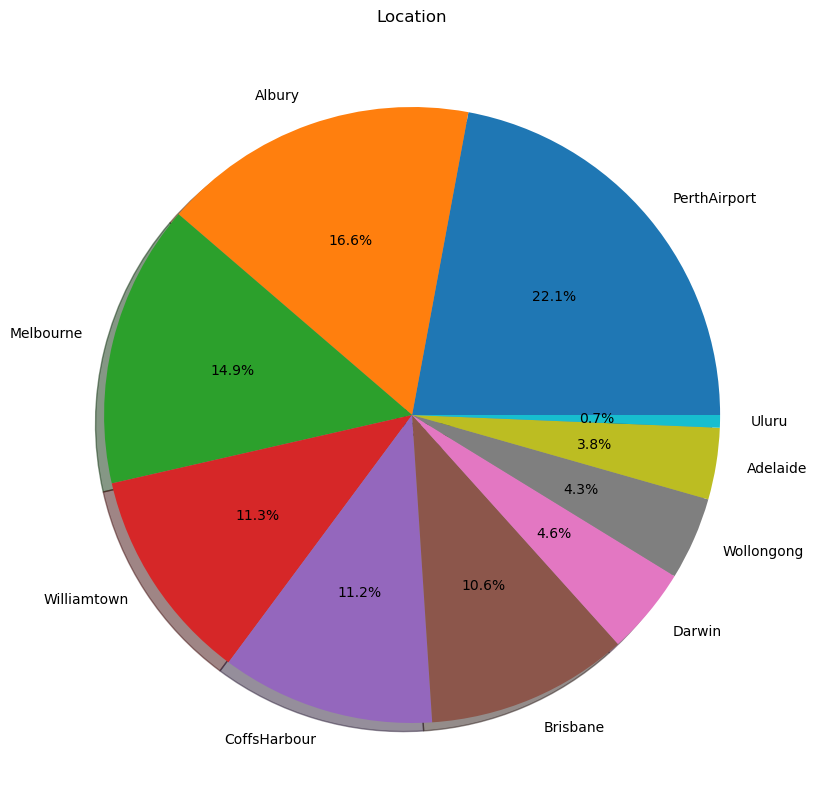

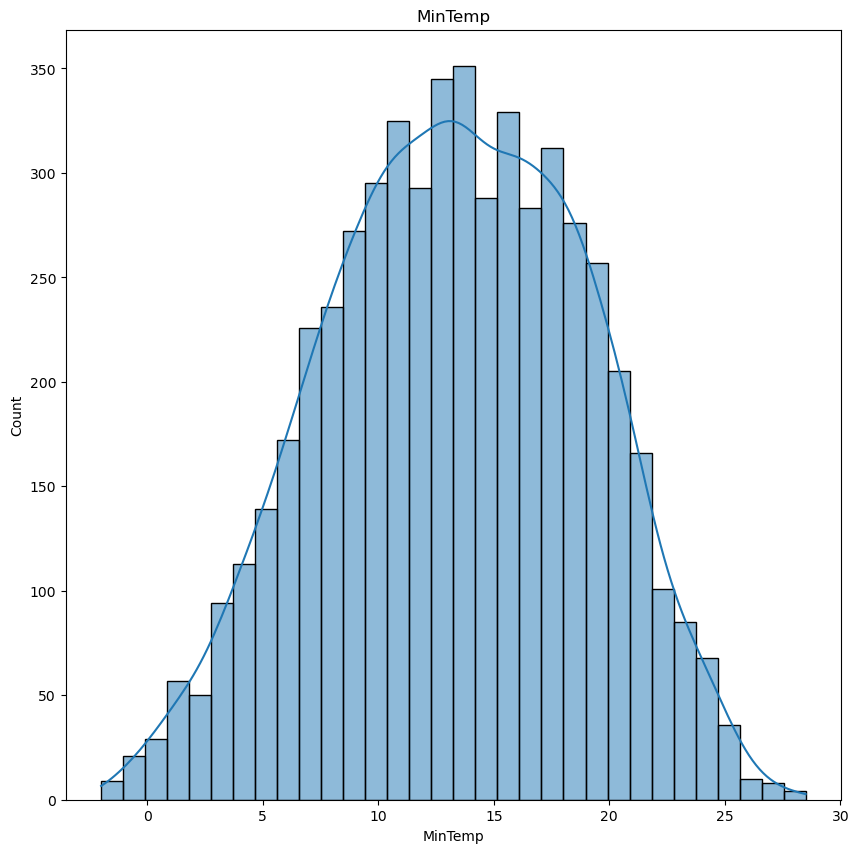

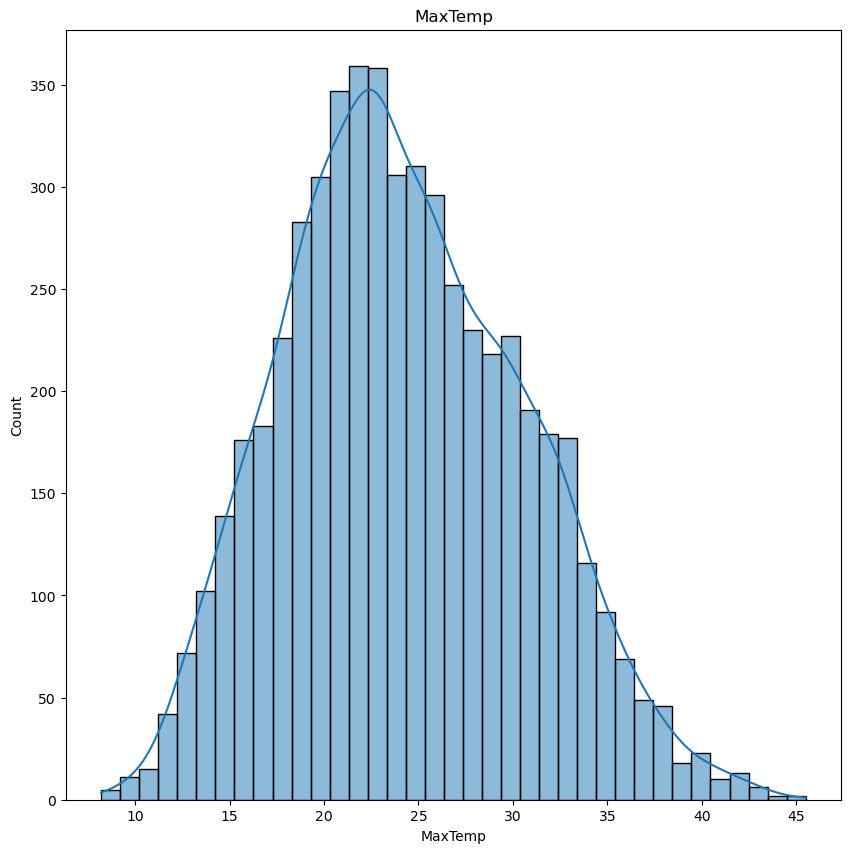

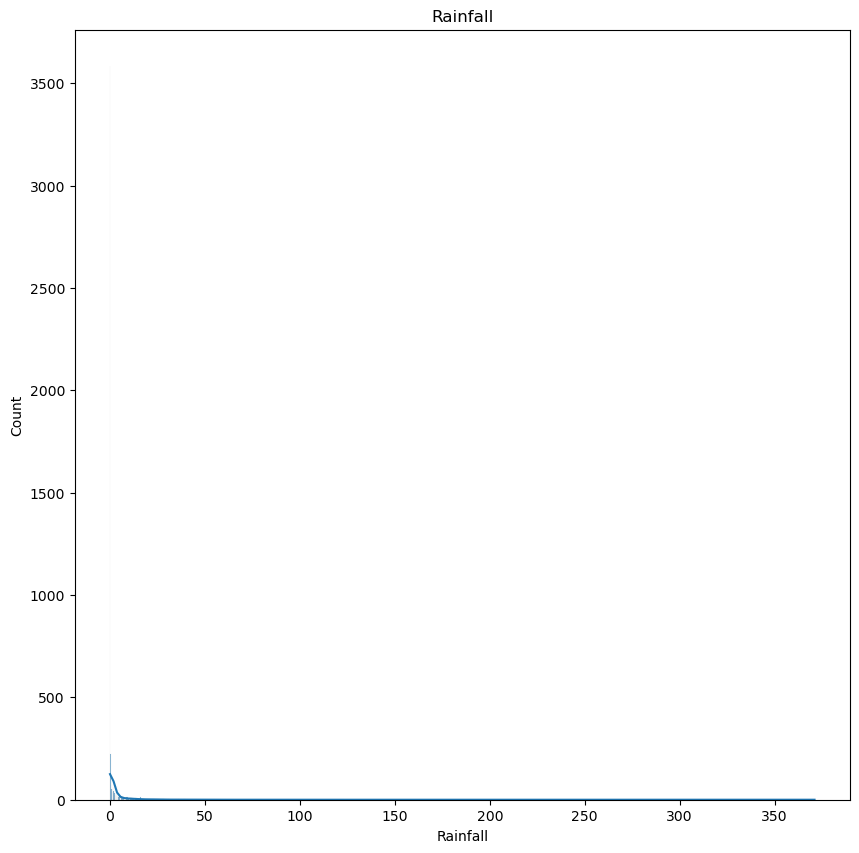

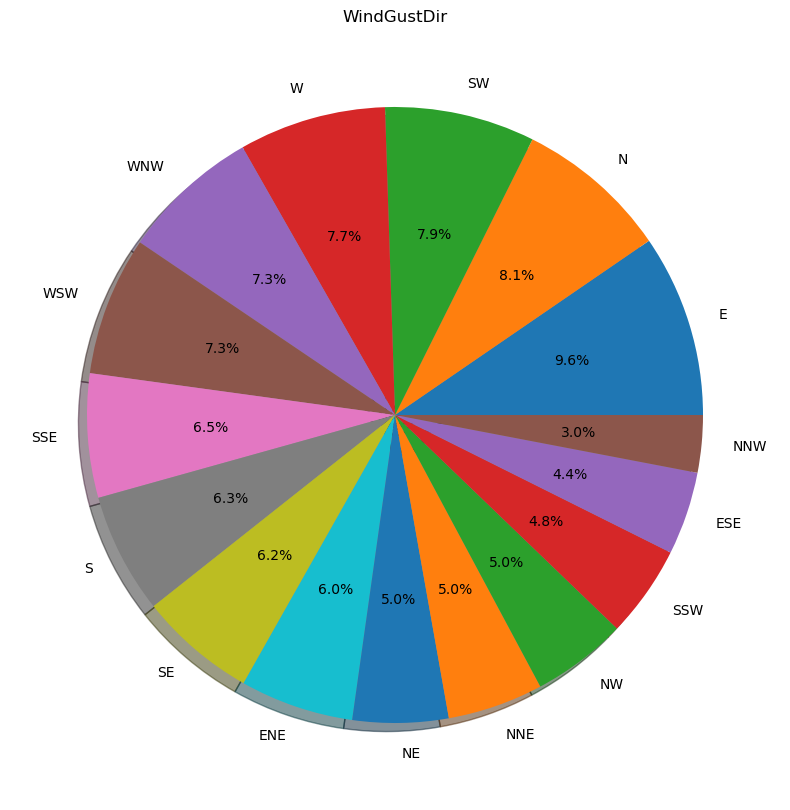

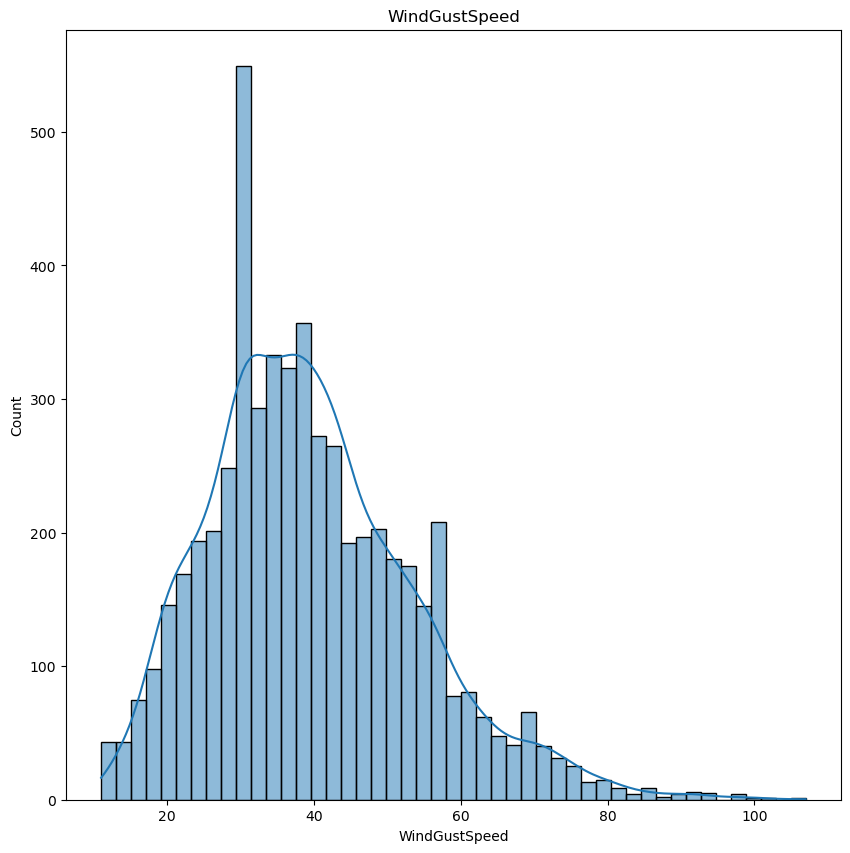

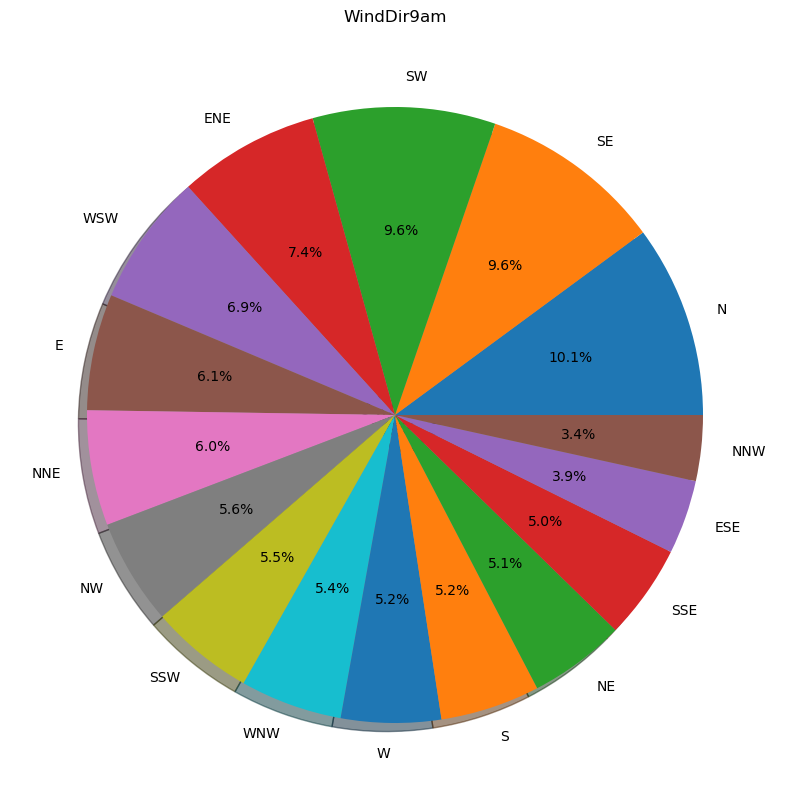

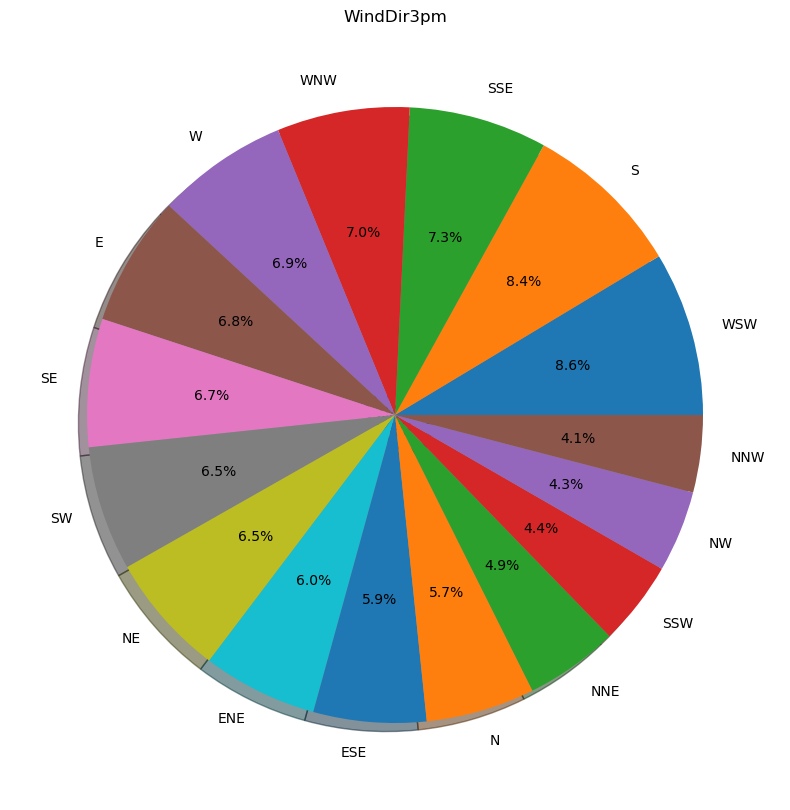

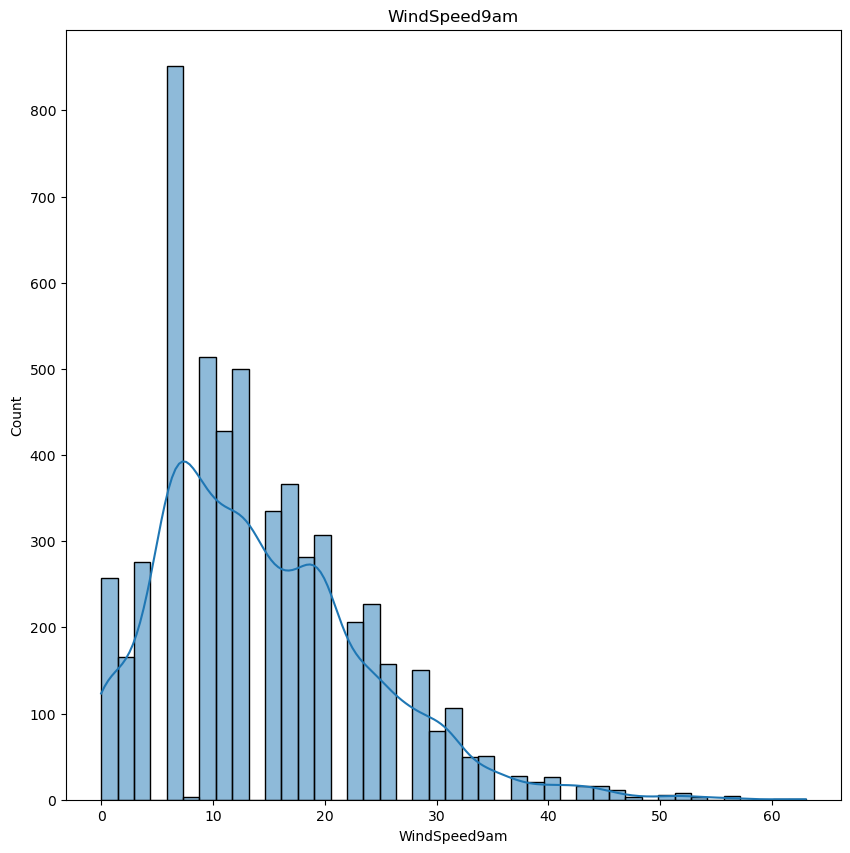

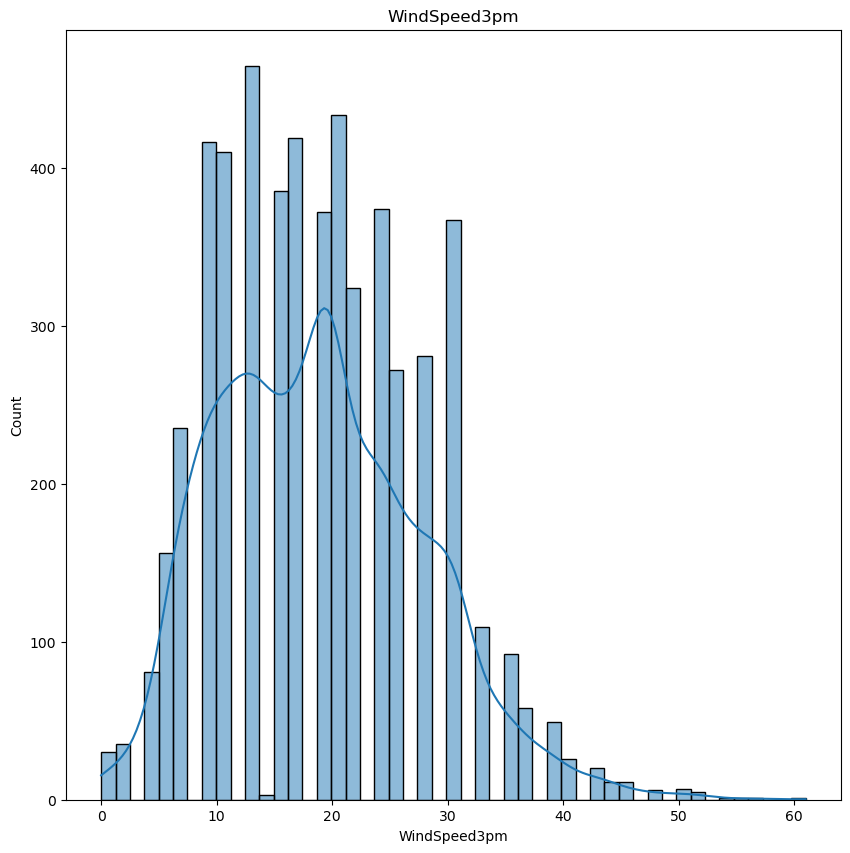

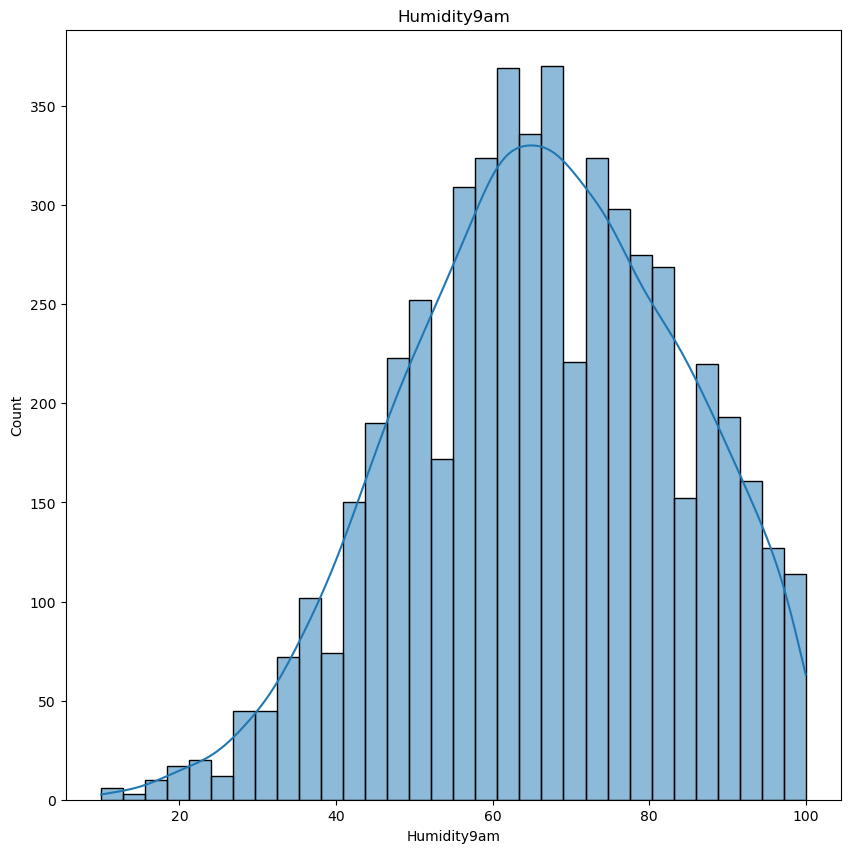

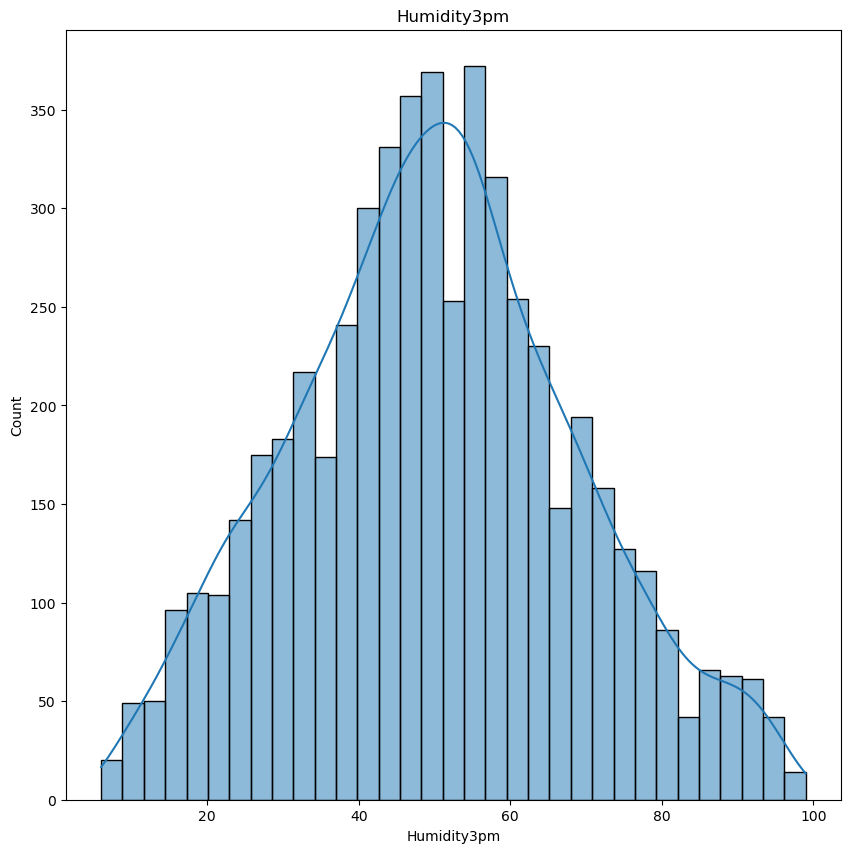

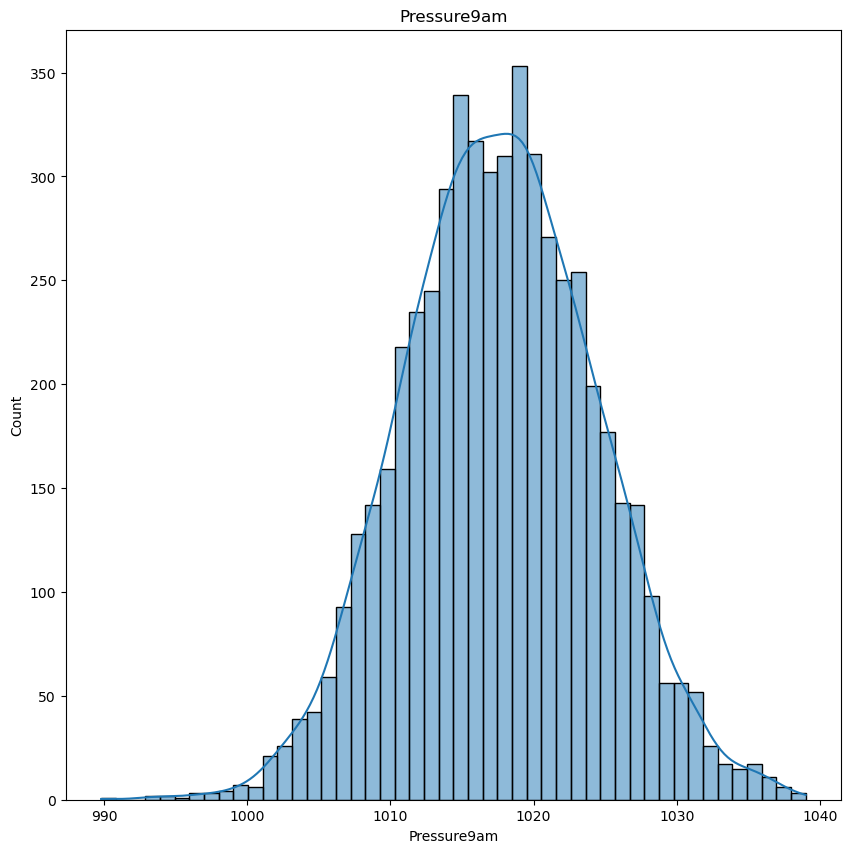

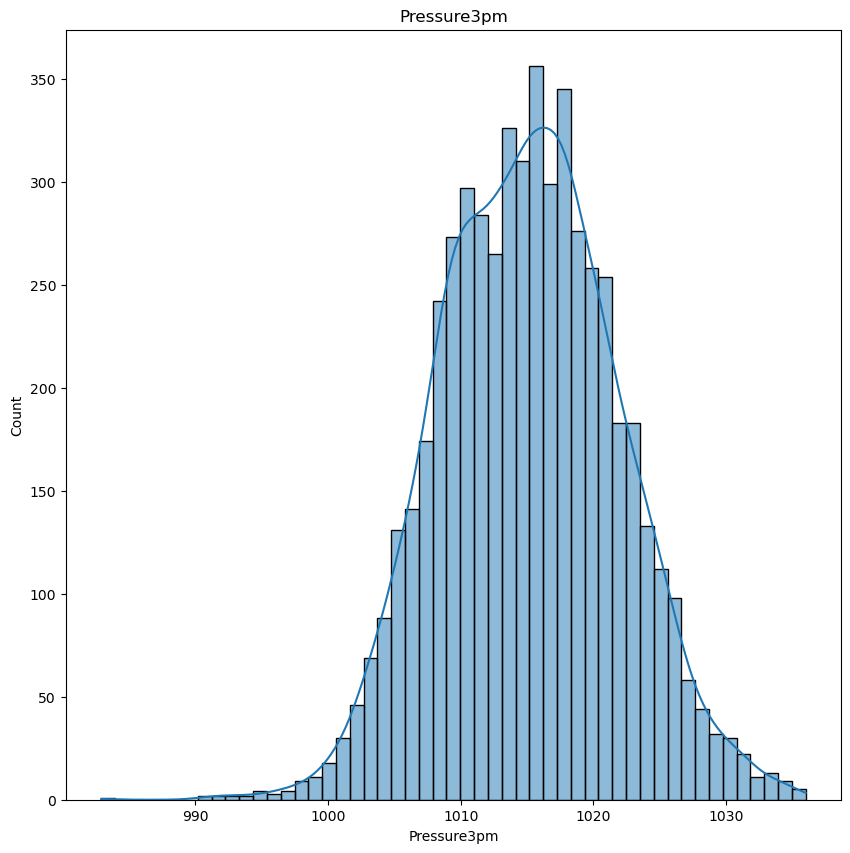

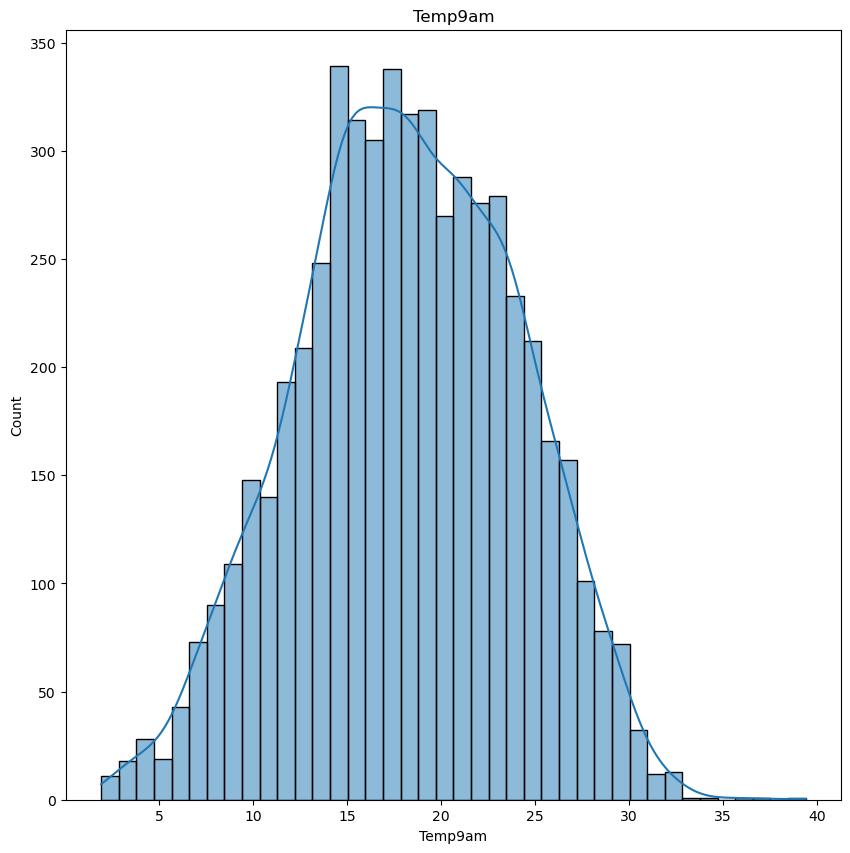

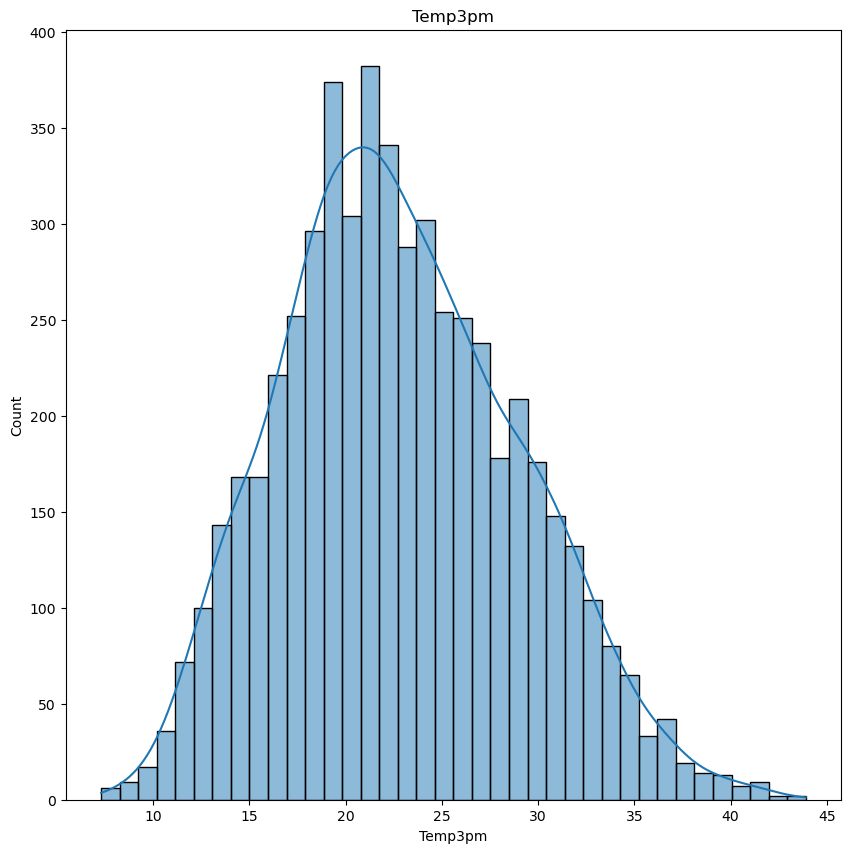

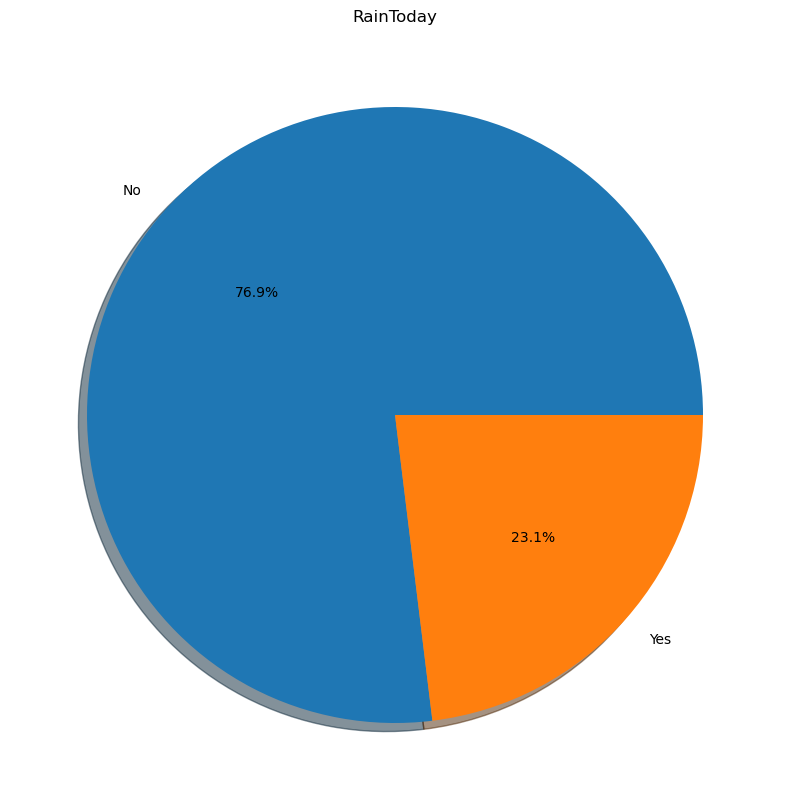

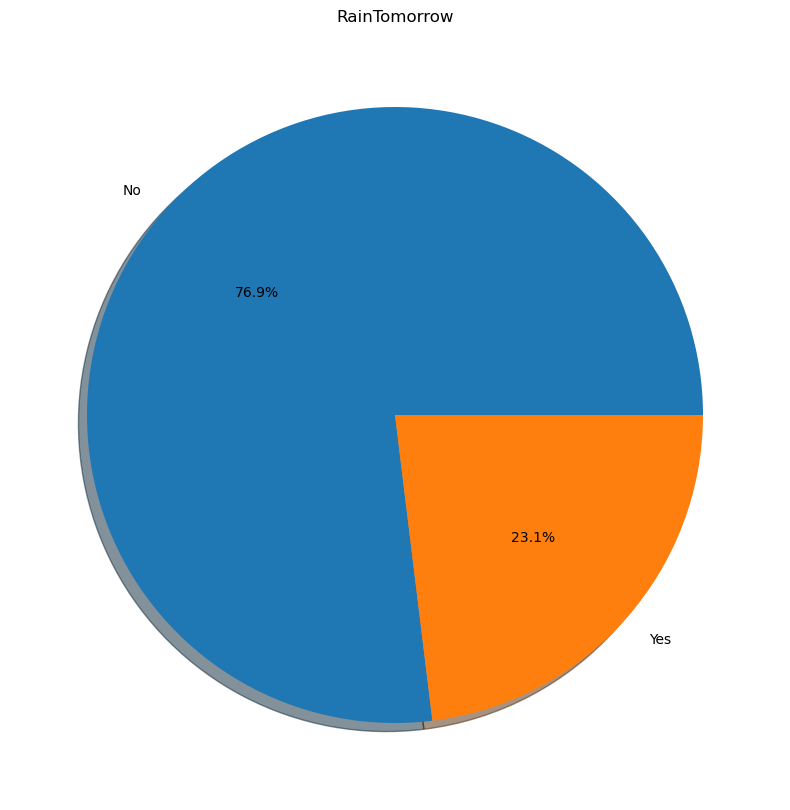

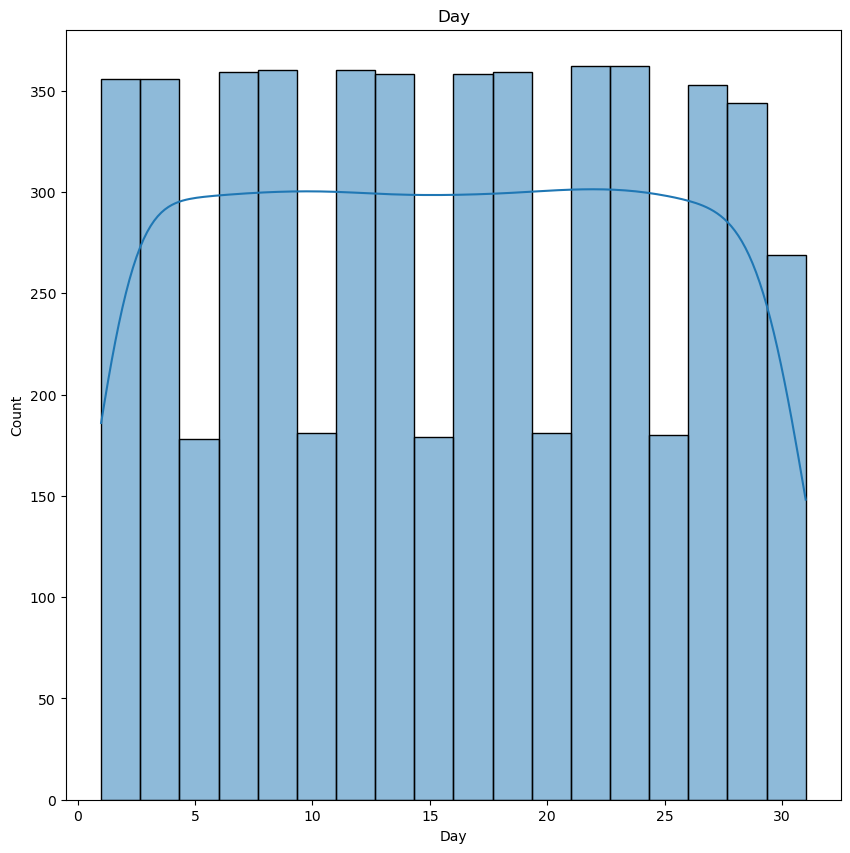

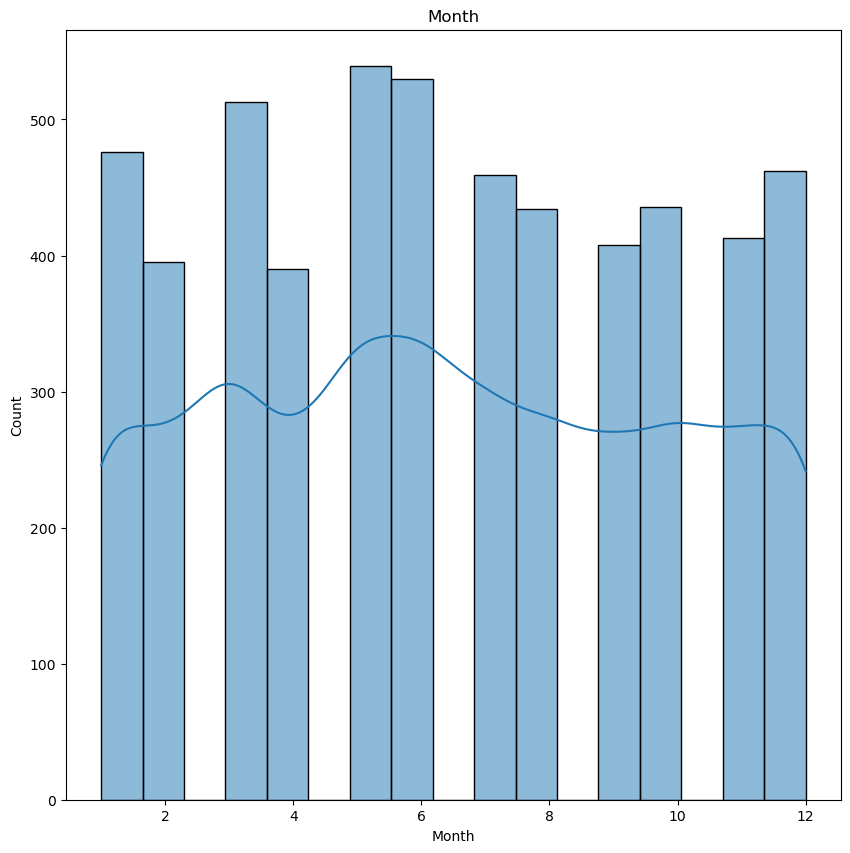

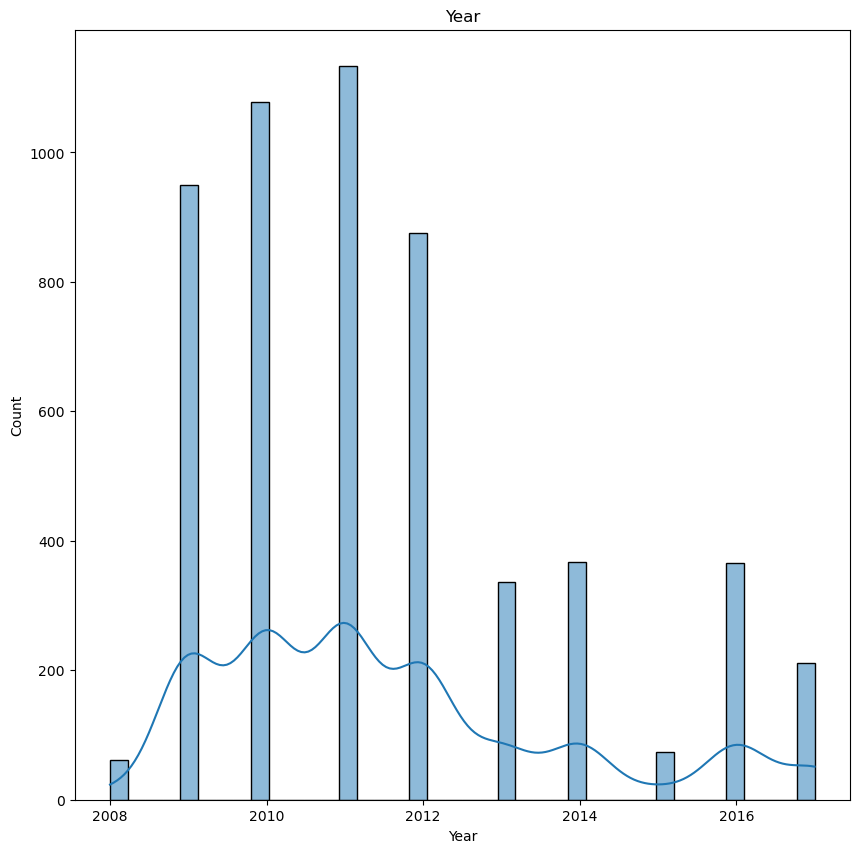

In [97]:
# Analysing distribution each column
for column in rainfall_2:
    plt.figure(column, figsize = (10,10))
    plt.title(column)
    if rainfall_2[column].dtypes == "object":
        sizes = rainfall_2[column].value_counts()
        plt.pie(sizes.values,labels=sizes.index,autopct = '%1.1f%%',shadow=True)
    elif rainfall_2[column].dtypes != "object":
        sns.histplot(x = column,data = rainfall_2,kde=True)

### Bivariate Analysis 

In [98]:
# Relationship between Categorical features and dependent feature
categorical_features = [feature for feature in rainfall_2.columns if ((rainfall_2[feature].dtypes=='O') and (feature not in ['RainTomorrow']))]
categorical_features

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

<Figure size 1500x3000 with 0 Axes>

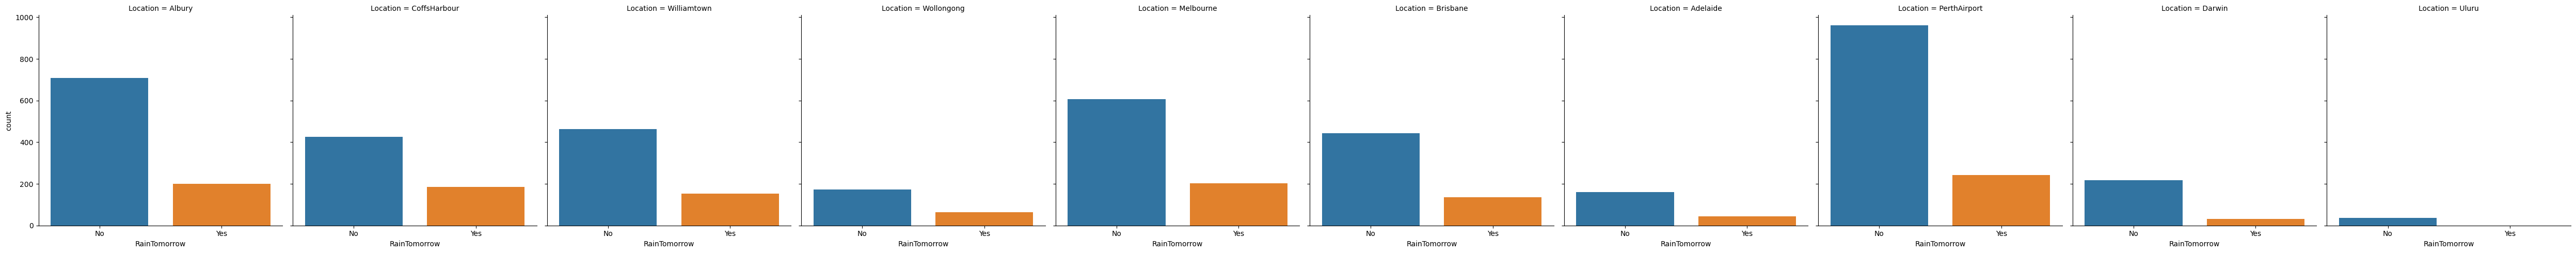

<Figure size 1500x3000 with 0 Axes>

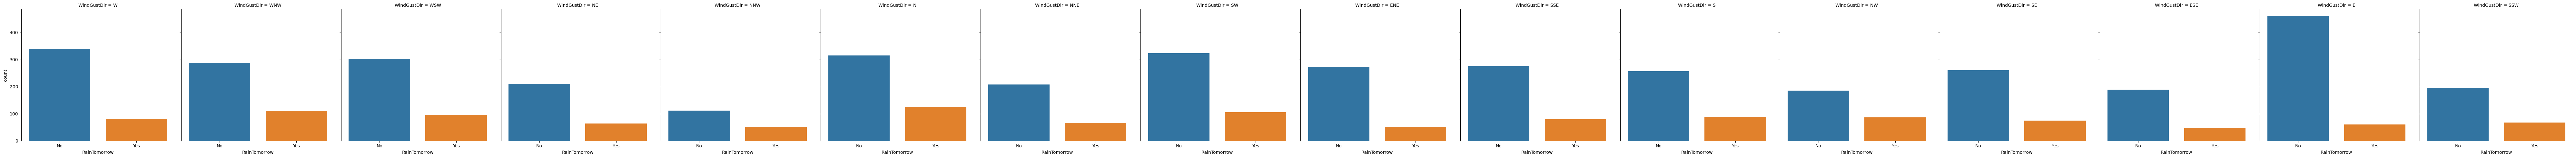

<Figure size 1500x3000 with 0 Axes>

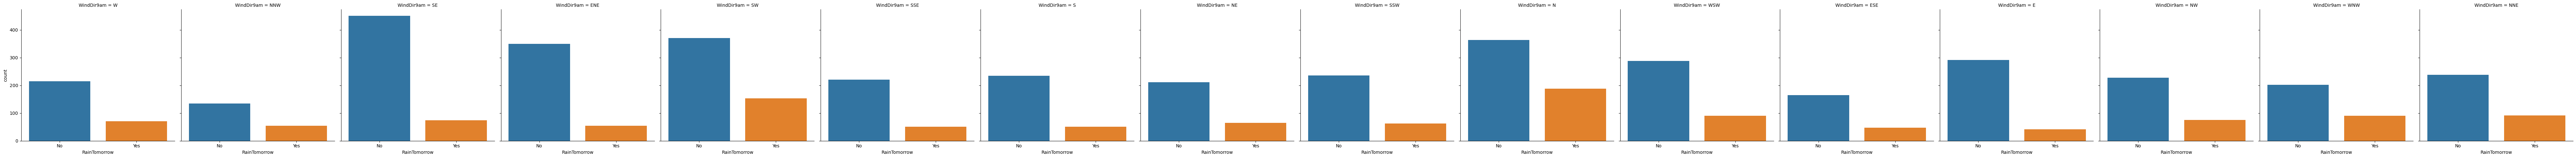

<Figure size 1500x3000 with 0 Axes>

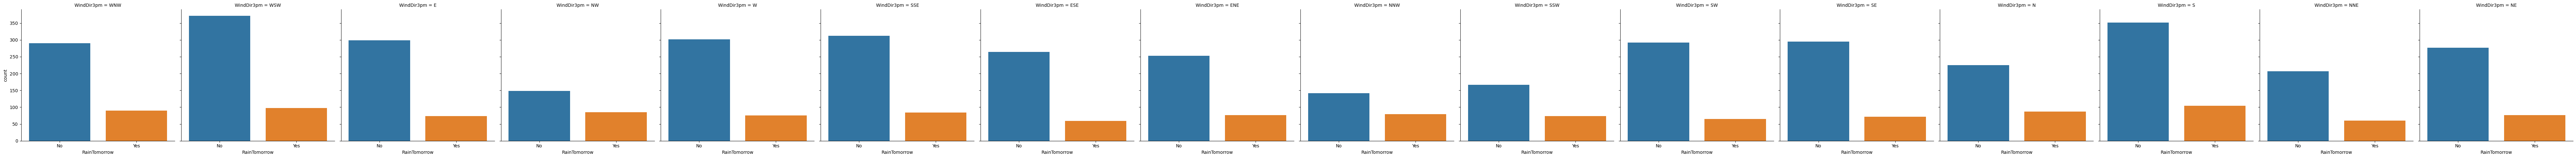

<Figure size 1500x3000 with 0 Axes>

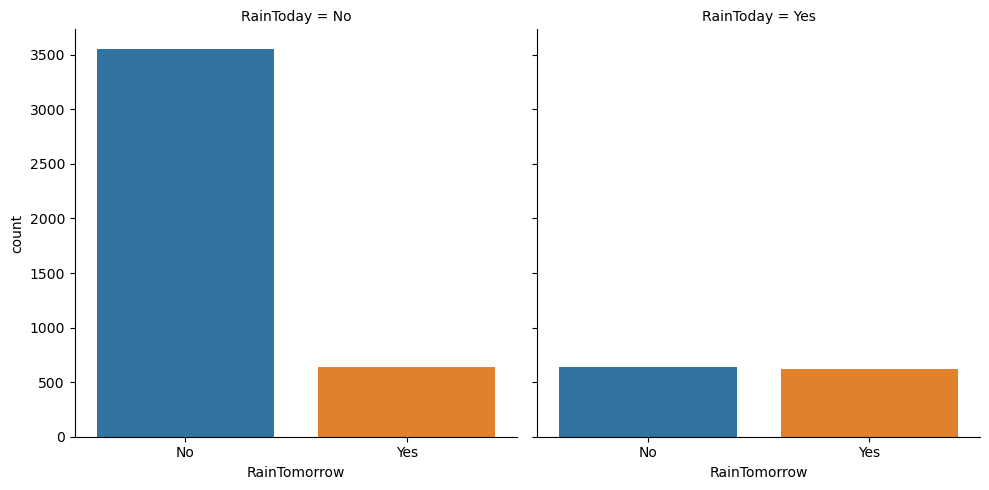

In [99]:
for categorical_feature in categorical_features:
    plt.figure(figsize=(15,30))
    sns.catplot(x='RainTomorrow',col=categorical_feature,kind='count',data = rainfall_2)
plt.show()

In [101]:
#Now analysing seeing the numbers from the above countplots
for categorical_feature in categorical_features:
    print(rainfall_2.groupby([categorical_feature,'RainTomorrow']).size())

Location      RainTomorrow
Adelaide      No              160
              Yes              45
Albury        No              708
              Yes             199
Brisbane      No              444
              Yes             135
CoffsHarbour  No              425
              Yes             186
Darwin        No              218
              Yes              32
Melbourne     No              608
              Yes             203
PerthAirport  No              962
              Yes             242
Uluru         No               36
Williamtown   No              462
              Yes             153
Wollongong    No              174
              Yes              63
dtype: int64
WindGustDir  RainTomorrow
E            No              462
             Yes              60
ENE          No              273
             Yes              52
ESE          No              189
             Yes              49
N            No              315
             Yes             125
NE           No         

In [102]:
#Relationship between Numerical features and dependent feature
numerical_features = [feature for feature in rainfall_2.columns if ((rainfall_2[feature].dtypes !='O') and (feature not in ['RainTomorrow']))]
numerical_features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm',
 'Day',
 'Month',
 'Year']

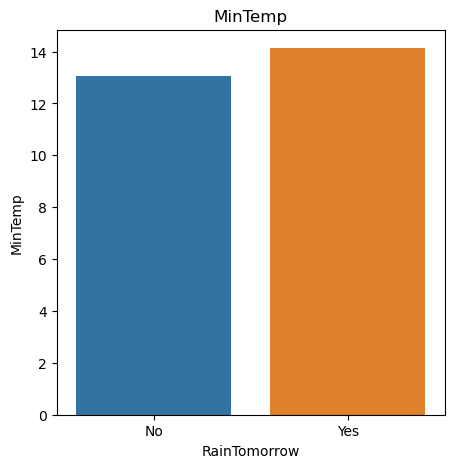

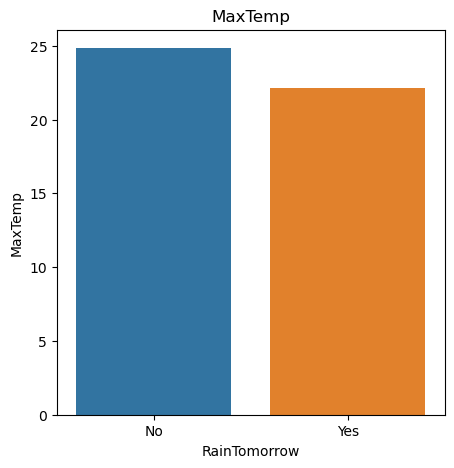

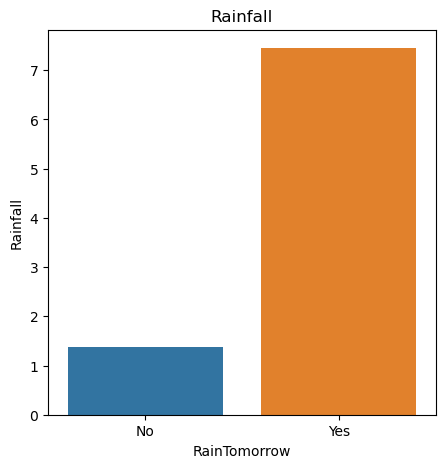

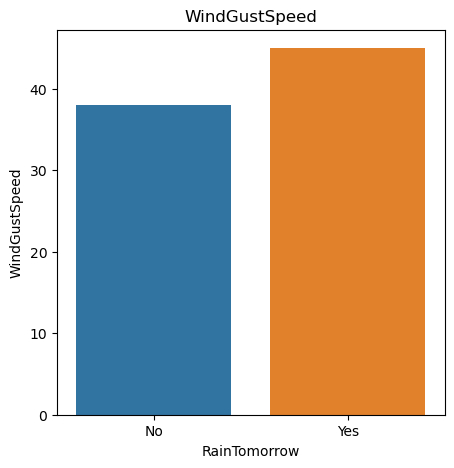

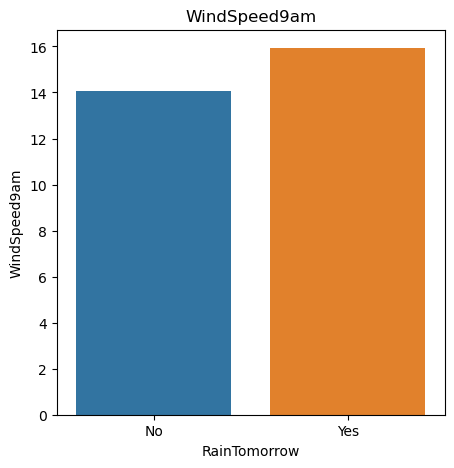

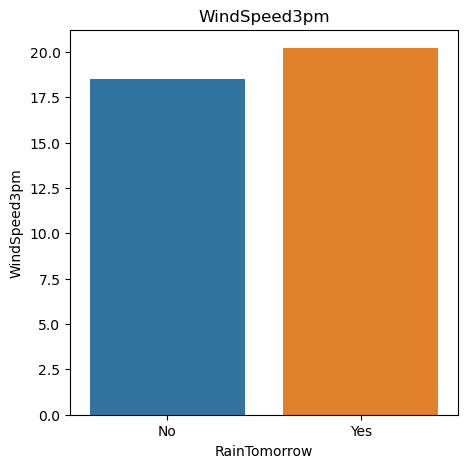

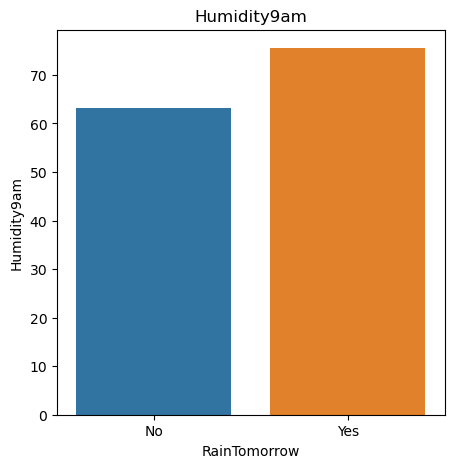

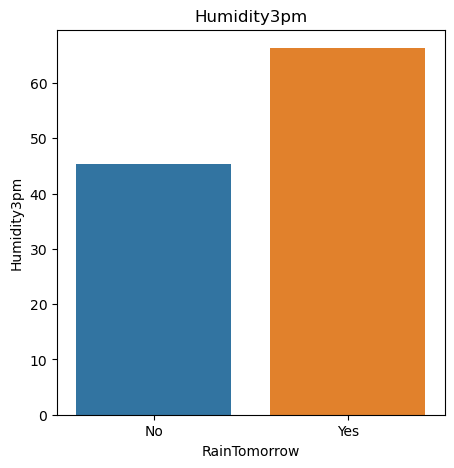

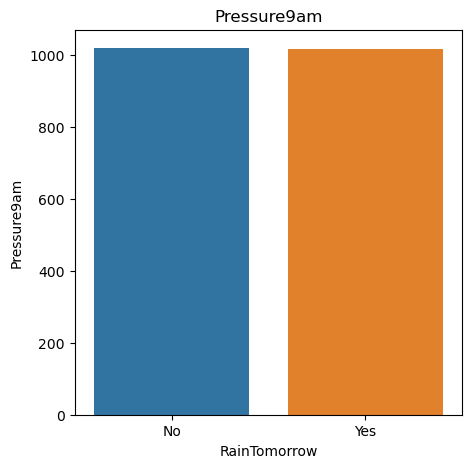

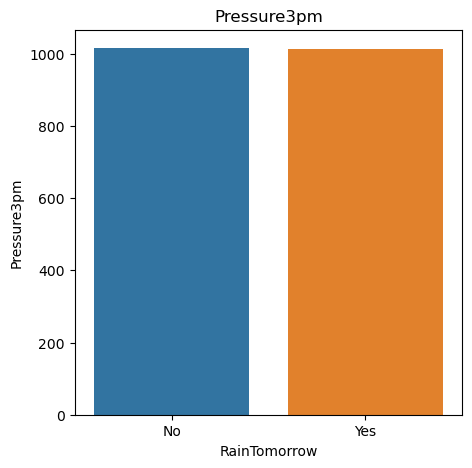

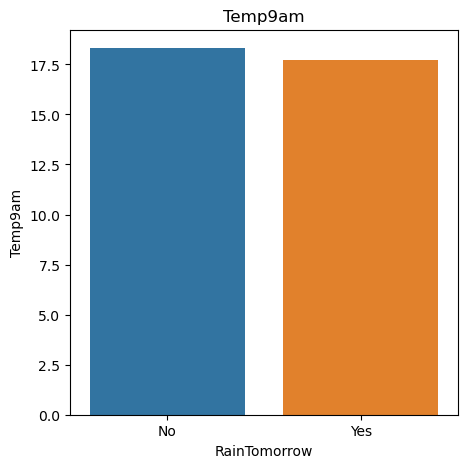

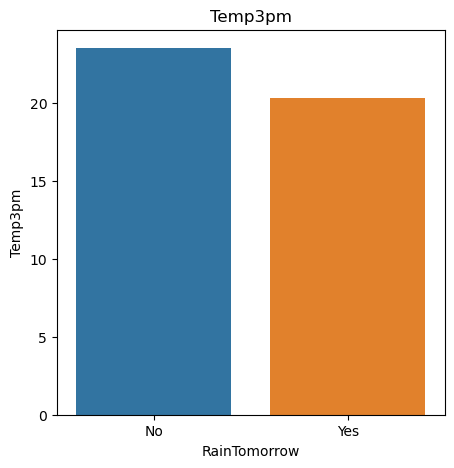

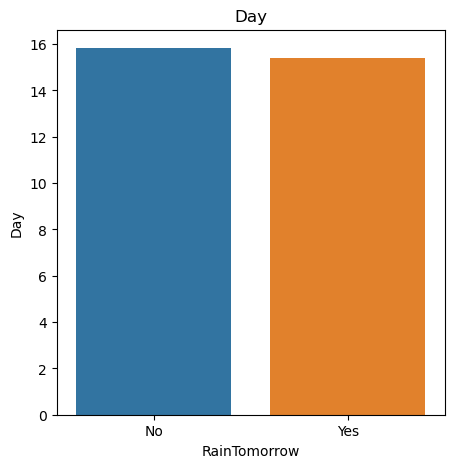

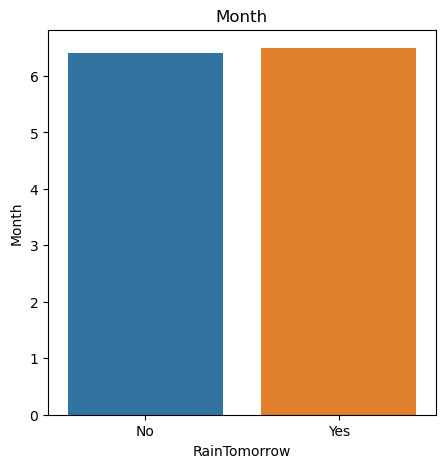

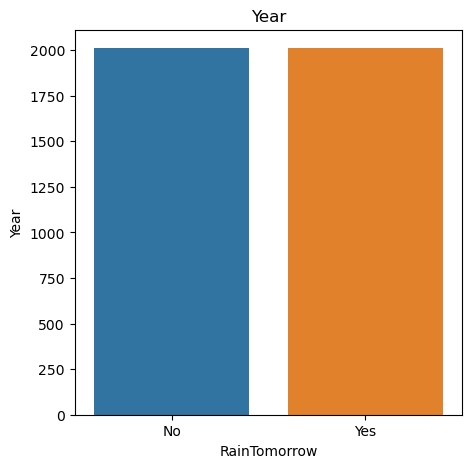

In [103]:
## For classification part (i.e dependent variable - 'RainTomorrow')
for column in rainfall_2:
    if rainfall_2[column].dtypes != "object":
        plt.figure(column, figsize = (5,5))
        sns.barplot(x = 'RainTomorrow',y = column,data = rainfall_2,errorbar=None)
        plt.title(column)

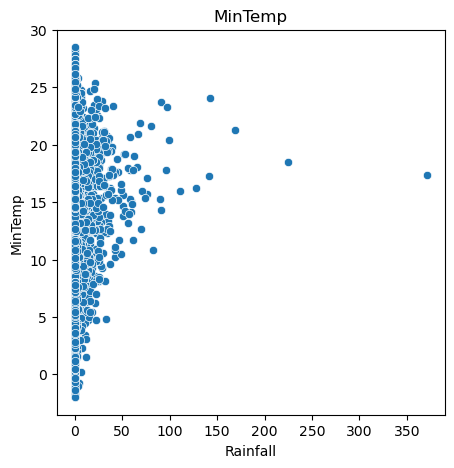

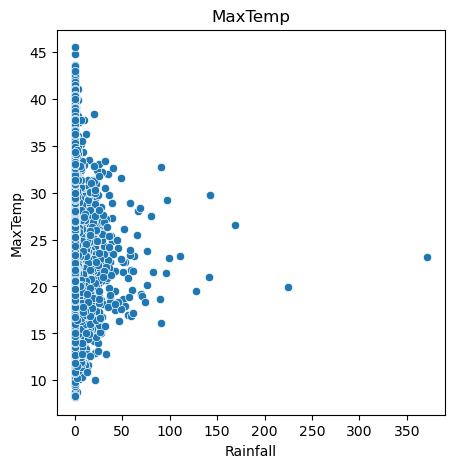

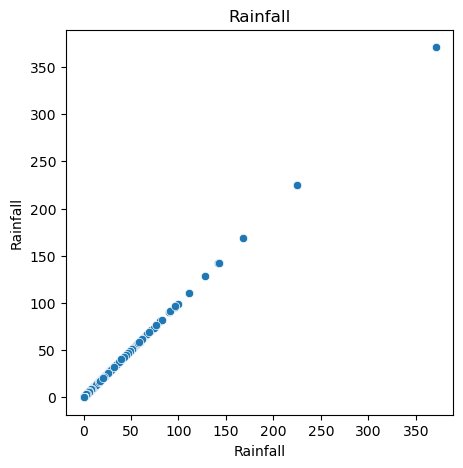

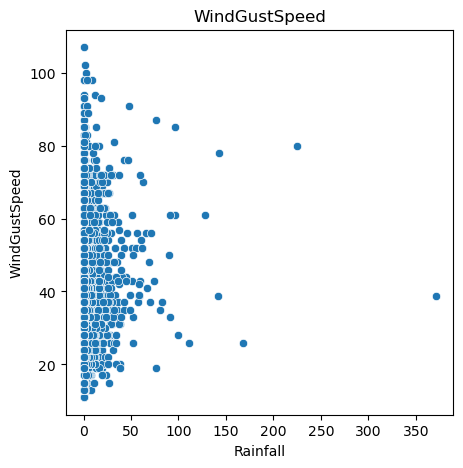

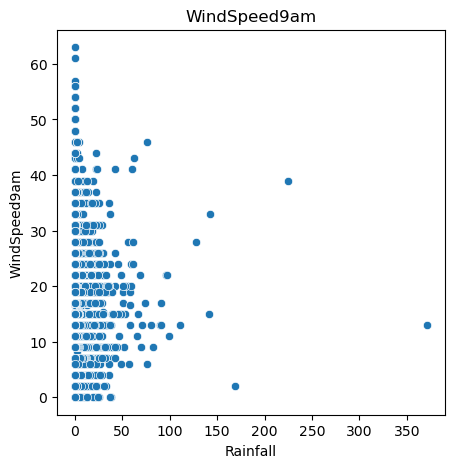

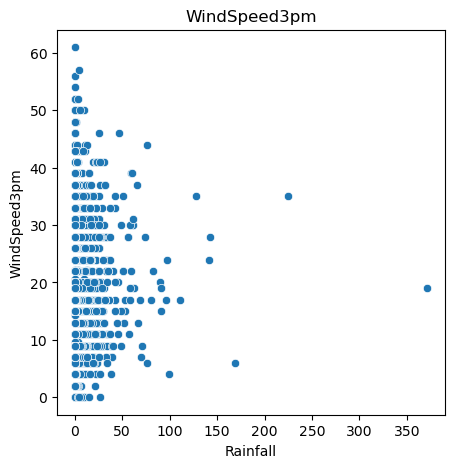

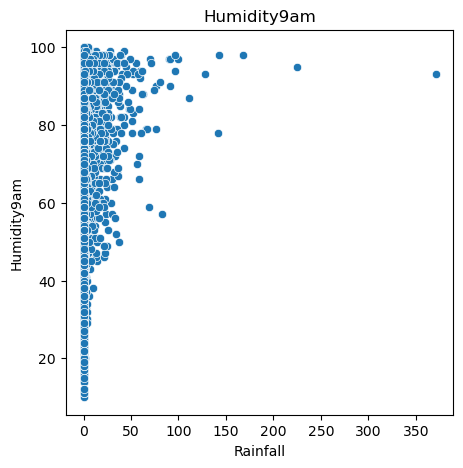

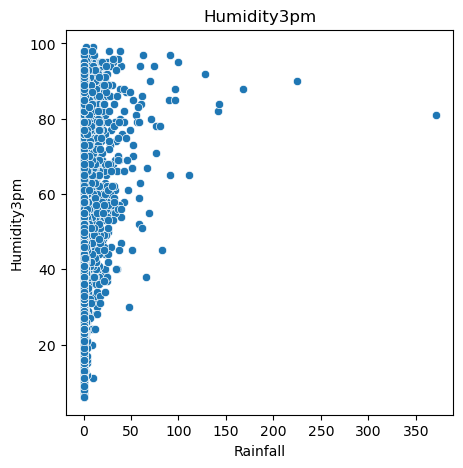

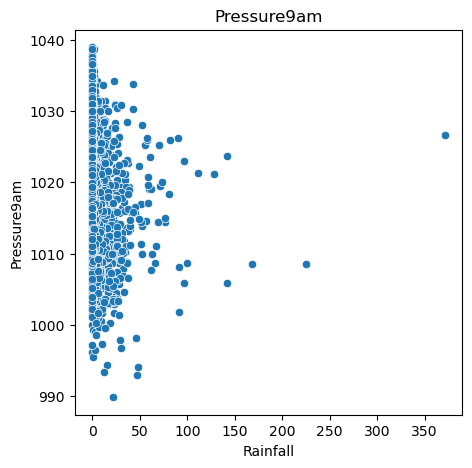

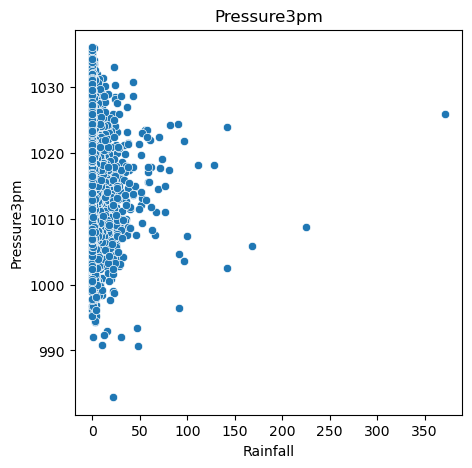

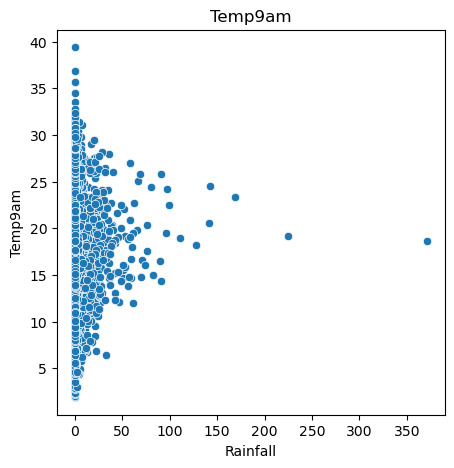

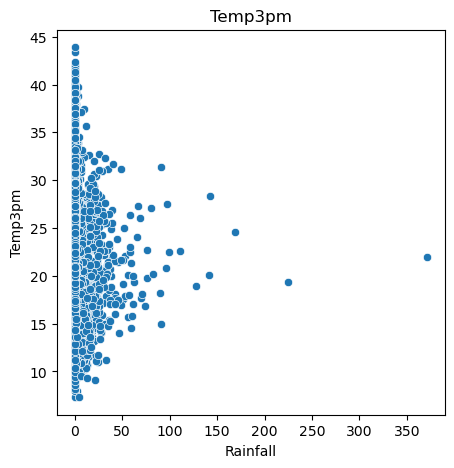

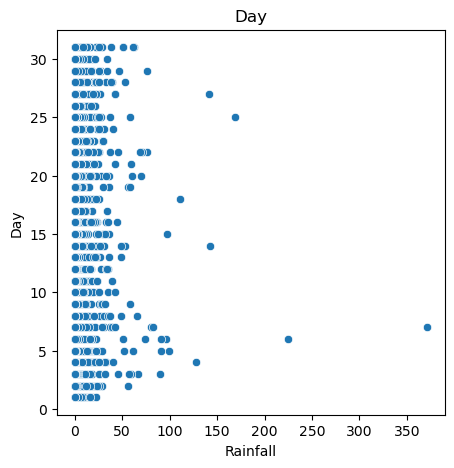

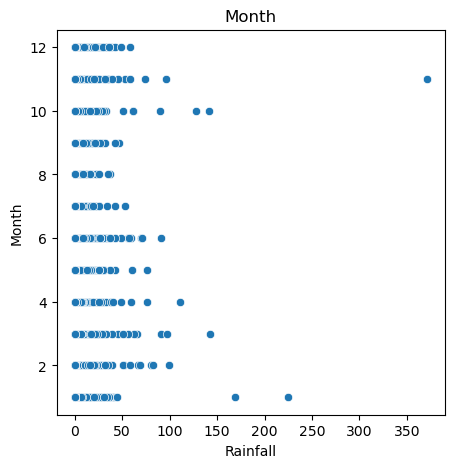

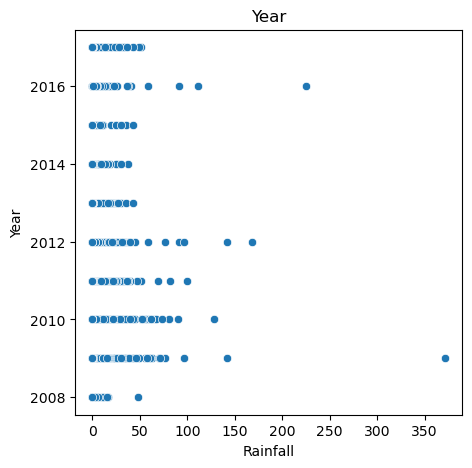

In [104]:
## For regression part (i.e dependent variable - 'Rainfall')
for column in rainfall_2:
    if rainfall_2[column].dtypes != "object":
        plt.figure(column, figsize = (5,5))
        sns.scatterplot(x = 'Rainfall',y = column,data = rainfall_2)
        plt.title(column)

### Multivariate Analysis 

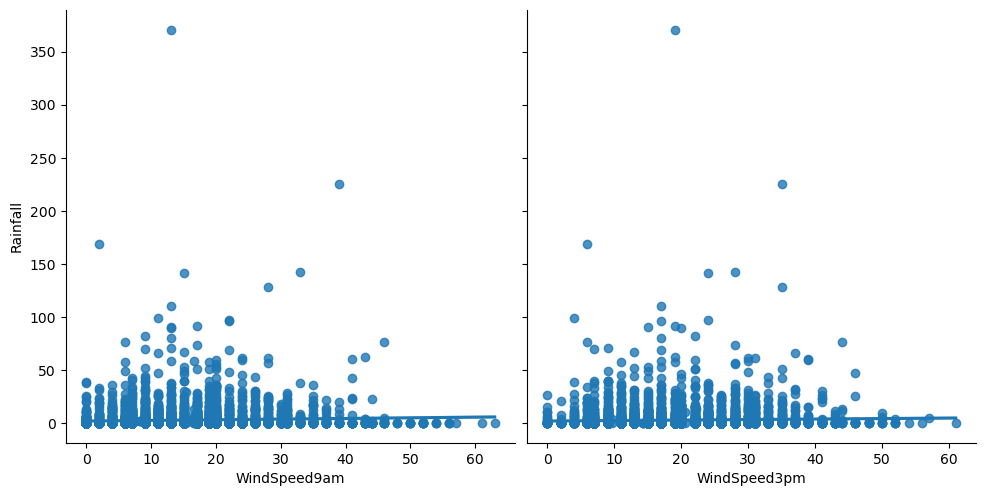

In [105]:
#Rainfall vs Wind speed 9am and 3pm
sns.pairplot(rainfall_2,x_vars = ['WindSpeed9am','WindSpeed3pm'],y_vars = 'Rainfall',size=5,kind = 'reg')

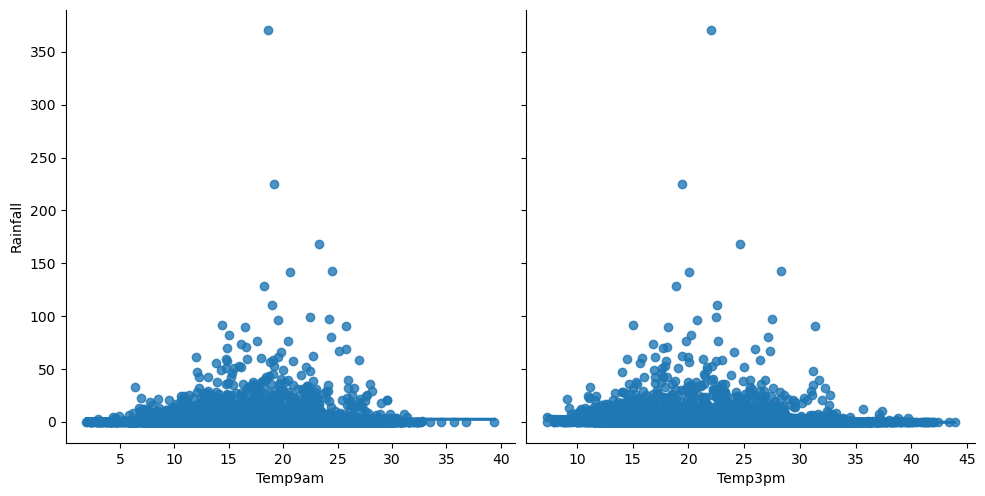

In [106]:
#Rainfall vs Wind speed 9am and 3pm
sns.pairplot(rainfall_2,x_vars = ['Temp9am','Temp3pm'],y_vars = 'Rainfall',size=5,kind = 'reg')

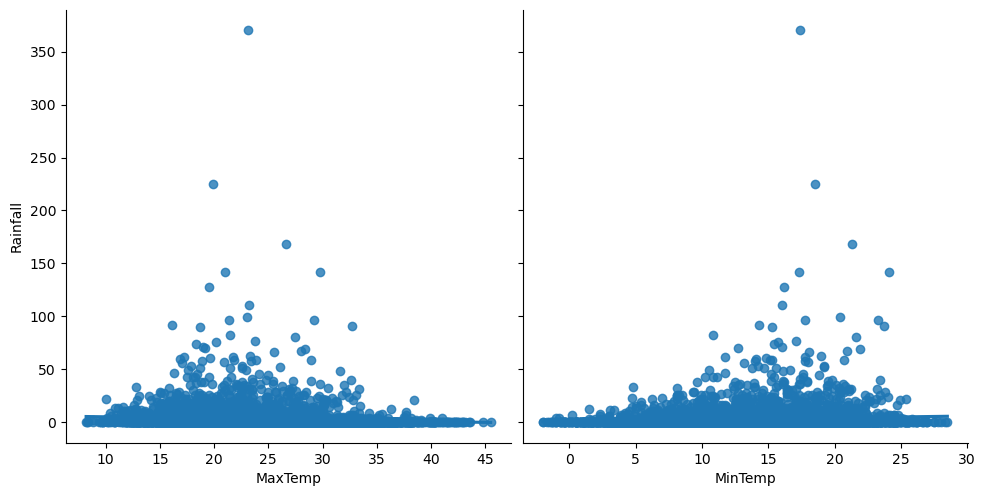

In [107]:
#Rainfall vs Max and Min temp
sns.pairplot(rainfall_2,x_vars = ['MaxTemp','MinTemp'],y_vars = 'Rainfall',size=5,kind = 'reg')

In [108]:
numerical_features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm',
 'Day',
 'Month',
 'Year']

In [109]:
categorical_features

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

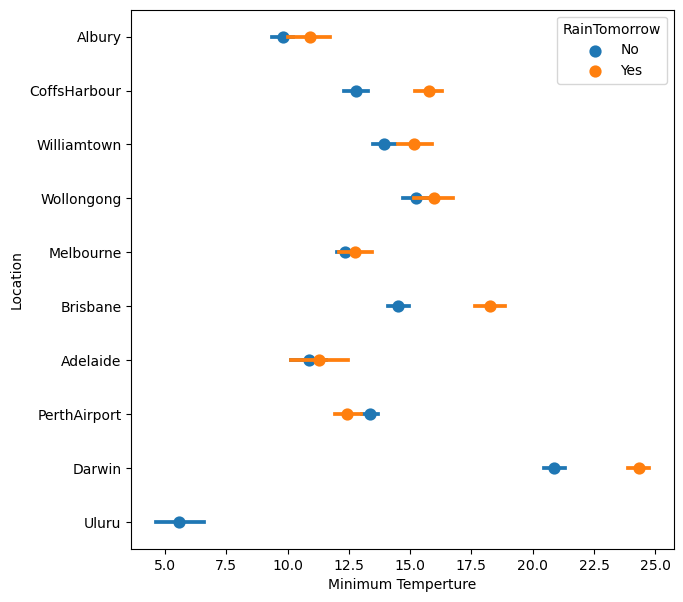

In [110]:
#Relationship between MinTemp and Location distribution
plt.figure(figsize = (7,7))
sns.pointplot(x='MinTemp' , y='Location', data = rainfall_2, hue = 'RainTomorrow',join = False)
plt.xlabel('Minimum Temperture')
plt.ylabel('Location')
plt.show()

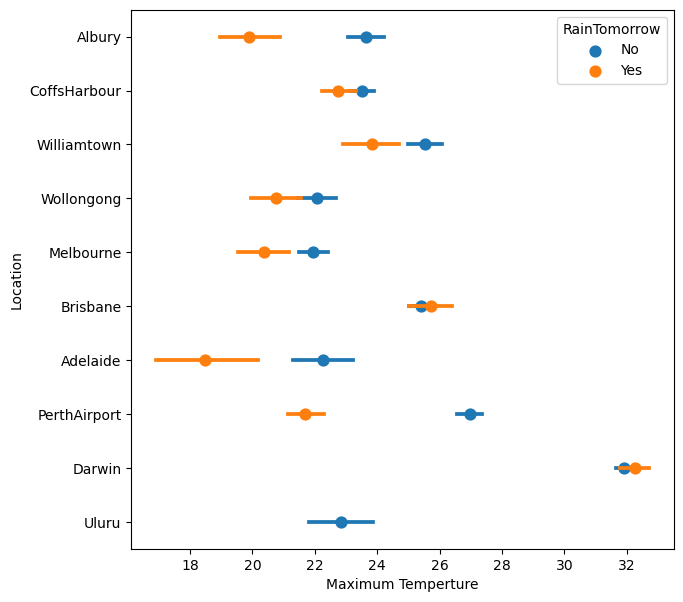

In [111]:
#Relationship between MinTemp and Location distribution
plt.figure(figsize = (7,7))
sns.pointplot(x='MaxTemp' , y='Location', data = rainfall_2, hue = 'RainTomorrow',join = False)
plt.xlabel('Maximum Temperture')
plt.ylabel('Location')
plt.show()

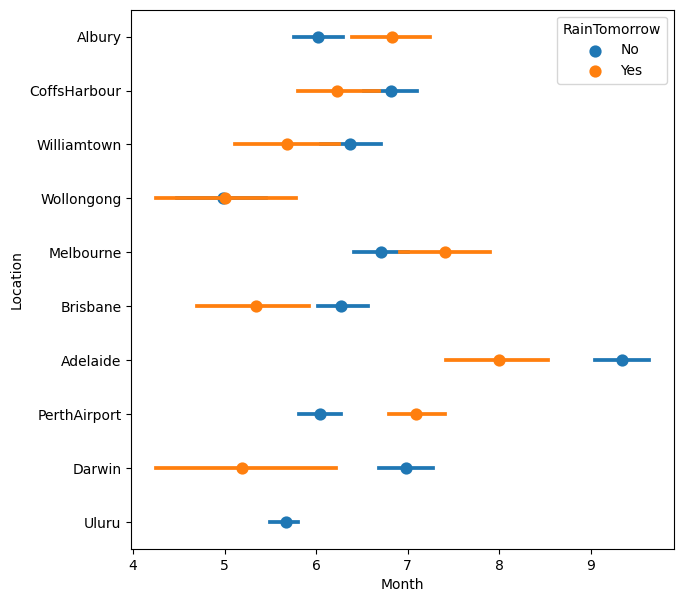

In [113]:
#Relationship between Month and Location distribution
plt.figure(figsize = (7,7))
sns.pointplot(x='Month' , y='Location', data = rainfall_2, hue = 'RainTomorrow',join = False)
plt.xlabel('Month')
plt.ylabel('Location')
plt.show()

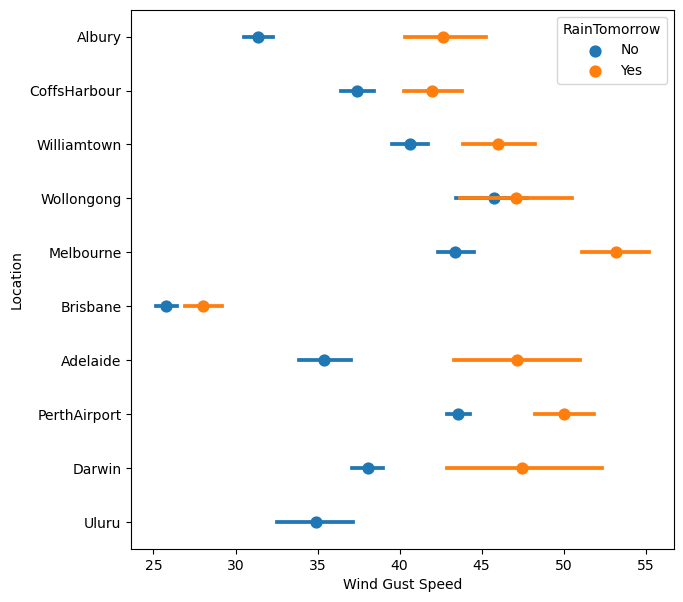

In [114]:
#Relationship between WindGustSpeed and Location distribution
plt.figure(figsize = (7,7))
sns.pointplot(x='WindGustSpeed' , y='Location', data = rainfall_2, hue = 'RainTomorrow',join = False)
plt.xlabel('Wind Gust Speed')
plt.ylabel('Location')
plt.show()

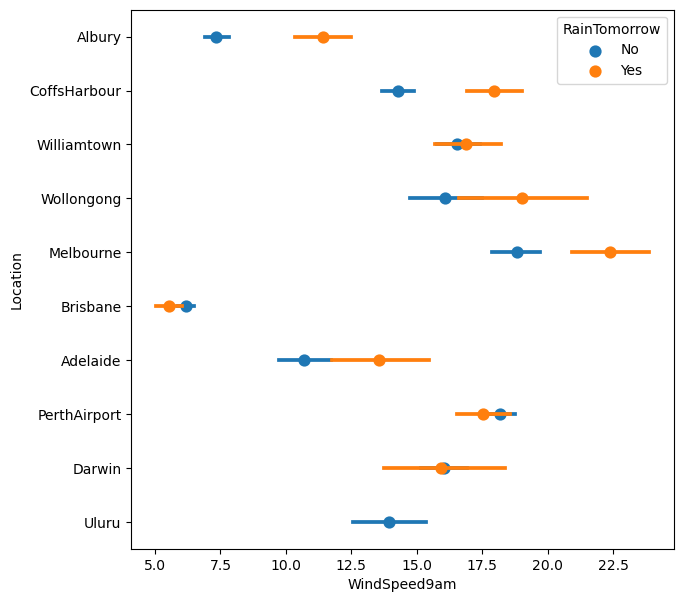

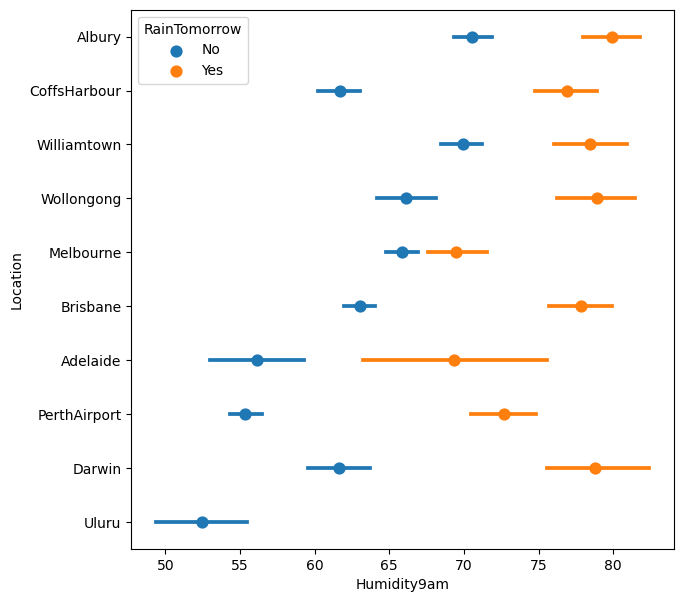

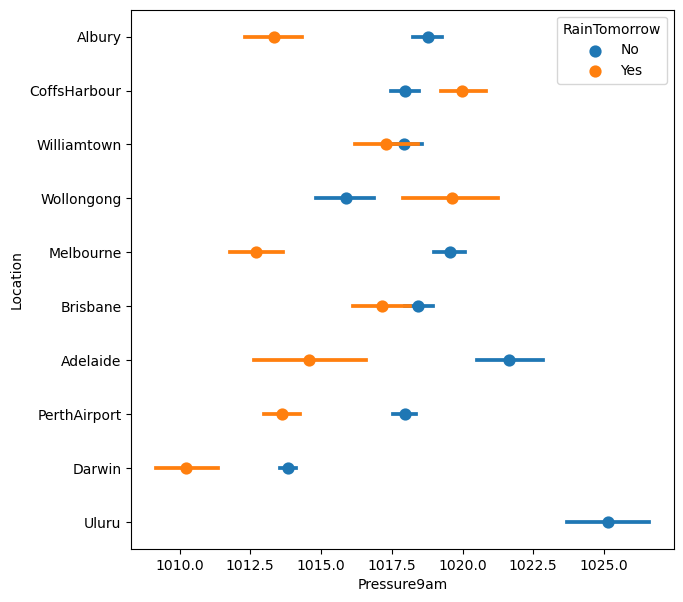

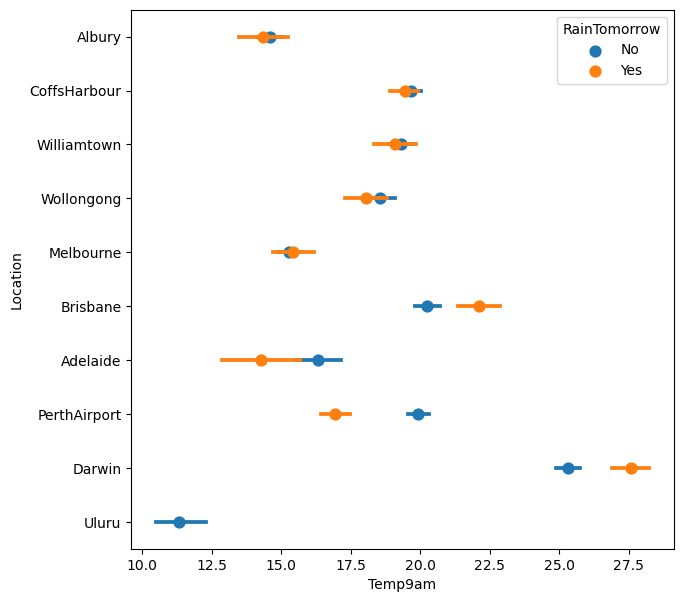

In [116]:
#Relation between Windspeed,Humidity,Pressure,Temp (at 9am) and Location
cols = ['WindSpeed9am','Humidity9am','Pressure9am','Temp9am']
for col in cols:
    plt.figure(figsize = (7,7))
    sns.pointplot(x= col , y='Location', data = rainfall_2, hue = 'RainTomorrow',join = False)
    plt.xlabel(col)
    plt.ylabel('Location')
    plt.show()

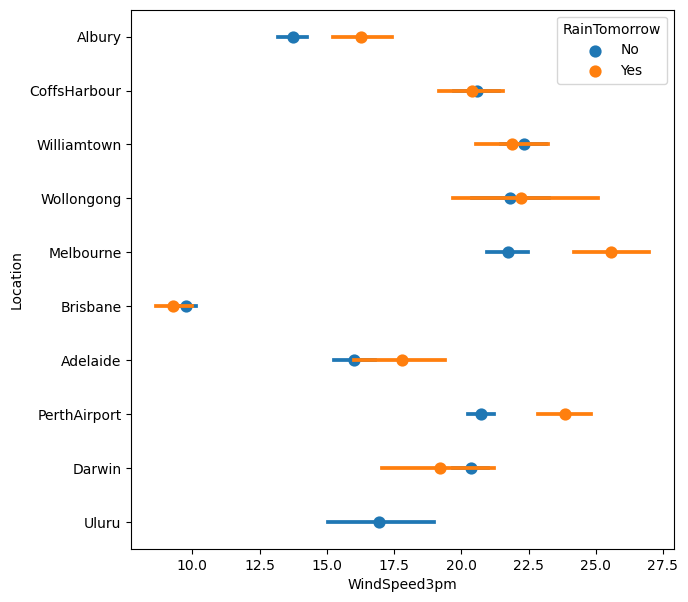

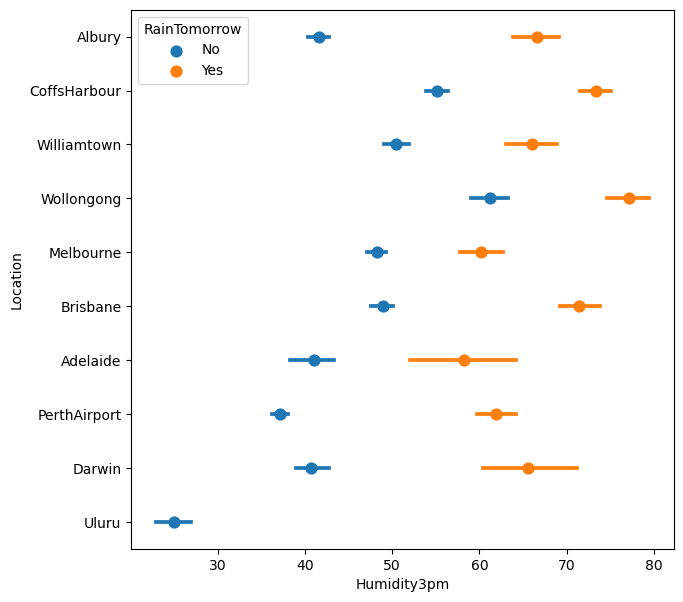

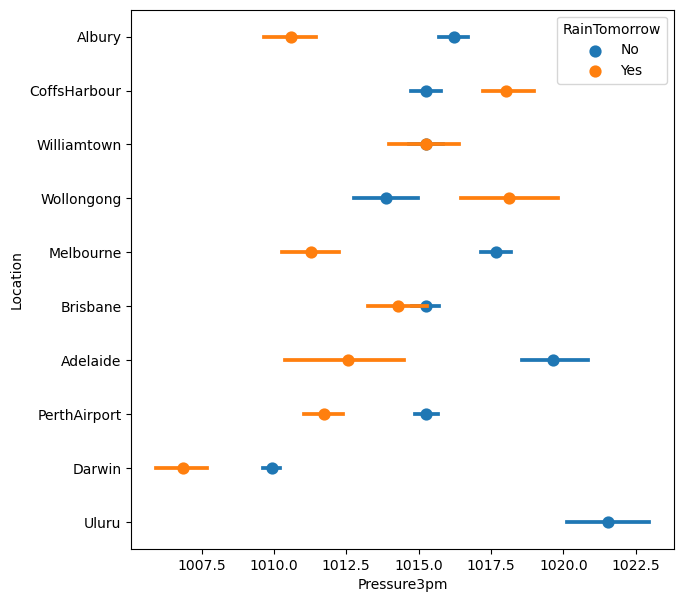

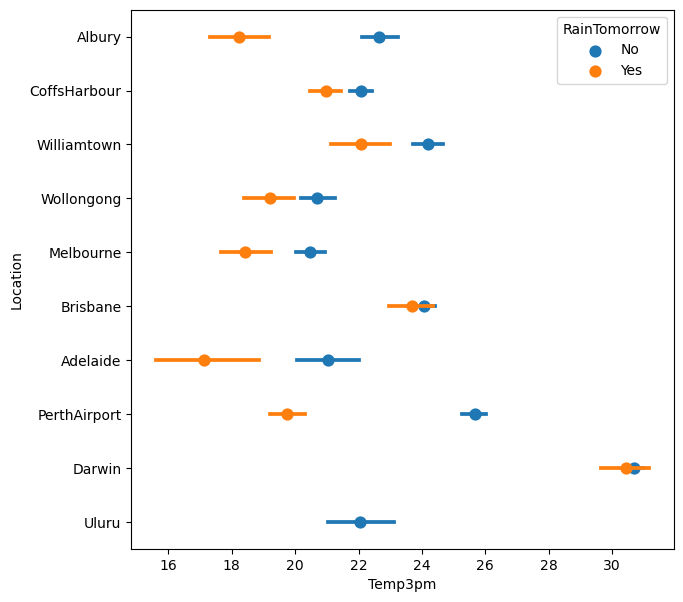

In [117]:
#Relation between Windspeed,Humidity,Pressure,Temp (at 3pm) and Location
cols = ['WindSpeed3pm','Humidity3pm','Pressure3pm','Temp3pm']
for col in cols:
    plt.figure(figsize = (7,7))
    sns.pointplot(x= col , y='Location', data = rainfall_2, hue = 'RainTomorrow',join = False)
    plt.xlabel(col)
    plt.ylabel('Location')
    plt.show()

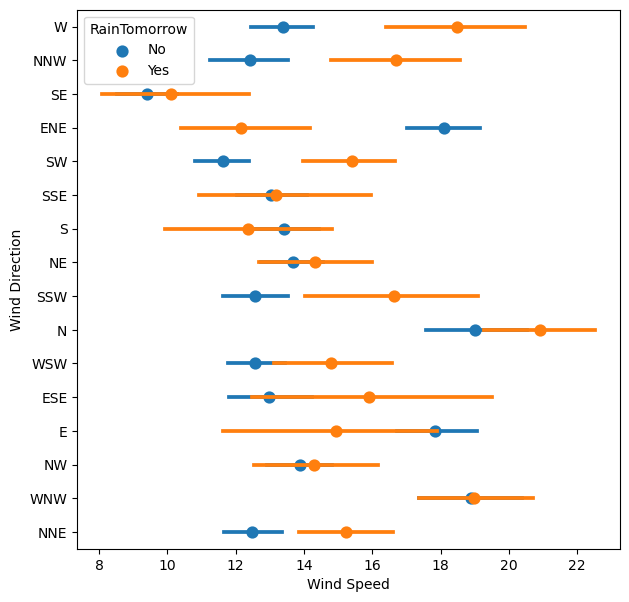

In [118]:
#Relationship between WindDir9am and WindSpeed9am distribution
plt.figure(figsize = (7,7))
sns.pointplot(x='WindSpeed9am' , y='WindDir9am', data = rainfall_2, hue = 'RainTomorrow',join = False)
plt.xlabel('Wind Speed')
plt.ylabel('Wind Direction')
plt.show()

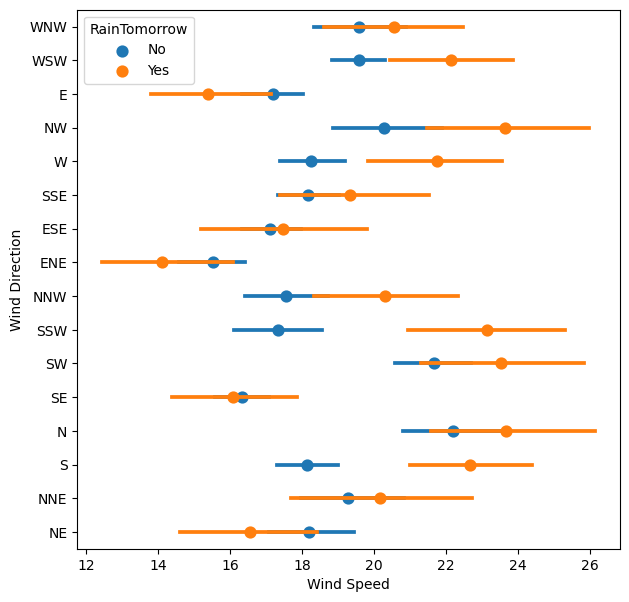

In [119]:
#Relationship between WindDir3pm and WindSpeed3pm distribution
plt.figure(figsize = (7,7))
sns.pointplot(x='WindSpeed3pm' , y='WindDir3pm', data = rainfall_2, hue = 'RainTomorrow',join = False)
plt.xlabel('Wind Speed')
plt.ylabel('Wind Direction')
plt.show()

#### Feature Engineering and Feature Selection 

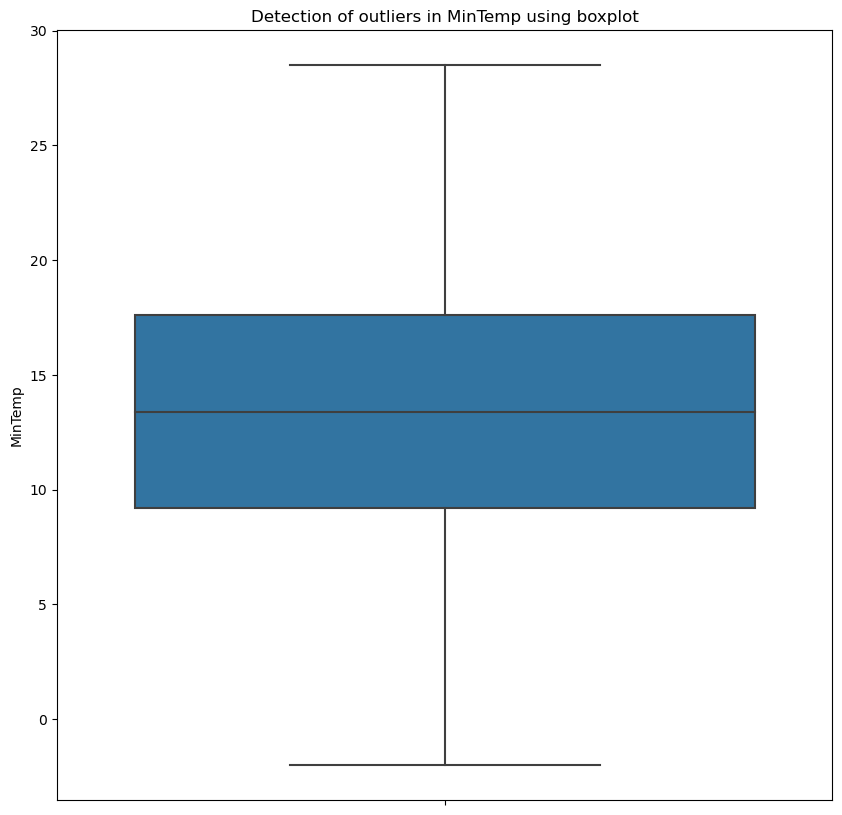

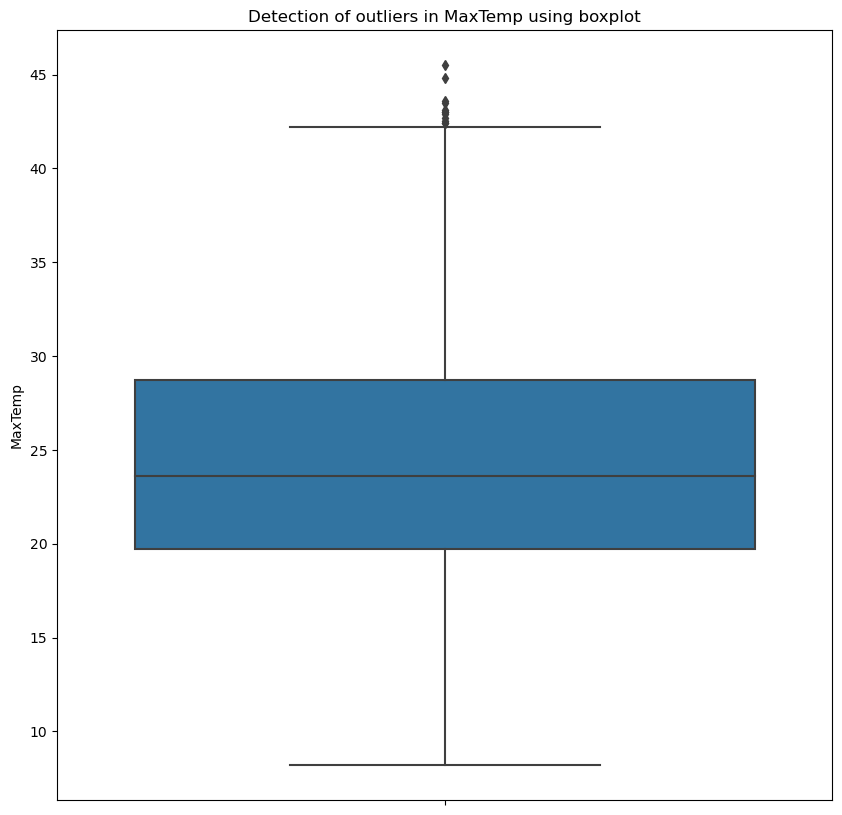

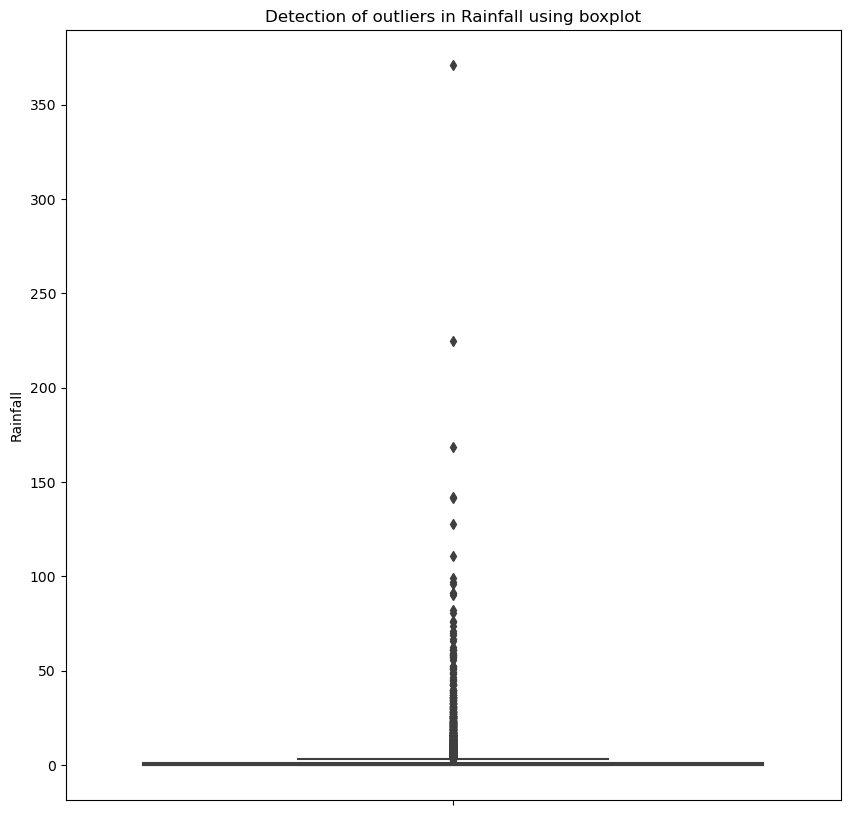

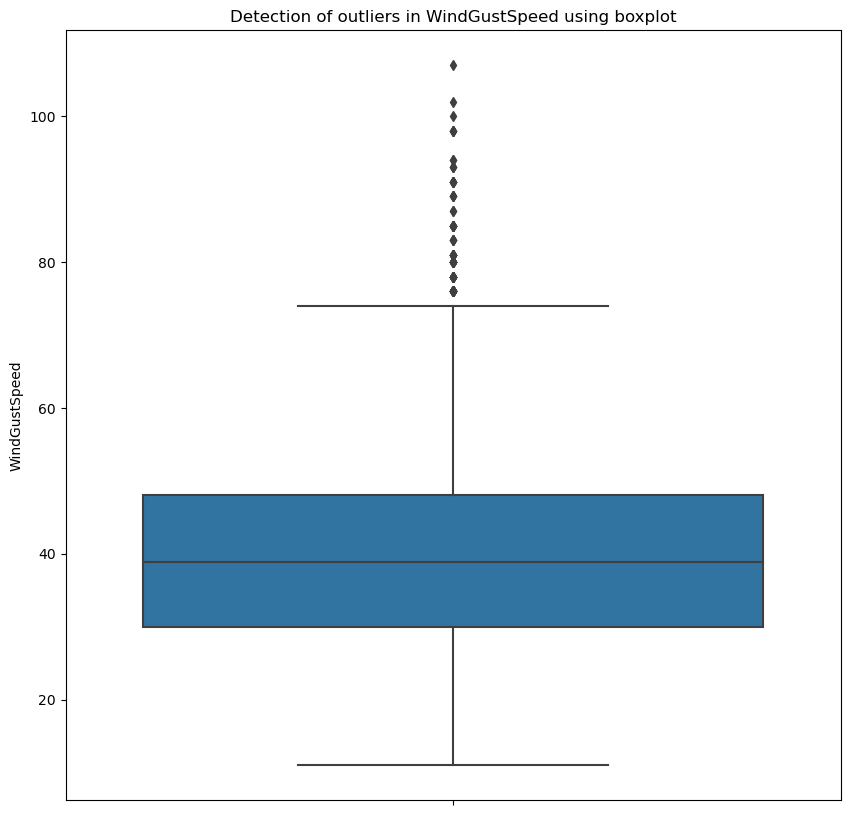

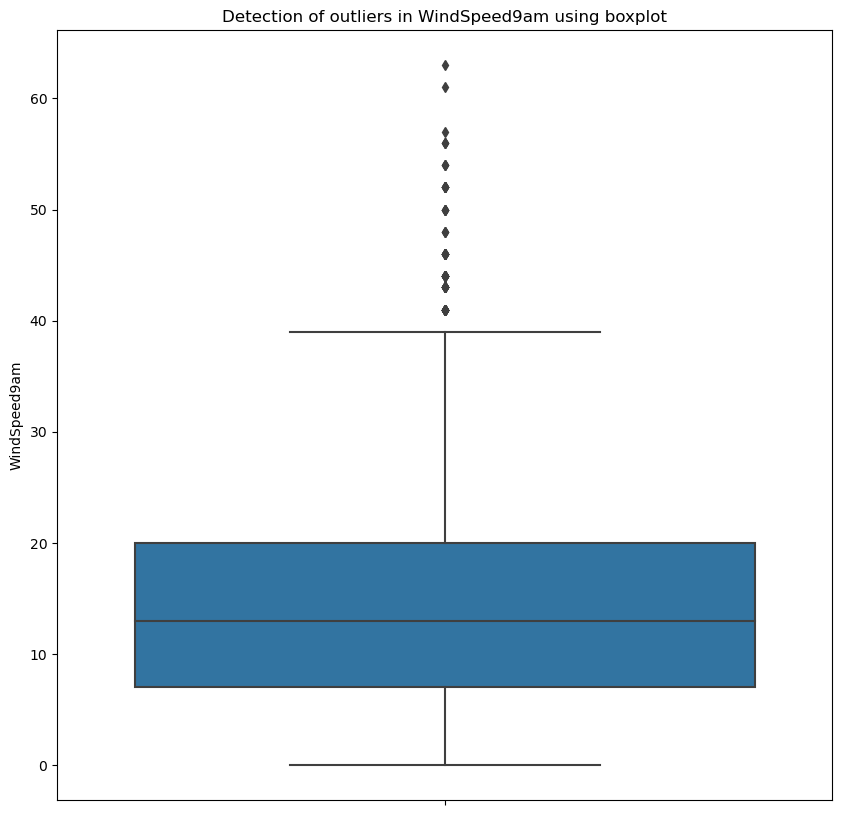

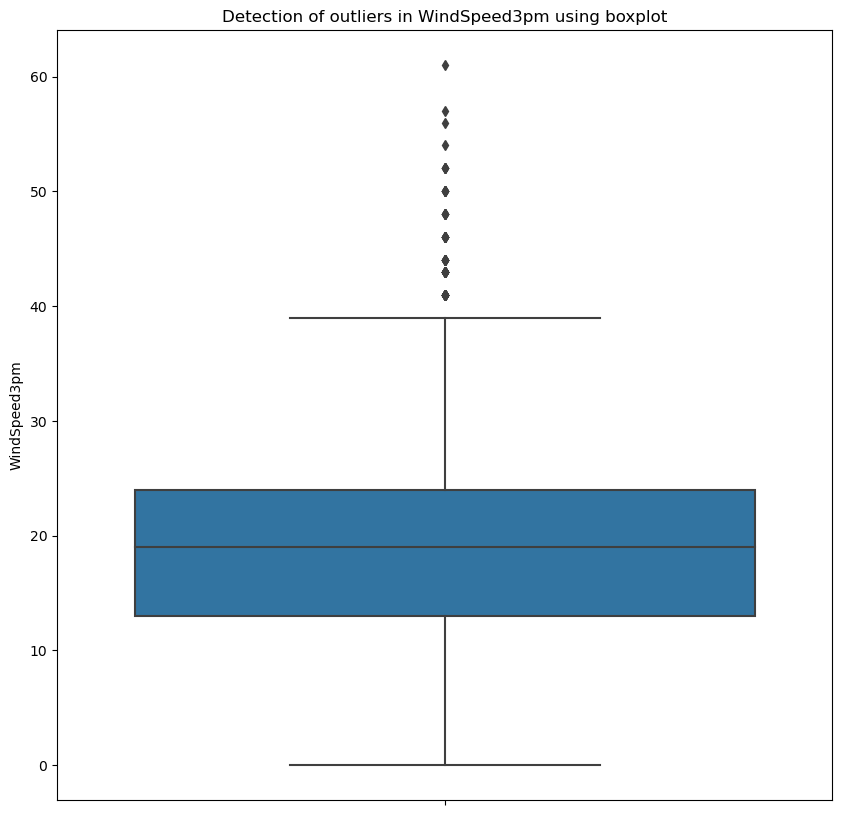

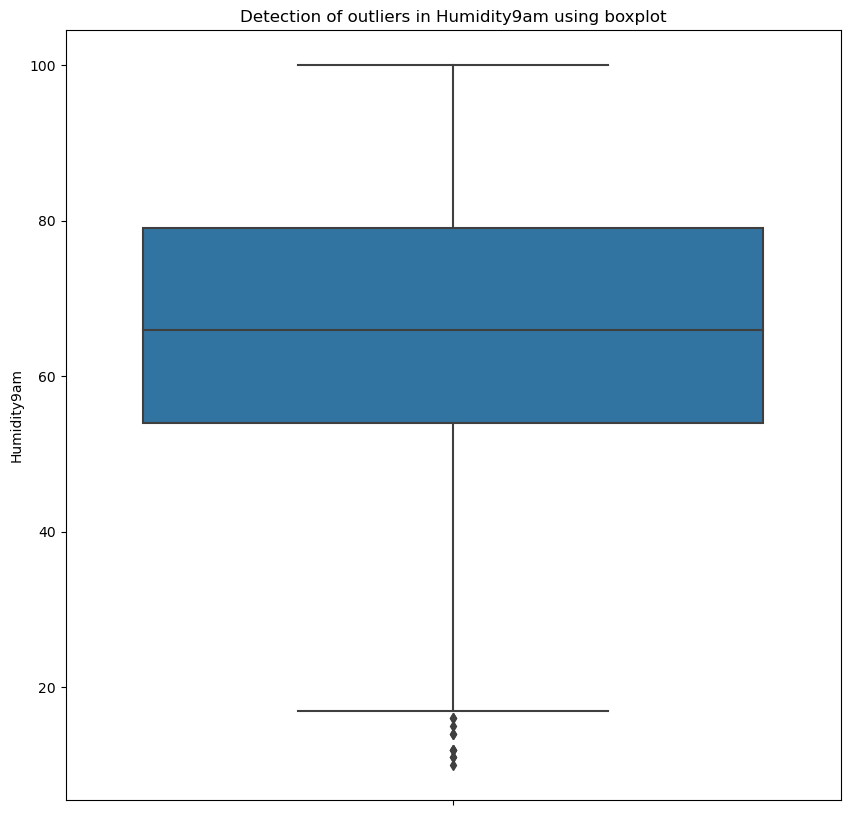

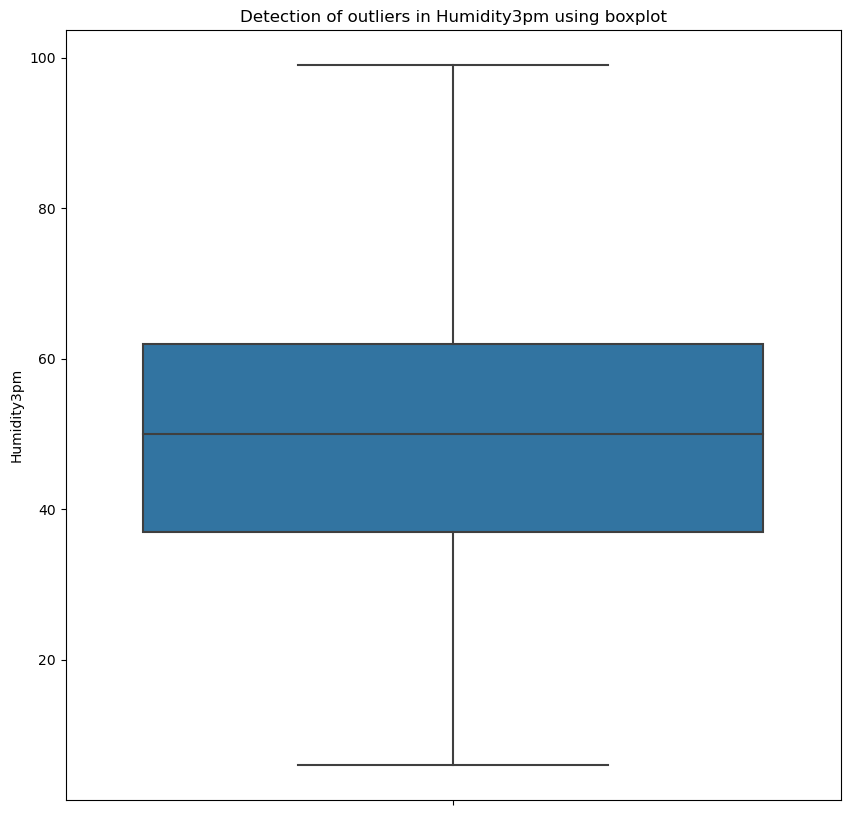

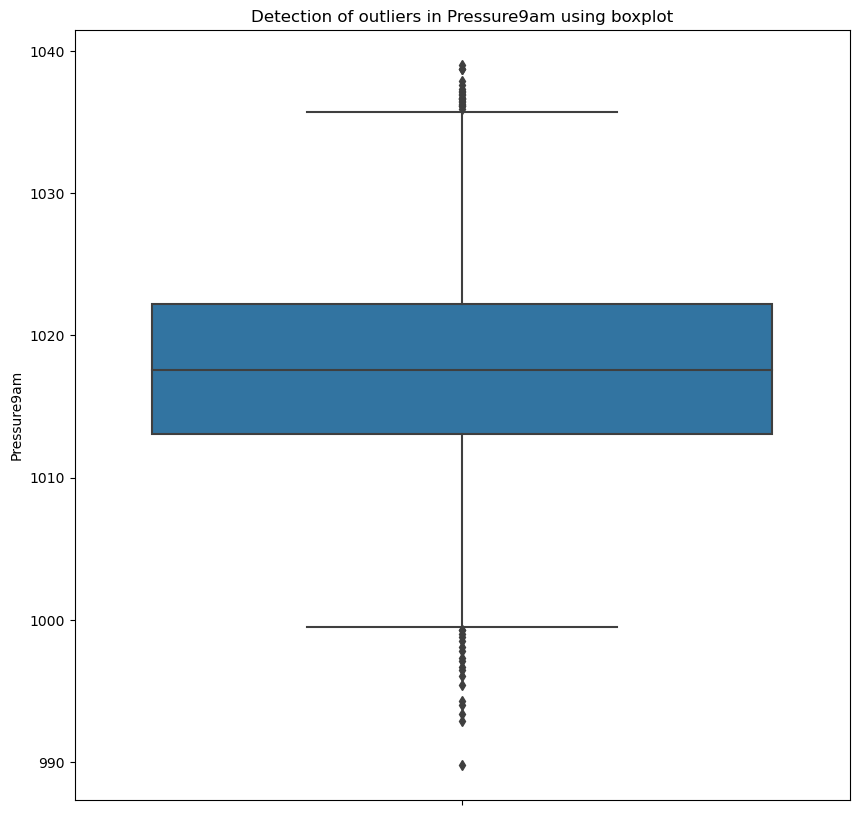

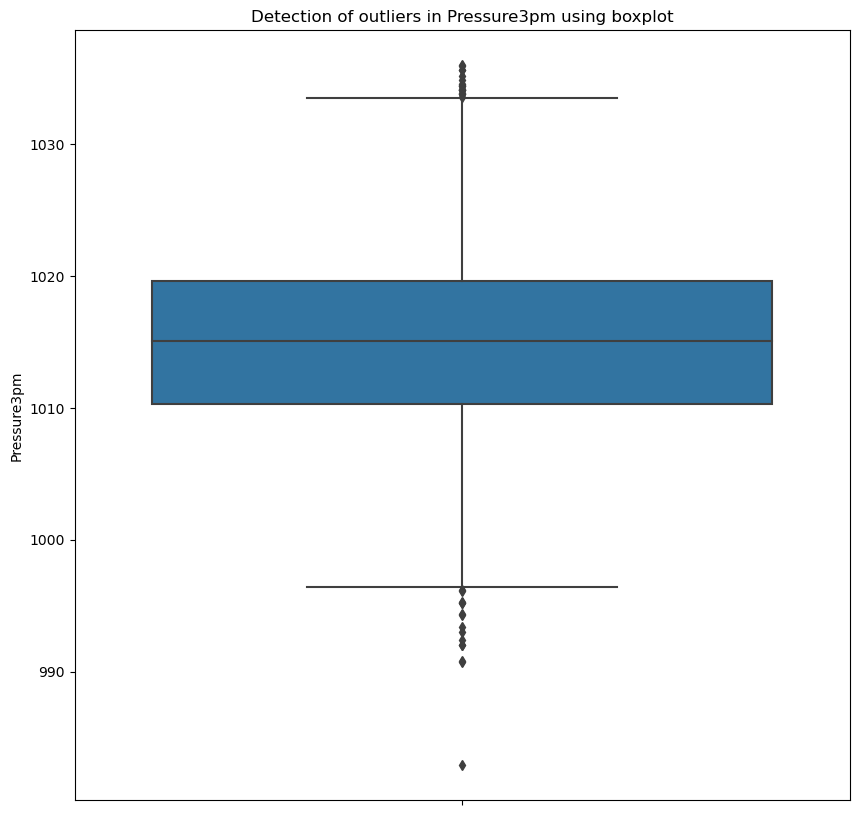

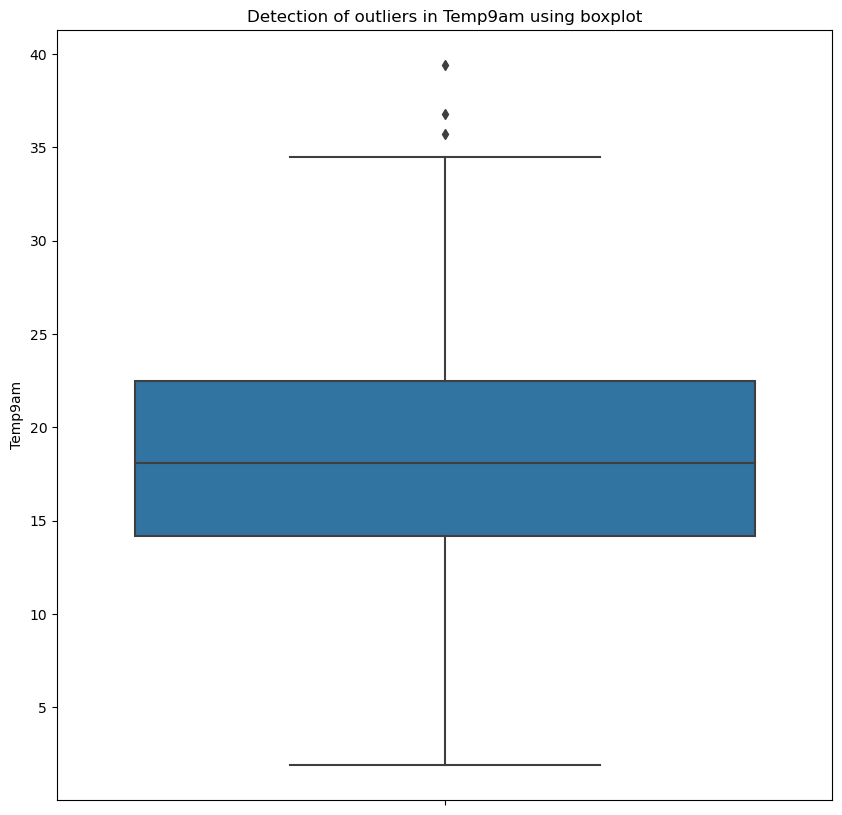

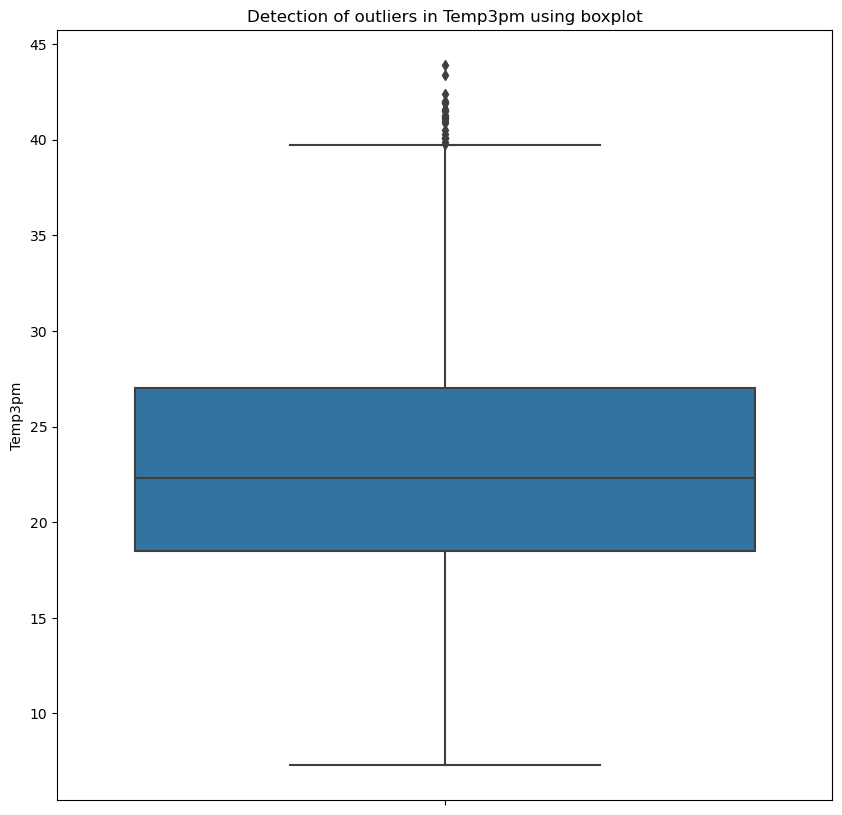

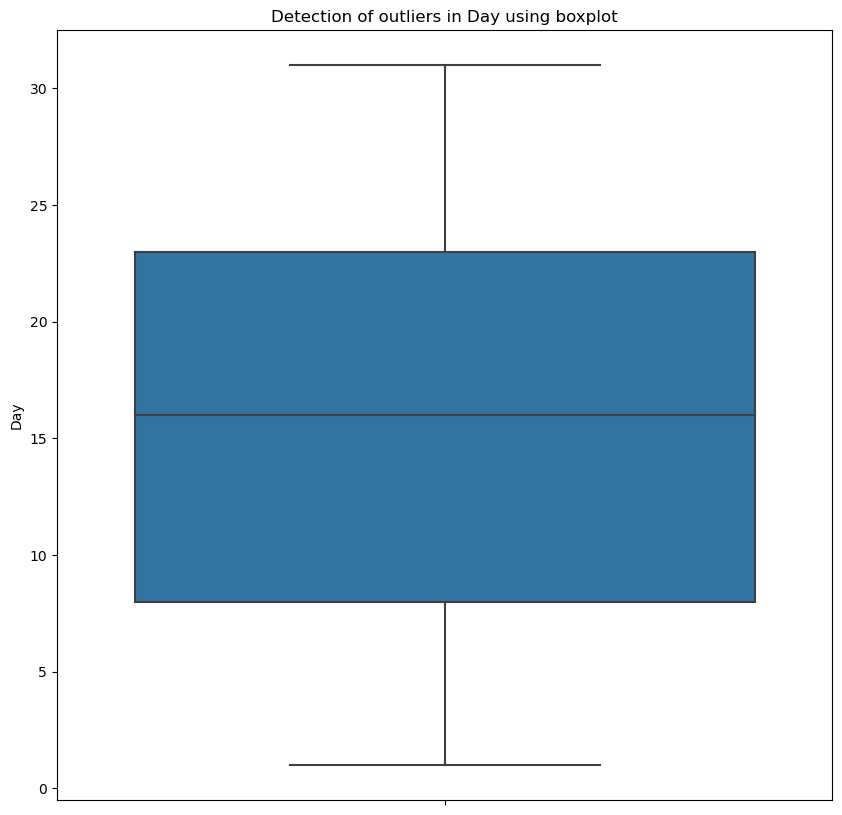

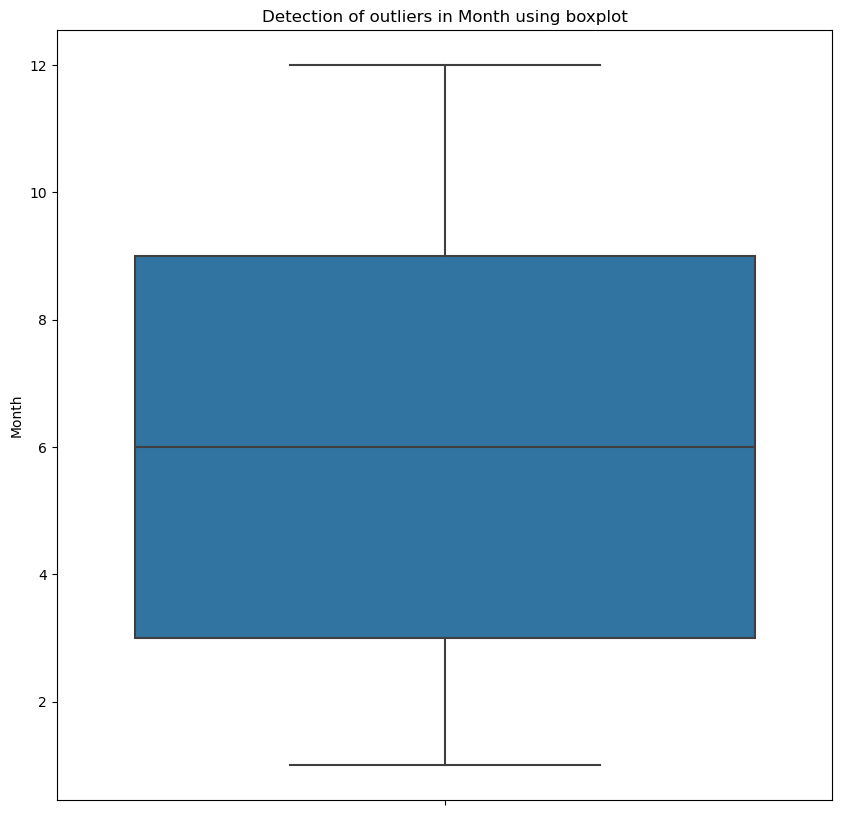

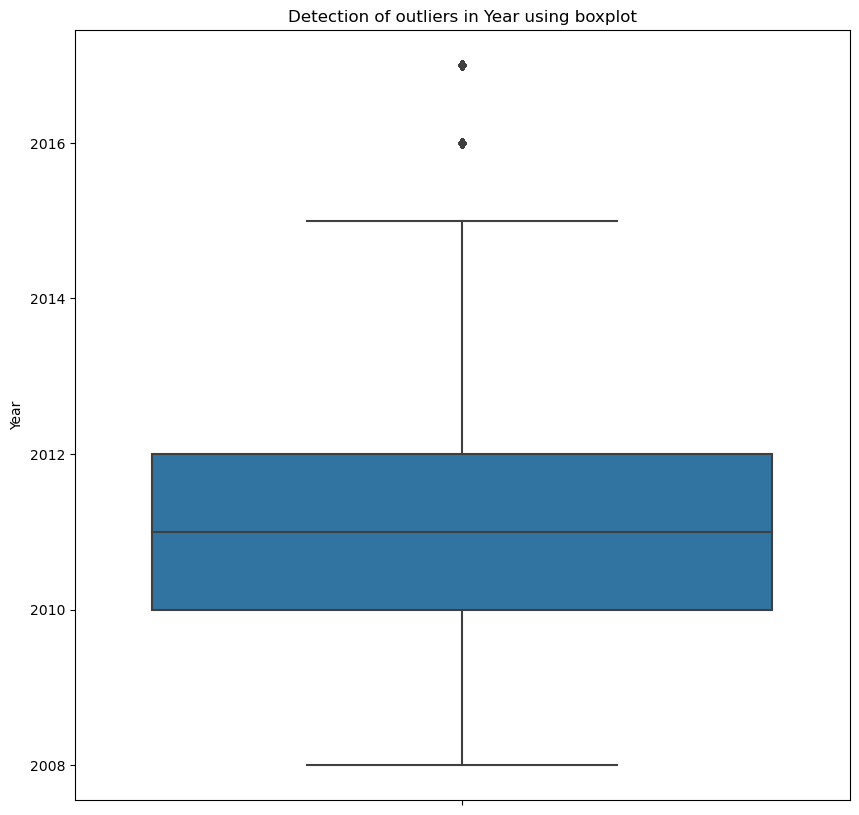

In [120]:
##Checking for outliers using boxplots and removing them if necessary
for numerical_feature in numerical_features:
    plt.figure(figsize=(10,10))
    sns.boxplot(y=numerical_feature,data = rainfall_2)
    plt.title('Detection of outliers in {} using boxplot'.format(numerical_feature))
plt.show()

-- No need to remove outliers for this dataset

In [271]:
rainfall_2

Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0      Albury     13.4     22.9       0.6           W           44.0   
1      Albury      7.4     25.1       0.0         WNW           44.0   
2      Albury     12.9     25.7       0.0         WSW           46.0   
3      Albury      9.2     28.0       0.0          NE           24.0   
4      Albury     17.5     32.3       1.0           W           41.0   
...       ...      ...      ...       ...         ...            ...   
8419    Uluru      3.5     21.8       0.0           E           31.0   
8420    Uluru      2.8     23.4       0.0           E           31.0   
8421    Uluru      3.6     25.3       0.0         NNW           22.0   
8422    Uluru      5.4     26.9       0.0           N           37.0   
8423    Uluru      7.8     27.0       0.0          SE           28.0   

     WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  ...  Humidity3pm  \
0             W        WNW          20.0          24.0  ...         22.0   
1           NNW        WSW           4.0          22.0  ...         25.0   
2             W        WSW          19.0          26.0  ...         30.0   
3            SE          E          11.0           9.0  ...         16.0   
4           ENE         NW           7.0          20.0  ...         33.0   
...         ...        ...           ...           ...  ...          ...   
8419        ESE          E          15.0          13.0  ...         27.0   
8420         SE        ENE          13.0          11.0  ...         24.0   
8421         SE          N          13.0           9.0  ...         21.0   
8422         SE        WNW           9.0           9.0  ...         24.0   
8423        SSE          N          13.0           7.0  ...         24.0   

      Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday RainTomorrow Day  \
0          1007.7       1007.1     16.9     21.8         No           No   1   
1          1010.6       1007.8     17.2     24.3         No           No   2   
2          1007.6       1008.7     21.0     23.2         No           No   3   
3          1017.6       1012.8     18.1     26.5         No           No   4   
4          1010.8       1006.0     17.8     29.7         No           No   5   
...           ...          ...      ...      ...        ...          ...  ..   
8419       1024.7       1021.2      9.4     20.9         No           No  20   
8420       1024.6       1020.3     10.1     22.4         No           No  21   
8421       1023.5       1019.1     10.9     24.5         No           No  22   
8422       1021.0       1016.8     12.5     26.1         No           No  23   
8423       1019.4       1016.5     15.1     26.0         No           No  24   

      Month  Year  
0        12  2008  
1        12  2008  
2        12  2008  
3        12  2008  
4        12  2008  
...     ...   ...  
8419      6  2017  
8420      6  2017  
8421      6  2017  
8422      6  2017  
8423      6  2017  

[5455 rows x 21 columns]

-- Correlation Analysis

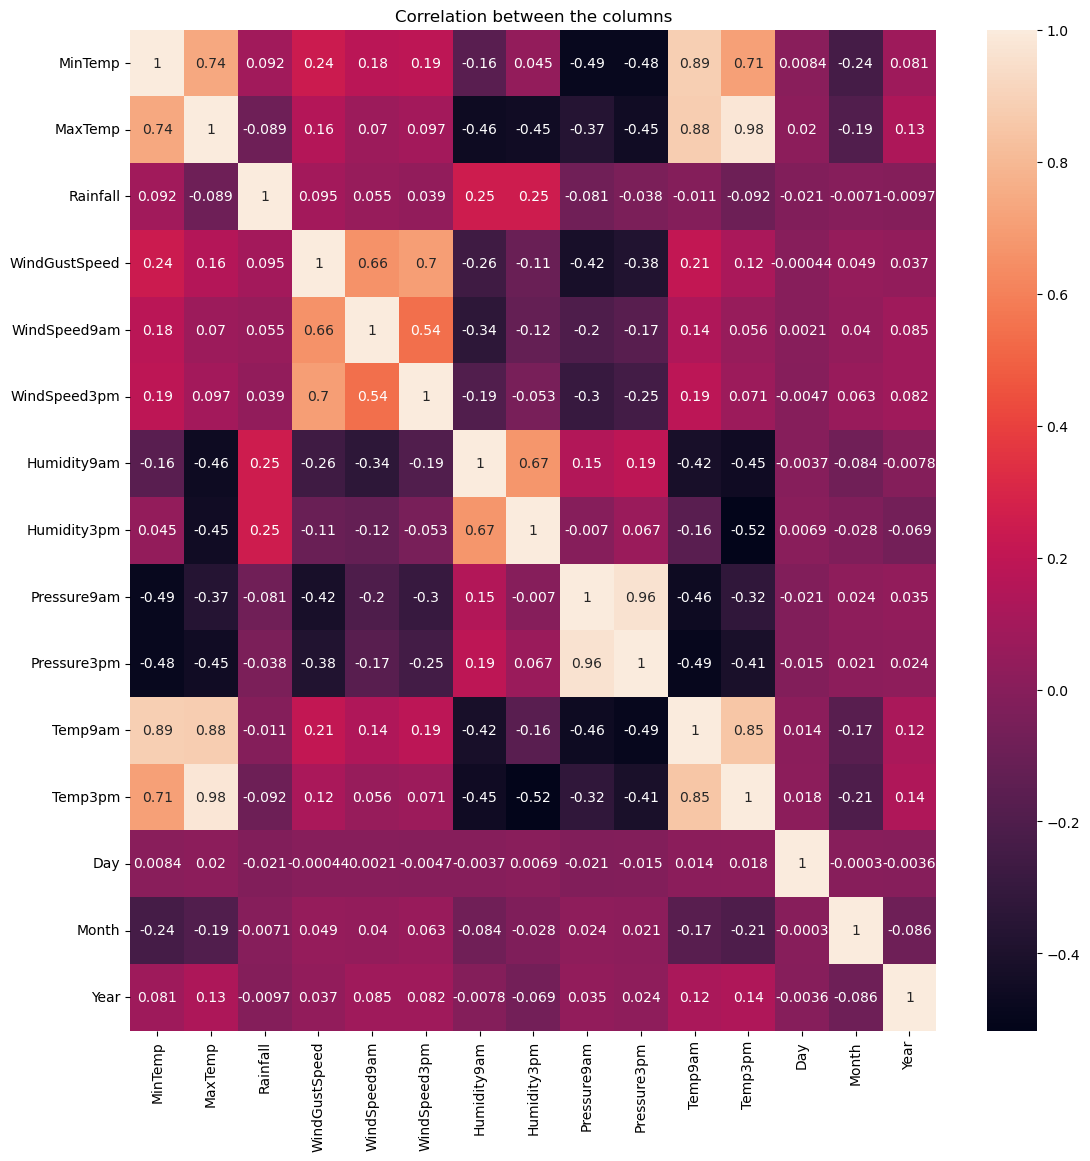

In [125]:
rainfall_cor = rainfall_2.corr()
plt.figure(figsize=(13,13))
sns.heatmap(rainfall_cor, annot = True)
plt.title("Correlation between the columns")
plt.show()

-- As we can see from the above heatmap, there is presence of multicollinearity amongst the independent features. For this purpose I'm going to remove all the features observed during the 3pm time interval. Because this data recorded at 3pm (In my assumption) is too much info and does not involve much in the prediction process of whether it will rain Tomorrow or how much rainfall there is. 

In [272]:
#Removing the above specified features
rainfall_2.drop(['Pressure3pm'],axis=1,inplace=True)
rainfall_2.drop(['Temp3pm'],axis=1,inplace=True)
rainfall_2.drop(['Humidity3pm'],axis=1,inplace=True)
rainfall_2.drop(['WindSpeed3pm'],axis=1,inplace=True)
rainfall_2.drop(['WindGustSpeed'],axis=1,inplace=True)

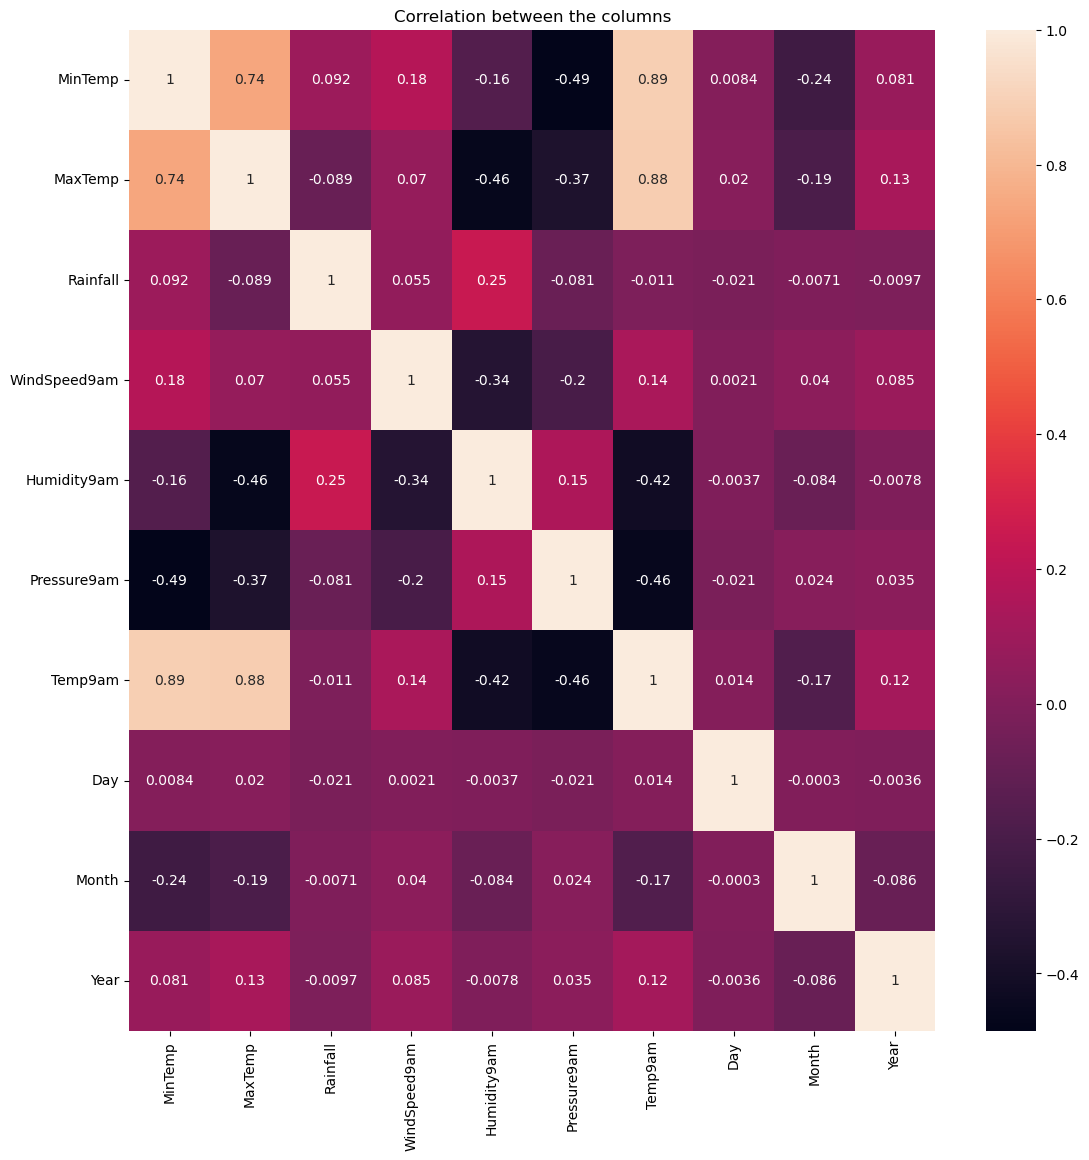

In [128]:
rainfall_cor = rainfall_2.corr()
plt.figure(figsize=(13,13))
sns.heatmap(rainfall_cor, annot = True)
plt.title("Correlation between the columns")
plt.show()

In [273]:
rainfall_2

Location  MinTemp  MaxTemp  Rainfall WindGustDir WindDir9am WindDir3pm  \
0      Albury     13.4     22.9       0.6           W          W        WNW   
1      Albury      7.4     25.1       0.0         WNW        NNW        WSW   
2      Albury     12.9     25.7       0.0         WSW          W        WSW   
3      Albury      9.2     28.0       0.0          NE         SE          E   
4      Albury     17.5     32.3       1.0           W        ENE         NW   
...       ...      ...      ...       ...         ...        ...        ...   
8419    Uluru      3.5     21.8       0.0           E        ESE          E   
8420    Uluru      2.8     23.4       0.0           E         SE        ENE   
8421    Uluru      3.6     25.3       0.0         NNW         SE          N   
8422    Uluru      5.4     26.9       0.0           N         SE        WNW   
8423    Uluru      7.8     27.0       0.0          SE        SSE          N   

      WindSpeed9am  Humidity9am  Pressure9am  Temp9am RainToday RainTomorrow  \
0             20.0         71.0       1007.7     16.9        No           No   
1              4.0         44.0       1010.6     17.2        No           No   
2             19.0         38.0       1007.6     21.0        No           No   
3             11.0         45.0       1017.6     18.1        No           No   
4              7.0         82.0       1010.8     17.8        No           No   
...            ...          ...          ...      ...       ...          ...   
8419          15.0         59.0       1024.7      9.4        No           No   
8420          13.0         51.0       1024.6     10.1        No           No   
8421          13.0         56.0       1023.5     10.9        No           No   
8422           9.0         53.0       1021.0     12.5        No           No   
8423          13.0         51.0       1019.4     15.1        No           No   

      Day  Month  Year  
0       1     12  2008  
1       2     12  2008  
2       3     12  2008  
3       4     12  2008  
4       5     12  2008  
...   ...    ...   ...  
8419   20      6  2017  
8420   21      6  2017  
8421   22      6  2017  
8422   23      6  2017  
8423   24      6  2017  

[5455 rows x 16 columns]

In [274]:
rainfall_2.drop(['WindDir3pm'],axis=1,inplace=True)
rainfall_2.drop(['WindGustDir'],axis=1,inplace=True)

In [275]:
rainfall_2

Location  MinTemp  MaxTemp  Rainfall WindDir9am  WindSpeed9am  \
0      Albury     13.4     22.9       0.6          W          20.0   
1      Albury      7.4     25.1       0.0        NNW           4.0   
2      Albury     12.9     25.7       0.0          W          19.0   
3      Albury      9.2     28.0       0.0         SE          11.0   
4      Albury     17.5     32.3       1.0        ENE           7.0   
...       ...      ...      ...       ...        ...           ...   
8419    Uluru      3.5     21.8       0.0        ESE          15.0   
8420    Uluru      2.8     23.4       0.0         SE          13.0   
8421    Uluru      3.6     25.3       0.0         SE          13.0   
8422    Uluru      5.4     26.9       0.0         SE           9.0   
8423    Uluru      7.8     27.0       0.0        SSE          13.0   

      Humidity9am  Pressure9am  Temp9am RainToday RainTomorrow  Day  Month  \
0            71.0       1007.7     16.9        No           No    1     12   
1            44.0       1010.6     17.2        No           No    2     12   
2            38.0       1007.6     21.0        No           No    3     12   
3            45.0       1017.6     18.1        No           No    4     12   
4            82.0       1010.8     17.8        No           No    5     12   
...           ...          ...      ...       ...          ...  ...    ...   
8419         59.0       1024.7      9.4        No           No   20      6   
8420         51.0       1024.6     10.1        No           No   21      6   
8421         56.0       1023.5     10.9        No           No   22      6   
8422         53.0       1021.0     12.5        No           No   23      6   
8423         51.0       1019.4     15.1        No           No   24      6   

      Year  
0     2008  
1     2008  
2     2008  
3     2008  
4     2008  
...    ...  
8419  2017  
8420  2017  
8421  2017  
8422  2017  
8423  2017  

[5455 rows x 14 columns]

### Data PreProcessing 

In [276]:
rainfall_2

Location  MinTemp  MaxTemp  Rainfall WindDir9am  WindSpeed9am  \
0      Albury     13.4     22.9       0.6          W          20.0   
1      Albury      7.4     25.1       0.0        NNW           4.0   
2      Albury     12.9     25.7       0.0          W          19.0   
3      Albury      9.2     28.0       0.0         SE          11.0   
4      Albury     17.5     32.3       1.0        ENE           7.0   
...       ...      ...      ...       ...        ...           ...   
8419    Uluru      3.5     21.8       0.0        ESE          15.0   
8420    Uluru      2.8     23.4       0.0         SE          13.0   
8421    Uluru      3.6     25.3       0.0         SE          13.0   
8422    Uluru      5.4     26.9       0.0         SE           9.0   
8423    Uluru      7.8     27.0       0.0        SSE          13.0   

      Humidity9am  Pressure9am  Temp9am RainToday RainTomorrow  Day  Month  \
0            71.0       1007.7     16.9        No           No    1     12   
1            44.0       1010.6     17.2        No           No    2     12   
2            38.0       1007.6     21.0        No           No    3     12   
3            45.0       1017.6     18.1        No           No    4     12   
4            82.0       1010.8     17.8        No           No    5     12   
...           ...          ...      ...       ...          ...  ...    ...   
8419         59.0       1024.7      9.4        No           No   20      6   
8420         51.0       1024.6     10.1        No           No   21      6   
8421         56.0       1023.5     10.9        No           No   22      6   
8422         53.0       1021.0     12.5        No           No   23      6   
8423         51.0       1019.4     15.1        No           No   24      6   

      Year  
0     2008  
1     2008  
2     2008  
3     2008  
4     2008  
...    ...  
8419  2017  
8420  2017  
8421  2017  
8422  2017  
8423  2017  

[5455 rows x 14 columns]

In [277]:
cat_col = []
for i in rainfall_2.dtypes.index:
    if rainfall_2.dtypes[i] == "object":
        cat_col.append(i)
print("Categorical Variables: ",cat_col)

Categorical Variables:  ['Location', 'WindDir9am', 'RainToday', 'RainTomorrow']


In [278]:
for i in cat_col:
    print(f"Categories in {i} variable: ",i)
    print(rainfall_2[i].unique())

Categories in Location variable:  Location
['Albury' 'CoffsHarbour' 'Williamtown' 'Wollongong' 'Melbourne' 'Brisbane'
 'Adelaide' 'PerthAirport' 'Darwin' 'Uluru']
Categories in WindDir9am variable:  WindDir9am
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'SSW' 'N' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']
Categories in RainToday variable:  RainToday
['No' 'Yes']
Categories in RainTomorrow variable:  RainTomorrow
['No' 'Yes']


-- Label Encoding

In [279]:
bool_columns = ['RainToday','RainTomorrow']
for i in bool_columns:
    rainfall_2[i+'_new'] = rainfall_2[i].apply(lambda x : 1 if x == 'Yes' else 0)
    rainfall_2.drop(i,axis=1,inplace=True)

In [280]:
rainfall_2

Location  MinTemp  MaxTemp  Rainfall WindDir9am  WindSpeed9am  \
0      Albury     13.4     22.9       0.6          W          20.0   
1      Albury      7.4     25.1       0.0        NNW           4.0   
2      Albury     12.9     25.7       0.0          W          19.0   
3      Albury      9.2     28.0       0.0         SE          11.0   
4      Albury     17.5     32.3       1.0        ENE           7.0   
...       ...      ...      ...       ...        ...           ...   
8419    Uluru      3.5     21.8       0.0        ESE          15.0   
8420    Uluru      2.8     23.4       0.0         SE          13.0   
8421    Uluru      3.6     25.3       0.0         SE          13.0   
8422    Uluru      5.4     26.9       0.0         SE           9.0   
8423    Uluru      7.8     27.0       0.0        SSE          13.0   

      Humidity9am  Pressure9am  Temp9am  Day  Month  Year  RainToday_new  \
0            71.0       1007.7     16.9    1     12  2008              0   
1            44.0       1010.6     17.2    2     12  2008              0   
2            38.0       1007.6     21.0    3     12  2008              0   
3            45.0       1017.6     18.1    4     12  2008              0   
4            82.0       1010.8     17.8    5     12  2008              0   
...           ...          ...      ...  ...    ...   ...            ...   
8419         59.0       1024.7      9.4   20      6  2017              0   
8420         51.0       1024.6     10.1   21      6  2017              0   
8421         56.0       1023.5     10.9   22      6  2017              0   
8422         53.0       1021.0     12.5   23      6  2017              0   
8423         51.0       1019.4     15.1   24      6  2017              0   

      RainTomorrow_new  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
8419                 0  
8420                 0  
8421                 0  
8422                 0  
8423                 0  

[5455 rows x 14 columns]

In [281]:
cat_col = ['Location','WindDir9am']
rainfall_final = pd.get_dummies(rainfall_2,columns=cat_col)
print(rainfall_final)

      MinTemp  MaxTemp  Rainfall  WindSpeed9am  Humidity9am  Pressure9am  \
0        13.4     22.9       0.6          20.0         71.0       1007.7   
1         7.4     25.1       0.0           4.0         44.0       1010.6   
2        12.9     25.7       0.0          19.0         38.0       1007.6   
3         9.2     28.0       0.0          11.0         45.0       1017.6   
4        17.5     32.3       1.0           7.0         82.0       1010.8   
...       ...      ...       ...           ...          ...          ...   
8419      3.5     21.8       0.0          15.0         59.0       1024.7   
8420      2.8     23.4       0.0          13.0         51.0       1024.6   
8421      3.6     25.3       0.0          13.0         56.0       1023.5   
8422      5.4     26.9       0.0           9.0         53.0       1021.0   
8423      7.8     27.0       0.0          13.0         51.0       1019.4   

      Temp9am  Day  Month  Year  ...  WindDir9am_NNW  WindDir9am_NW  \
0        16.9   

In [282]:
rainfall_final

MinTemp  MaxTemp  Rainfall  WindSpeed9am  Humidity9am  Pressure9am  \
0        13.4     22.9       0.6          20.0         71.0       1007.7   
1         7.4     25.1       0.0           4.0         44.0       1010.6   
2        12.9     25.7       0.0          19.0         38.0       1007.6   
3         9.2     28.0       0.0          11.0         45.0       1017.6   
4        17.5     32.3       1.0           7.0         82.0       1010.8   
...       ...      ...       ...           ...          ...          ...   
8419      3.5     21.8       0.0          15.0         59.0       1024.7   
8420      2.8     23.4       0.0          13.0         51.0       1024.6   
8421      3.6     25.3       0.0          13.0         56.0       1023.5   
8422      5.4     26.9       0.0           9.0         53.0       1021.0   
8423      7.8     27.0       0.0          13.0         51.0       1019.4   

      Temp9am  Day  Month  Year  ...  WindDir9am_NNW  WindDir9am_NW  \
0        16.9    1     12  2008  ...               0              0   
1        17.2    2     12  2008  ...               1              0   
2        21.0    3     12  2008  ...               0              0   
3        18.1    4     12  2008  ...               0              0   
4        17.8    5     12  2008  ...               0              0   
...       ...  ...    ...   ...  ...             ...            ...   
8419      9.4   20      6  2017  ...               0              0   
8420     10.1   21      6  2017  ...               0              0   
8421     10.9   22      6  2017  ...               0              0   
8422     12.5   23      6  2017  ...               0              0   
8423     15.1   24      6  2017  ...               0              0   

      WindDir9am_S  WindDir9am_SE  WindDir9am_SSE  WindDir9am_SSW  \
0                0              0               0               0   
1                0              0               0               0   
2                0              0               0               0   
3                0              1               0               0   
4                0              0               0               0   
...            ...            ...             ...             ...   
8419             0              0               0               0   
8420             0              1               0               0   
8421             0              1               0               0   
8422             0              1               0               0   
8423             0              0               1               0   

      WindDir9am_SW  WindDir9am_W  WindDir9am_WNW  WindDir9am_WSW  
0                 0             1               0               0  
1                 0             0               0               0  
2                 0             1               0               0  
3                 0             0               0               0  
4                 0             0               0               0  
...             ...           ...             ...             ...  
8419              0             0               0               0  
8420              0             0               0               0  
8421              0             0               0               0  
8422              0             0               0               0  
8423              0             0               0               0  

[5455 rows x 38 columns]

In [356]:
rainfall_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5455 entries, 0 to 8423
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MinTemp                5455 non-null   float64
 1   MaxTemp                5455 non-null   float64
 2   Rainfall               5455 non-null   float64
 3   WindSpeed9am           5455 non-null   float64
 4   Humidity9am            5455 non-null   float64
 5   Pressure9am            5455 non-null   float64
 6   Temp9am                5455 non-null   float64
 7   Day                    5455 non-null   int32  
 8   Month                  5455 non-null   int32  
 9   Year                   5455 non-null   int32  
 10  RainToday_new          5455 non-null   int64  
 11  RainTomorrow_new       5455 non-null   int64  
 12  Location_Adelaide      5455 non-null   uint8  
 13  Location_Albury        5455 non-null   uint8  
 14  Location_Brisbane      5455 non-null   uint8  
 15  Loca

In [283]:
#Now Splitting the dataframe into feature and target variables
## First - creating a copy
rainfall_c = rainfall_final.copy()

In [284]:
rainfall_c

MinTemp  MaxTemp  Rainfall  WindSpeed9am  Humidity9am  Pressure9am  \
0        13.4     22.9       0.6          20.0         71.0       1007.7   
1         7.4     25.1       0.0           4.0         44.0       1010.6   
2        12.9     25.7       0.0          19.0         38.0       1007.6   
3         9.2     28.0       0.0          11.0         45.0       1017.6   
4        17.5     32.3       1.0           7.0         82.0       1010.8   
...       ...      ...       ...           ...          ...          ...   
8419      3.5     21.8       0.0          15.0         59.0       1024.7   
8420      2.8     23.4       0.0          13.0         51.0       1024.6   
8421      3.6     25.3       0.0          13.0         56.0       1023.5   
8422      5.4     26.9       0.0           9.0         53.0       1021.0   
8423      7.8     27.0       0.0          13.0         51.0       1019.4   

      Temp9am  Day  Month  Year  ...  WindDir9am_NNW  WindDir9am_NW  \
0        16.9    1     12  2008  ...               0              0   
1        17.2    2     12  2008  ...               1              0   
2        21.0    3     12  2008  ...               0              0   
3        18.1    4     12  2008  ...               0              0   
4        17.8    5     12  2008  ...               0              0   
...       ...  ...    ...   ...  ...             ...            ...   
8419      9.4   20      6  2017  ...               0              0   
8420     10.1   21      6  2017  ...               0              0   
8421     10.9   22      6  2017  ...               0              0   
8422     12.5   23      6  2017  ...               0              0   
8423     15.1   24      6  2017  ...               0              0   

      WindDir9am_S  WindDir9am_SE  WindDir9am_SSE  WindDir9am_SSW  \
0                0              0               0               0   
1                0              0               0               0   
2                0              0               0               0   
3                0              1               0               0   
4                0              0               0               0   
...            ...            ...             ...             ...   
8419             0              0               0               0   
8420             0              1               0               0   
8421             0              1               0               0   
8422             0              1               0               0   
8423             0              0               1               0   

      WindDir9am_SW  WindDir9am_W  WindDir9am_WNW  WindDir9am_WSW  
0                 0             1               0               0  
1                 0             0               0               0  
2                 0             1               0               0  
3                 0             0               0               0  
4                 0             0               0               0  
...             ...           ...             ...             ...  
8419              0             0               0               0  
8420              0             0               0               0  
8421              0             0               0               0  
8422              0             0               0               0  
8423              0             0               0               0  

[5455 rows x 38 columns]

In [285]:
y = rainfall_c['RainTomorrow_new']
y

0       0
1       0
2       0
3       0
4       0
       ..
8419    0
8420    0
8421    0
8422    0
8423    0
Name: RainTomorrow_new, Length: 5455, dtype: int64

In [286]:
y.value_counts()

0    4197
1    1258
Name: RainTomorrow_new, dtype: int64

-- As there is significant difference in the classes, we we shall be performing some oversampling technique (SMOTE) to make the data balanced.

In [287]:
x = rainfall_c.drop("RainTomorrow_new",axis=1)
x

MinTemp  MaxTemp  Rainfall  WindSpeed9am  Humidity9am  Pressure9am  \
0        13.4     22.9       0.6          20.0         71.0       1007.7   
1         7.4     25.1       0.0           4.0         44.0       1010.6   
2        12.9     25.7       0.0          19.0         38.0       1007.6   
3         9.2     28.0       0.0          11.0         45.0       1017.6   
4        17.5     32.3       1.0           7.0         82.0       1010.8   
...       ...      ...       ...           ...          ...          ...   
8419      3.5     21.8       0.0          15.0         59.0       1024.7   
8420      2.8     23.4       0.0          13.0         51.0       1024.6   
8421      3.6     25.3       0.0          13.0         56.0       1023.5   
8422      5.4     26.9       0.0           9.0         53.0       1021.0   
8423      7.8     27.0       0.0          13.0         51.0       1019.4   

      Temp9am  Day  Month  Year  ...  WindDir9am_NNW  WindDir9am_NW  \
0        16.9    1     12  2008  ...               0              0   
1        17.2    2     12  2008  ...               1              0   
2        21.0    3     12  2008  ...               0              0   
3        18.1    4     12  2008  ...               0              0   
4        17.8    5     12  2008  ...               0              0   
...       ...  ...    ...   ...  ...             ...            ...   
8419      9.4   20      6  2017  ...               0              0   
8420     10.1   21      6  2017  ...               0              0   
8421     10.9   22      6  2017  ...               0              0   
8422     12.5   23      6  2017  ...               0              0   
8423     15.1   24      6  2017  ...               0              0   

      WindDir9am_S  WindDir9am_SE  WindDir9am_SSE  WindDir9am_SSW  \
0                0              0               0               0   
1                0              0               0               0   
2                0              0               0               0   
3                0              1               0               0   
4                0              0               0               0   
...            ...            ...             ...             ...   
8419             0              0               0               0   
8420             0              1               0               0   
8421             0              1               0               0   
8422             0              1               0               0   
8423             0              0               1               0   

      WindDir9am_SW  WindDir9am_W  WindDir9am_WNW  WindDir9am_WSW  
0                 0             1               0               0  
1                 0             0               0               0  
2                 0             1               0               0  
3                 0             0               0               0  
4                 0             0               0               0  
...             ...           ...             ...             ...  
8419              0             0               0               0  
8420              0             0               0               0  
8421              0             0               0               0  
8422              0             0               0               0  
8423              0             0               0               0  

[5455 rows x 37 columns]

In [288]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(x))
X

0         1         2         3         4         5         6   \
0     0.018127 -0.210108 -0.206704  0.579493  0.283490 -1.479008 -0.218666   
1    -1.050537  0.139168 -0.263579 -1.107207 -1.277299 -1.046854 -0.167206   
2    -0.070928  0.234426 -0.263579  0.474075 -1.624141 -1.493910  0.484616   
3    -0.729938  0.599579 -0.263579 -0.369275 -1.219492 -0.003722 -0.012827   
4     0.748381  1.282256 -0.168788 -0.790950  0.919367 -1.017050 -0.064287   
...        ...       ...       ...       ...       ...       ...       ...   
5450 -1.745169 -0.384747 -0.263579  0.052400 -0.410194  1.054312 -1.505155   
5451 -1.869847 -0.130727 -0.263579 -0.158438 -0.872650  1.039410 -1.385083   
5452 -1.727358  0.170921 -0.263579 -0.158438 -0.583615  0.875489 -1.247857   
5453 -1.406759  0.424940 -0.263579 -0.580113 -0.757036  0.502942 -0.973406   
5454 -0.979293  0.440817 -0.263579 -0.158438 -0.872650  0.264512 -0.527423   

            7         8         9   ...        27        28        29  \
0    -1.676920  1.630984 -1.574553  ... -0.188928 -0.242512 -0.234789   
1    -1.563095  1.630984 -1.574553  ...  5.293010 -0.242512 -0.234789   
2    -1.449269  1.630984 -1.574553  ... -0.188928 -0.242512 -0.234789   
3    -1.335443  1.630984 -1.574553  ... -0.188928 -0.242512 -0.234789   
4    -1.221618  1.630984 -1.574553  ... -0.188928 -0.242512 -0.234789   
...        ...       ...       ...  ...       ...       ...       ...   
5450  0.485767 -0.124083  2.441379  ... -0.188928 -0.242512 -0.234789   
5451  0.599593 -0.124083  2.441379  ... -0.188928 -0.242512 -0.234789   
5452  0.713419 -0.124083  2.441379  ... -0.188928 -0.242512 -0.234789   
5453  0.827244 -0.124083  2.441379  ... -0.188928 -0.242512 -0.234789   
5454  0.941070 -0.124083  2.441379  ... -0.188928 -0.242512 -0.234789   

            30        31        32        33        34        35        36  
0    -0.326329 -0.228640 -0.240386 -0.325641  4.251285 -0.237816 -0.272862  
1    -0.326329 -0.228640 -0.240386 -0.325641 -0.235223 -0.237816 -0.272862  
2    -0.326329 -0.228640 -0.240386 -0.325641  4.251285 -0.237816 -0.272862  
3     3.064388 -0.228640 -0.240386 -0.325641 -0.235223 -0.237816 -0.272862  
4    -0.326329 -0.228640 -0.240386 -0.325641 -0.235223 -0.237816 -0.272862  
...        ...       ...       ...       ...       ...       ...       ...  
5450 -0.326329 -0.228640 -0.240386 -0.325641 -0.235223 -0.237816 -0.272862  
5451  3.064388 -0.228640 -0.240386 -0.325641 -0.235223 -0.237816 -0.272862  
5452  3.064388 -0.228640 -0.240386 -0.325641 -0.235223 -0.237816 -0.272862  
5453  3.064388 -0.228640 -0.240386 -0.325641 -0.235223 -0.237816 -0.272862  
5454 -0.326329  4.373689 -0.240386 -0.325641 -0.235223 -0.237816 -0.272862  

[5455 rows x 37 columns]

In [289]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X1,y1 = sm.fit_resample(X,y)

In [290]:
y1.value_counts()

0    4197
1    4197
Name: RainTomorrow_new, dtype: int64

In [291]:
X1.shape

(8394, 37)

In [292]:
# Now, Splitting the data into training and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size = 0.20,random_state = 42)

In [293]:
print("X_train ",X_train.shape)
print("y_train ",y_train.shape)
print("X_test ",X_test.shape)
print("y_test ",y_test.shape)

X_train  (6715, 37)
y_train  (6715,)
X_test  (1679, 37)
y_test  (1679,)


### Model Training 

#### Logistic Regression 

In [294]:
#importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [295]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(y_test,logreg_pred)
print('Test accuracy is: {:.2f}%'.format(logreg_acc*100))

Test accuracy is: 74.39%


In [296]:
print(classification_report(y_test,logreg_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       850
           1       0.74      0.74      0.74       829

    accuracy                           0.74      1679
   macro avg       0.74      0.74      0.74      1679
weighted avg       0.74      0.74      0.74      1679



In [297]:
a = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
print(a)

[[636 214]
 [216 613]]


In [298]:
c = print('Precision: %.3f' % precision_score(y_test,logreg_pred))
d = print('Recall: %.3f' % recall_score(y_test,logreg_pred))

Precision: 0.741
Recall: 0.739


#### Decision Tree Classifier 

In [299]:
#importing necessary libraries
from sklearn.tree import DecisionTreeClassifier

In [300]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree_pred = dtree.predict(X_test)
dtree_acc = accuracy_score(dtree_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(dtree_acc*100))

Test accuracy is: 80.23%


In [301]:
print(classification_report(y_test,dtree_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       850
           1       0.79      0.82      0.80       829

    accuracy                           0.80      1679
   macro avg       0.80      0.80      0.80      1679
weighted avg       0.80      0.80      0.80      1679



In [302]:
a = confusion_matrix(y_test, dtree_pred, labels=dtree.classes_)
print(a)

[[664 186]
 [146 683]]


In [303]:
c = print('Precision: %.3f' % precision_score(y_test,dtree_pred))
d = print('Recall: %.3f' % recall_score(y_test,dtree_pred))

Precision: 0.786
Recall: 0.824


#### Random Forest Classifier 

In [304]:
#importing necessary libraries
from sklearn.ensemble import RandomForestClassifier

In [305]:
r_f = RandomForestClassifier()
r_f.fit(X_train,y_train)
r_f_pred = r_f.predict(X_test)
r_f_acc = accuracy_score(r_f_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(r_f_acc*100))

Test accuracy is: 88.92%


In [306]:
print(classification_report(y_test,r_f_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       850
           1       0.88      0.90      0.89       829

    accuracy                           0.89      1679
   macro avg       0.89      0.89      0.89      1679
weighted avg       0.89      0.89      0.89      1679



In [307]:
a = confusion_matrix(y_test, r_f_pred, labels=r_f.classes_)
print(a)

[[751  99]
 [ 87 742]]


In [308]:
from sklearn.metrics import precision_score,recall_score
c = print('Precision: %.3f' % precision_score(y_test,r_f_pred))
d = print('Recall: %.3f' % recall_score(y_test,r_f_pred))

Precision: 0.882
Recall: 0.895


#### Support Vector Classifier 

In [309]:
from sklearn.svm import SVC

In [310]:
svc = SVC()
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(svc_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(svc_acc*100))

Test accuracy is: 82.73%


In [311]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       850
           1       0.81      0.86      0.83       829

    accuracy                           0.83      1679
   macro avg       0.83      0.83      0.83      1679
weighted avg       0.83      0.83      0.83      1679



In [312]:
a = confusion_matrix(y_test, svc_pred, labels=svc.classes_)
print(a)

[[679 171]
 [119 710]]


In [313]:
c = print('Precision: %.3f' % precision_score(y_test,svc_pred))
d = print('Recall: %.3f' % recall_score(y_test,svc_pred))

Precision: 0.806
Recall: 0.856


#### K-neighbor Classifier 

In [314]:
from sklearn.neighbors import KNeighborsClassifier

In [315]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(knn_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(knn_acc*100))

Test accuracy is: 81.66%


In [316]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80       850
           1       0.76      0.91      0.83       829

    accuracy                           0.82      1679
   macro avg       0.83      0.82      0.82      1679
weighted avg       0.83      0.82      0.82      1679



In [317]:
a = confusion_matrix(y_test, knn_pred, labels=knn.classes_)
print(a)

[[614 236]
 [ 72 757]]


In [318]:
c = print('Precision: %.3f' % precision_score(y_test,knn_pred))
d = print('Recall: %.3f' % recall_score(y_test,knn_pred))

Precision: 0.762
Recall: 0.913


#### Naive - Bayes Classifier 

In [319]:
from sklearn.naive_bayes import GaussianNB

In [320]:
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_pred = nb.predict(X_test)
nb_acc = accuracy_score(nb_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(nb_acc*100))

Test accuracy is: 55.57%


In [321]:
print(classification_report(y_test,nb_pred))

              precision    recall  f1-score   support

           0       0.92      0.13      0.23       850
           1       0.53      0.99      0.69       829

    accuracy                           0.56      1679
   macro avg       0.72      0.56      0.46      1679
weighted avg       0.73      0.56      0.46      1679



In [322]:
a = confusion_matrix(y_test, nb_pred, labels=nb.classes_)
print(a)

[[114 736]
 [ 10 819]]


In [323]:
c = print('Precision: %.3f' % precision_score(y_test,nb_pred))
d = print('Recall: %.3f' % recall_score(y_test,nb_pred))

Precision: 0.527
Recall: 0.988


### Cross-Validation 

In [324]:
from sklearn.model_selection import cross_val_score

In [325]:
#Random Forest Classifier
score = cross_val_score(r_f,X1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,r_f_pred) - score.mean())

[0.44192972 0.43895176 0.56283502 0.7665277  0.74672229]
0.5913932962821249
Difference between Accuracy score and cross validation score is -  0.29782647739268153


In [326]:
##Support Vector Classifier
score = cross_val_score(svc,X1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,svc_pred) - score.mean())

[0.46039309 0.45384157 0.52948183 0.69684336 0.69368296]
0.5668485625915307
Difference between Accuracy score and cross validation score is -  0.2604295791595116


In [327]:
#K-neighbor Classifier 
score = cross_val_score(knn,X1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,knn_pred) - score.mean())

[0.49851102 0.49315068 0.56521739 0.72662299 0.68831943]
0.5943643024928994
Difference between Accuracy score and cross validation score is -  0.22219317219441448


-- Conclusion:

From the model training and the cross val scores (of the top three models) done in the previous section, I am going to choose Random Forest Classifier (RFC) as my final model for the prediction of whether there is going to be rain tomorrow or not.

(?) - The reason I chose RFC as my final model, is because of it's really good performance with the classification of values. The accuracy score of the model is the highest of all the classification models tested which is (88.92%) and from the classification report, we see that the precision, recall and f1 scores are well balanced and have a really good scores individually too.. And from the confusion matrix, we see that the ratio of TP and TN is really good as compared to other models.
Also, the precision and recall values are really good for the Random Forest Classifier Model.

Therefore, RFC is our best and final Model.

### Plotting AUC-ROC curve 

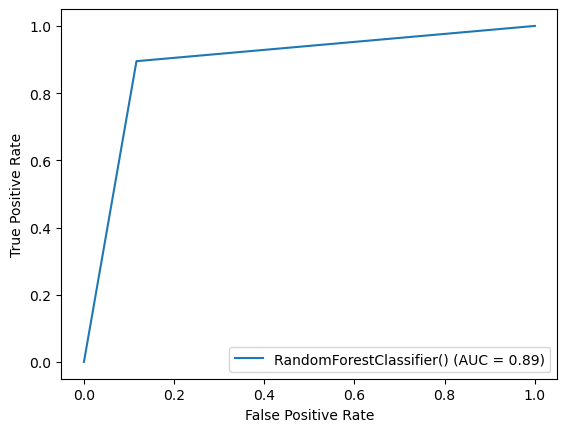

In [328]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,r_f_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=r_f)
display.plot()

### HyperParameter Tuning 

In [329]:
print(r_f.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [330]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {'bootstrap': [True,False],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}
rfc = RandomForestClassifier()
random_search = RandomizedSearchCV(rfc,param_distributions=param_dist,cv=3)
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [80, 90, 100, 110],
                                        'max_features': [2, 3],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [8, 10, 12],
                                        'n_estimators': [100, 200, 300, 1000]})

In [331]:
random_search.best_params_

{'n_estimators': 1000,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_features': 2,
 'max_depth': 90,
 'bootstrap': False}

In [349]:
Final_model = RandomForestClassifier(n_estimators = 100, min_samples_split = 2,min_samples_leaf = 1,max_features = 'sqrt',max_depth = 500,bootstrap = False)
Final_model.fit(X_train,y_train)
fm_pred = Final_model.predict(X_test)
fm_acc = accuracy_score(fm_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(fm_acc*100))

Test accuracy is: 90.05%


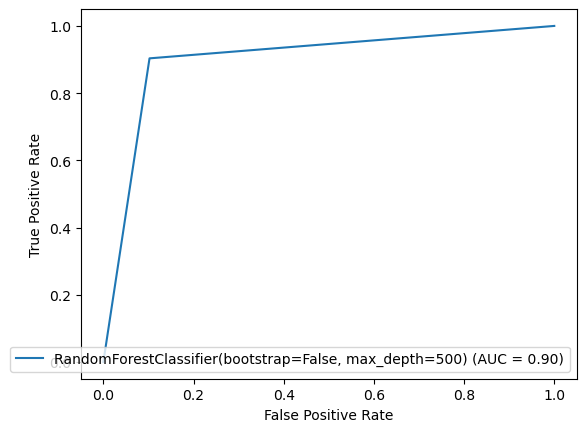

In [350]:
#AUC-ROC curve
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,fm_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=Final_model)
display.plot()

### Saving the Model 

In [351]:
import joblib
joblib.dump(Final_model,"Rain_Weather_Prediction_Project(Classification).pkl")

['Rain_Weather_Prediction_Project(Classification).pkl']

In [352]:
model = joblib.load("Rain_Weather_Prediction_Project(Classification).pkl")
prediction = model.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [353]:
b = np.array(y_test)
df = pd.DataFrame()
df['Predicted'] = prediction
df['Original'] = b
df

Predicted  Original
0             0         0
1             0         0
2             0         0
3             1         1
4             0         0
...         ...       ...
1674          1         1
1675          1         1
1676          0         0
1677          0         0
1678          0         0

[1679 rows x 2 columns]